# Exploratory Data Analysis (Individual Datasets)

This notebook is an explanatory analysis of the individual datasets that will be used in the macroeconomic phase prediction model. The datasets are obtained from Yahoo! Finance and the Federal Reserve Economic Data (FRED) database. The datasets are as follows:

- S&P 500 Index (Yahoo! Finance)
- Federal Interest Rate (FRED)
- Consumer Price Index (FRED)
- Industrial Production Index (FRED)
- Unemployment Rate (FRED)
- Consumer Debt (FRED)
- Consumer Confidence Index (FRED)
- Building Permits (FRED)
- Corporate Profits (FRED)
- Yield Curve (FRED)

The target variable is the macroeconomic phase, which is classified into 4 categories:

- Recession: A period of economic decline.
- Expansion/Recovery: A period of economic growth.
- Peak: The highest point of the business cycle.
- Trough: The lowest point of the business cycle.

In [72]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import sys

In [73]:
# Recession data
recessions = [
    ('1960-04-01', '1961-02-01'),
    ('1969-12-01', '1970-11-01'),
    ('1973-11-01', '1975-03-01'),
    ('1980-01-01', '1980-07-01'),
    ('1981-07-01', '1982-11-01'),
    ('1990-07-01', '1991-03-01'),
    ('2001-03-01', '2001-11-01'),
    ('2007-12-01', '2009-06-01'),
    ('2020-02-01', '2020-04-01')
]

In [74]:
# Function to import all CSVs given a folder path
def load_csvs_from_path(path):
    # Get all files in the folder
    files = os.listdir(path)
    # Load all CSVs
    dfs = {}
    for file in files:
        if file.endswith('.csv'):
            fname = file.split('.')[0]
            dfs[fname] = pd.read_csv(os.path.join(path, file), parse_dates=['date'], index_col='date')
    return dfs

def display_csvs_info(dfs):
    for name, df in dfs.items():
        print(f'{name}:')
        print(df.info())
        print()

# Dataset folder directory
dataset_folder_path = os.path.join(os.pardir, 'data', 'raw')

In [75]:
# Load CSVs
dfs = load_csvs_from_path(dataset_folder_path)

# Display CSVs info
display_csvs_info(dfs)

building_permits:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 772 entries, 1960-01-01 to 2024-04-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   building_permits  772 non-null    float64
dtypes: float64(1)
memory usage: 12.1 KB
None

consumer_confidence:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 858 entries, 1952-11-01 to 2024-04-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   consumer_confidence  648 non-null    float64
dtypes: float64(1)
memory usage: 13.4 KB
None

consumer_debt:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 176 entries, 1980-01-01 to 2023-10-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   consumer_debt  176 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB
None

corporate_prof

In [76]:
# Using time ranges we can determine which aspects of each dataset to take, and whether imputation or truncation is better
def get_time_ranges(dfs):
    time_ranges = {}
    for name, df in dfs.items():
        time_ranges[name] = (df.index.min(), df.index.max())
    return time_ranges

# Get the intersection of all time ranges
def get_intersection_time_range(time_ranges):
    start = max([time[0] for time in time_ranges.values()])
    end = min([time[1] for time in time_ranges.values()])
    return start, end



In [77]:
time_ranges = get_time_ranges(dfs)

# Get the intersection of all time ranges
start, end = get_intersection_time_range(time_ranges)

# Display the intersection time range
print(f'Intersection time range: {start} to {end}')

Intersection time range: 1980-01-01 00:00:00 to 2023-10-01 00:00:00


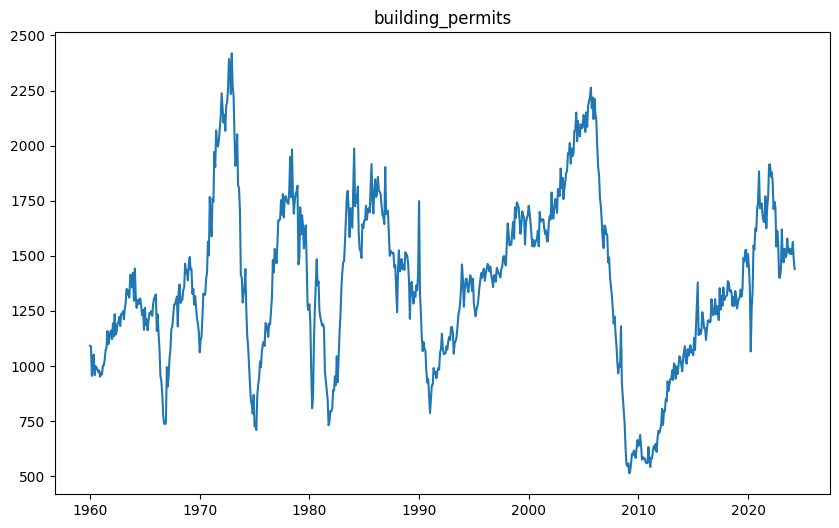

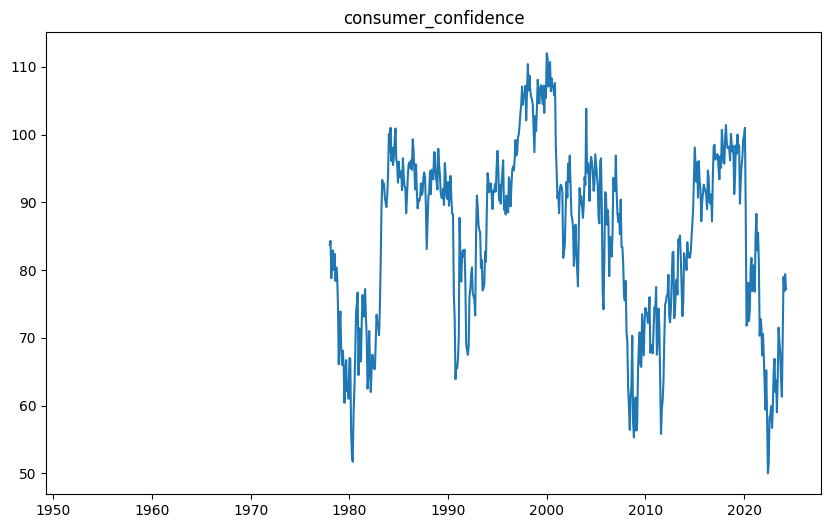

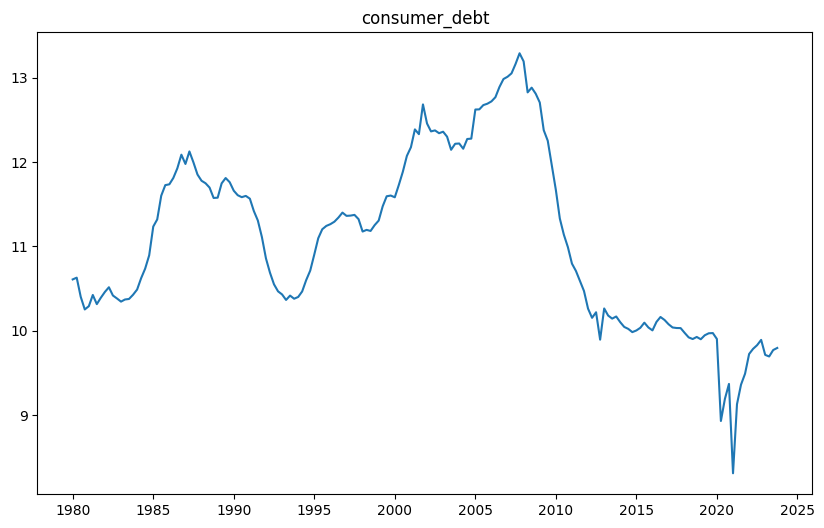

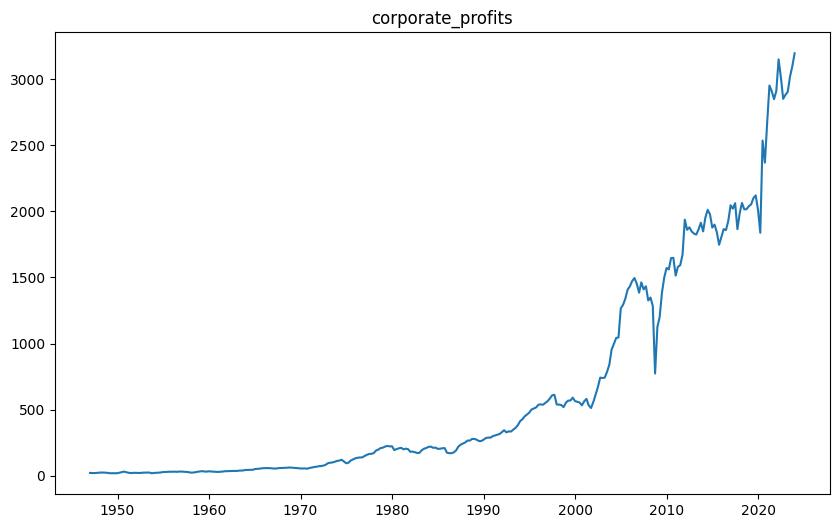

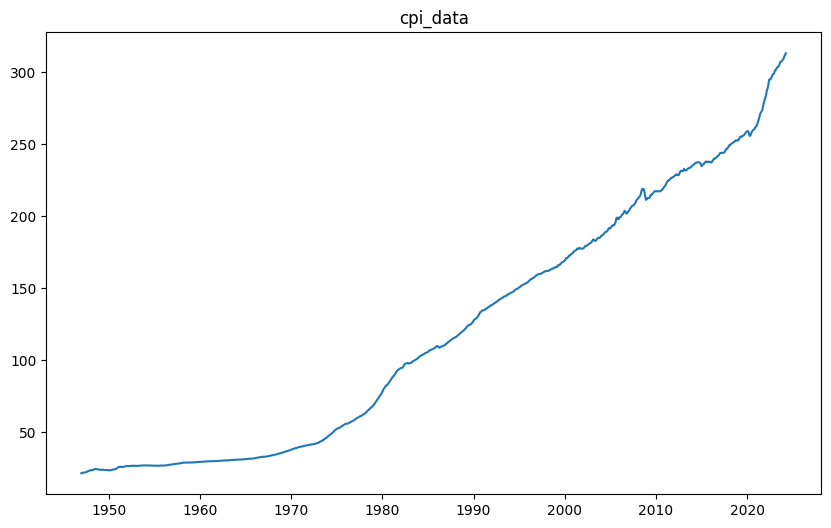

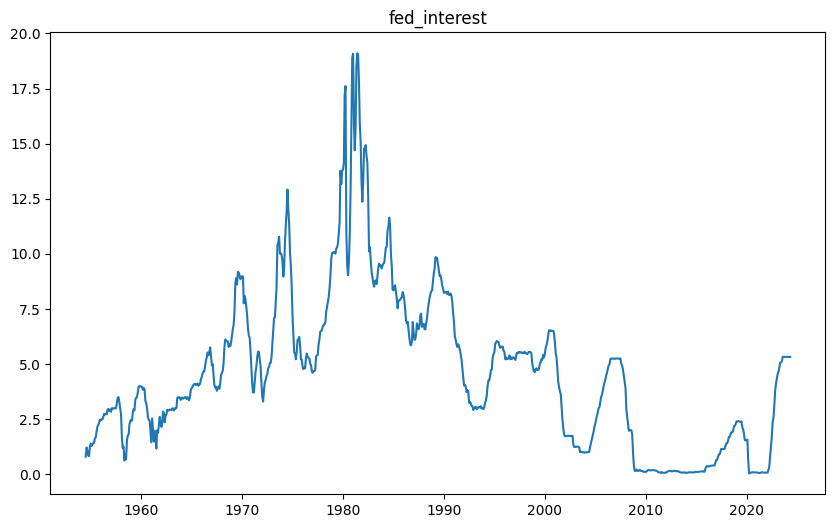

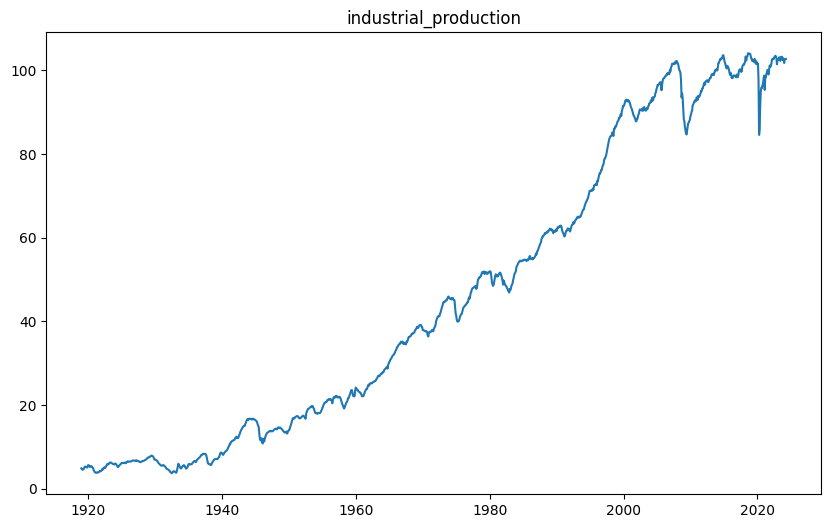

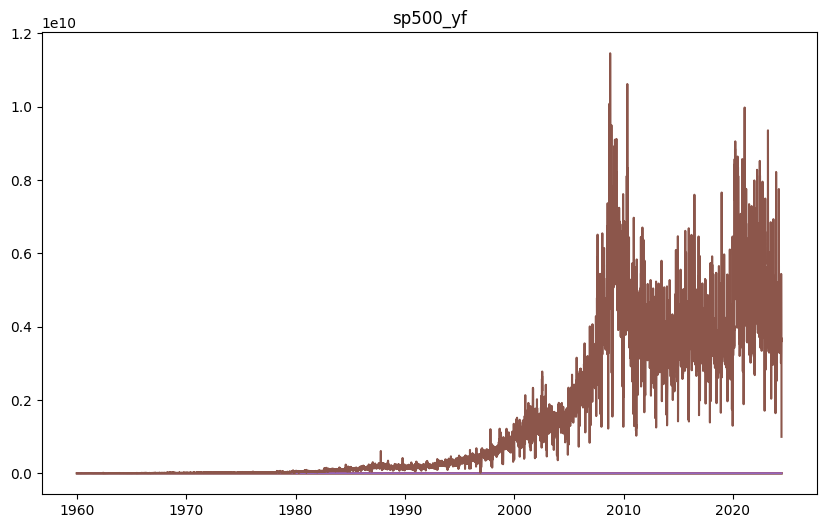

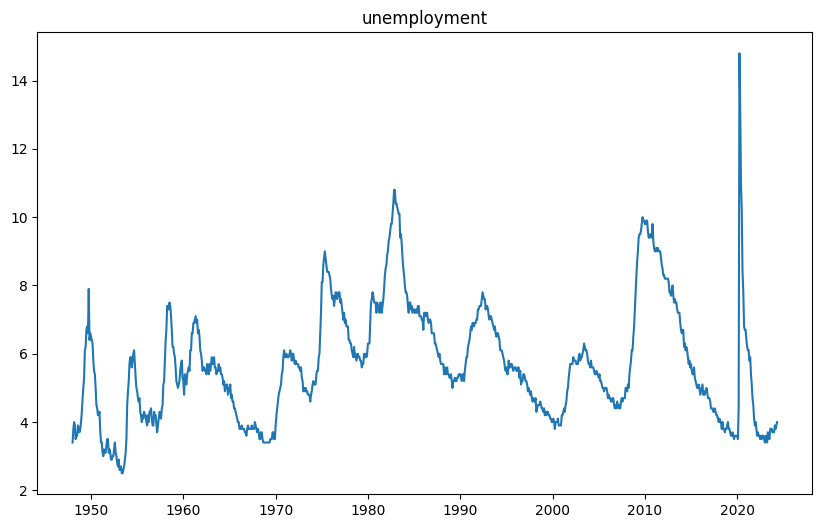

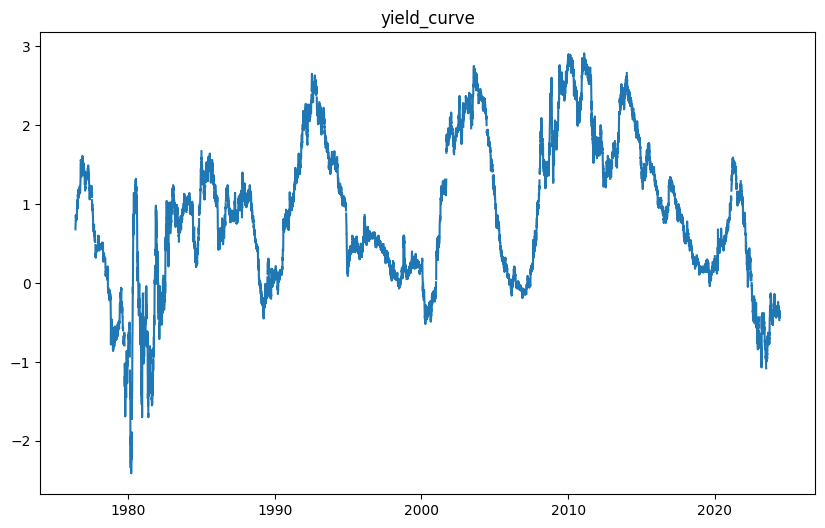

In [78]:
def graph_time_series_df(df, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df.values)
    plt.title(title)
    plt.show()

# Graph all time series data
for name, df in dfs.items():
    graph_time_series_df(df, name)

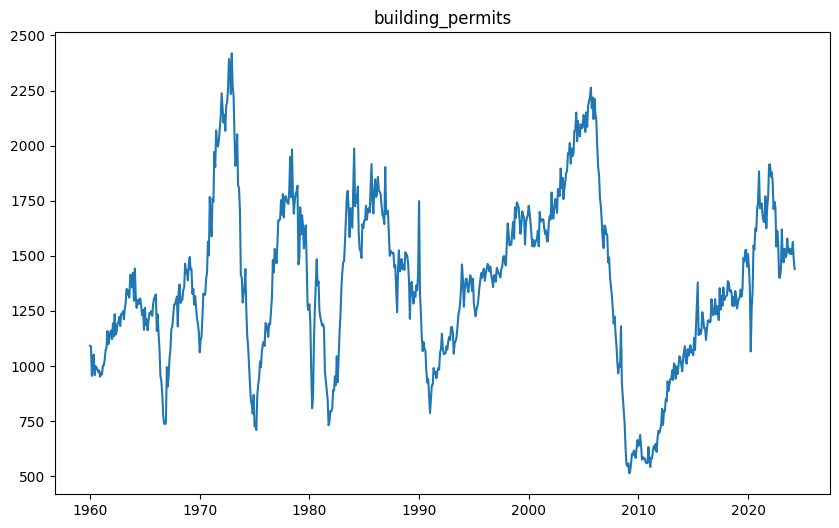

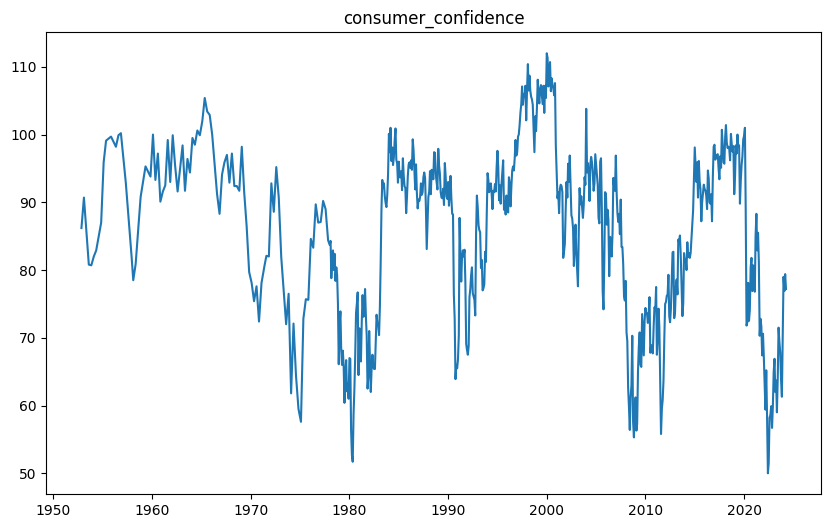

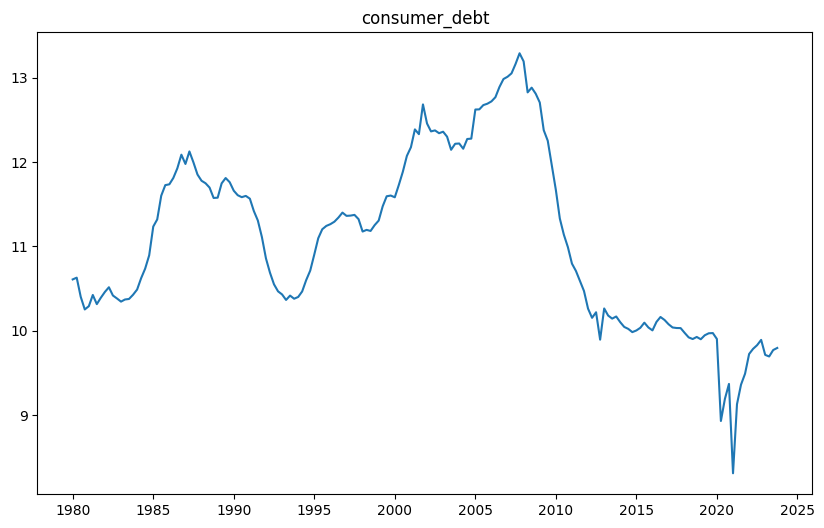

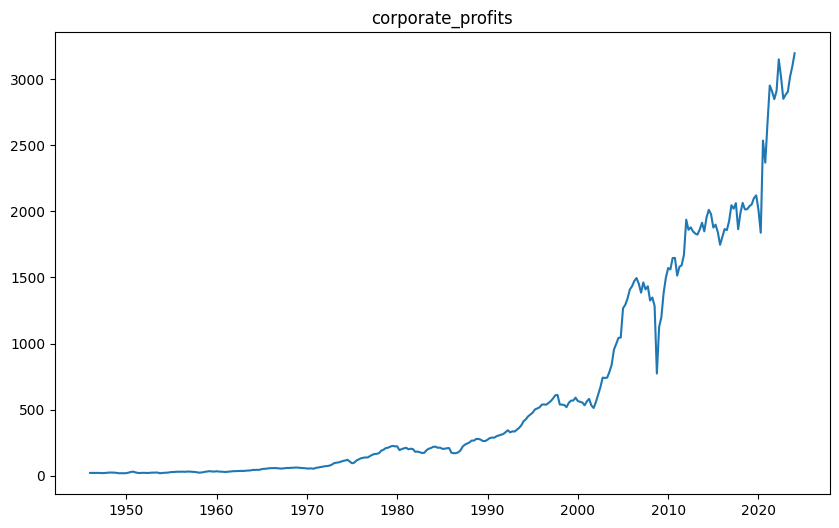

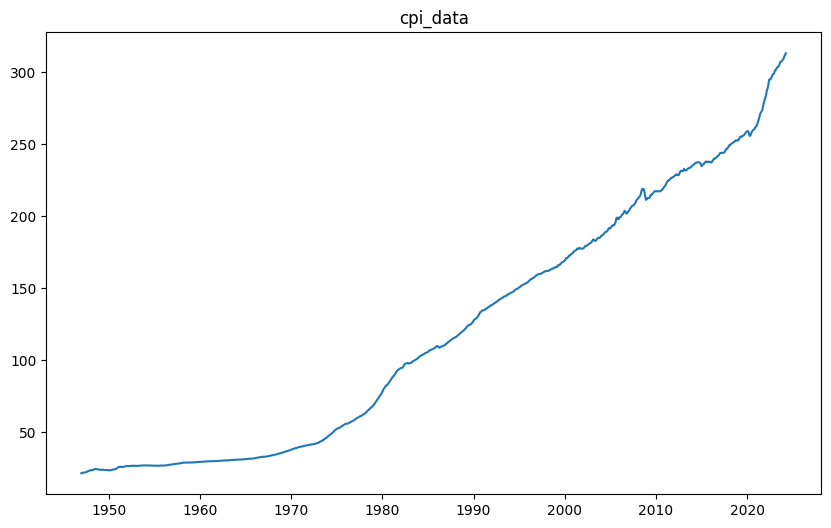

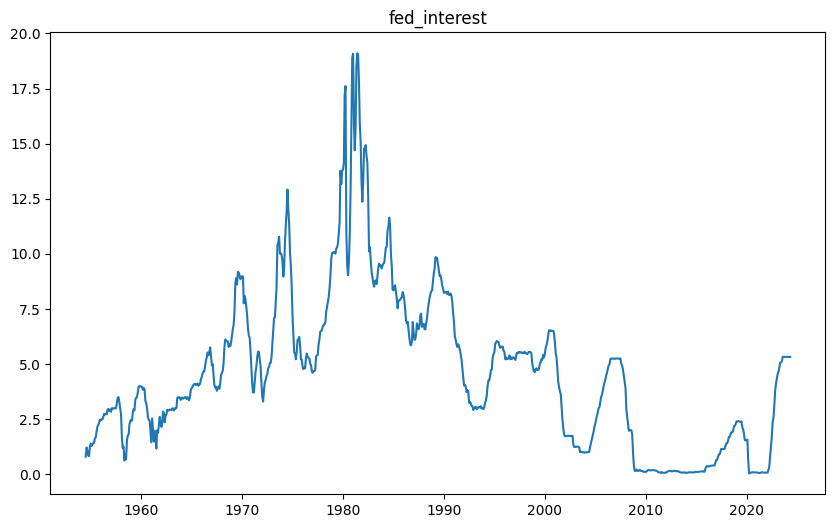

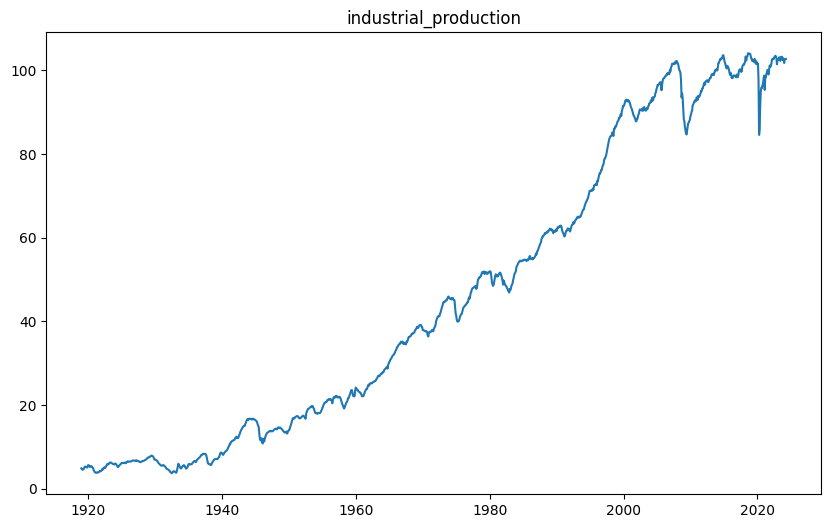

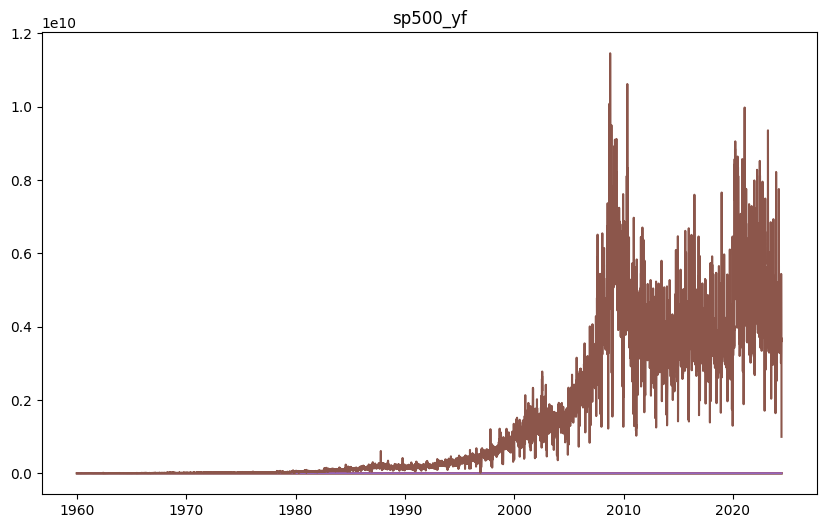

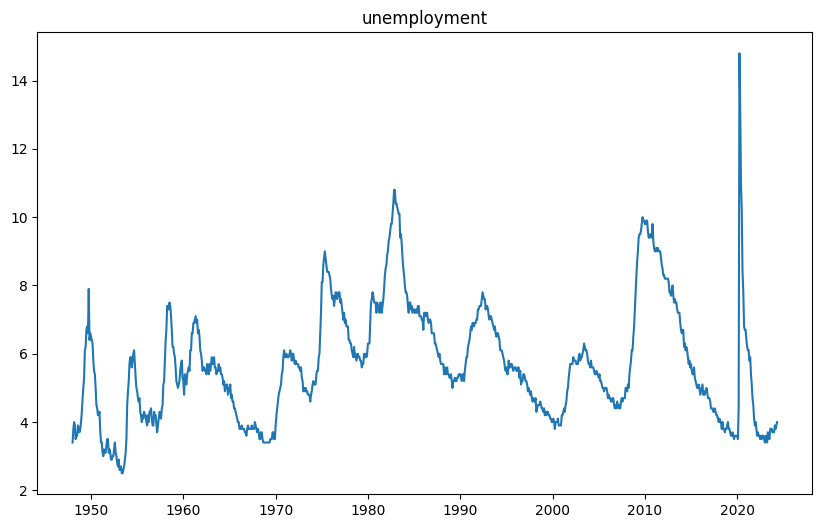

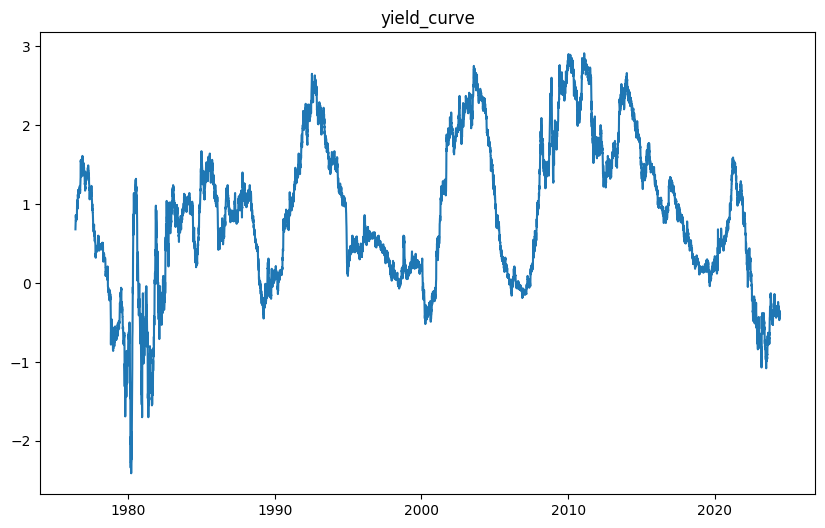

In [79]:
# Some datasets have missing values, we can impute them using the mean of the previous and next values

def impute_missing_values(df):
    # Impute missing values
    df = df.interpolate(method='time')
    # Fill missing values at the start of the time series
    df = df.ffill()
    # Fill missing values at the end of the time series
    df = df.bfill()
    return df

# Impute missing values for all datasets
for name, df in dfs.items():
    dfs[name] = impute_missing_values(df)

# Graph all time series data after imputation
for name, df in dfs.items():
    graph_time_series_df(df, name)

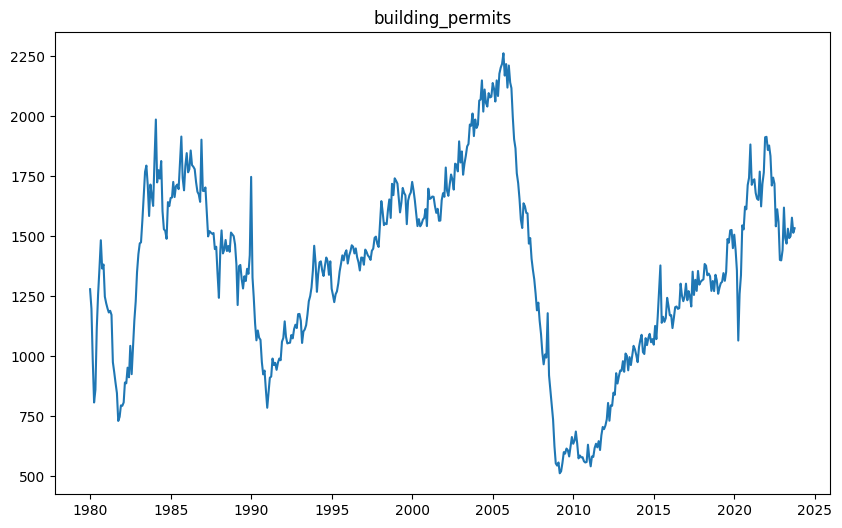

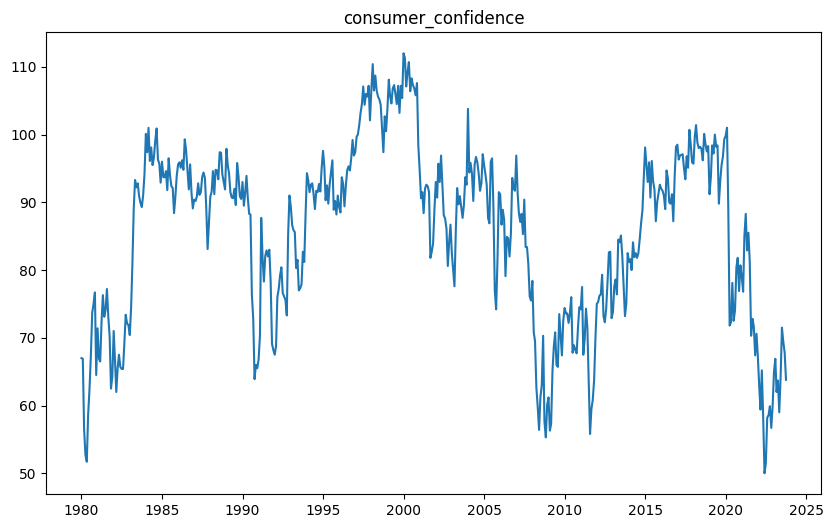

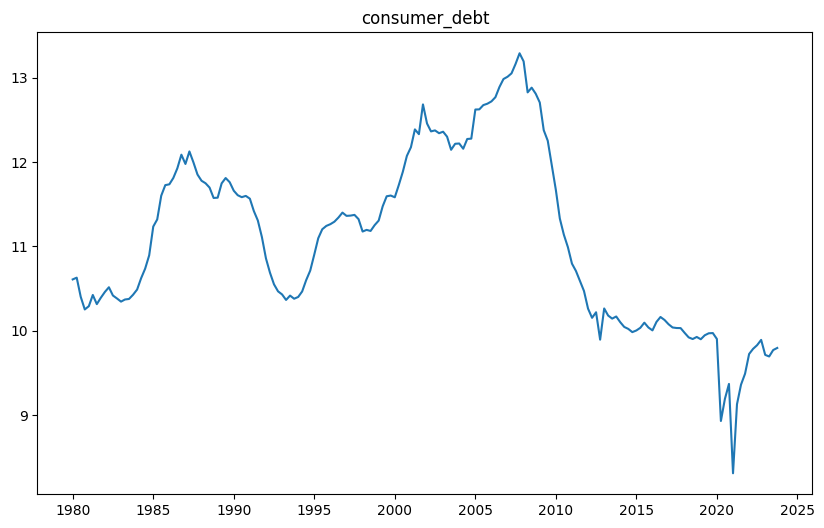

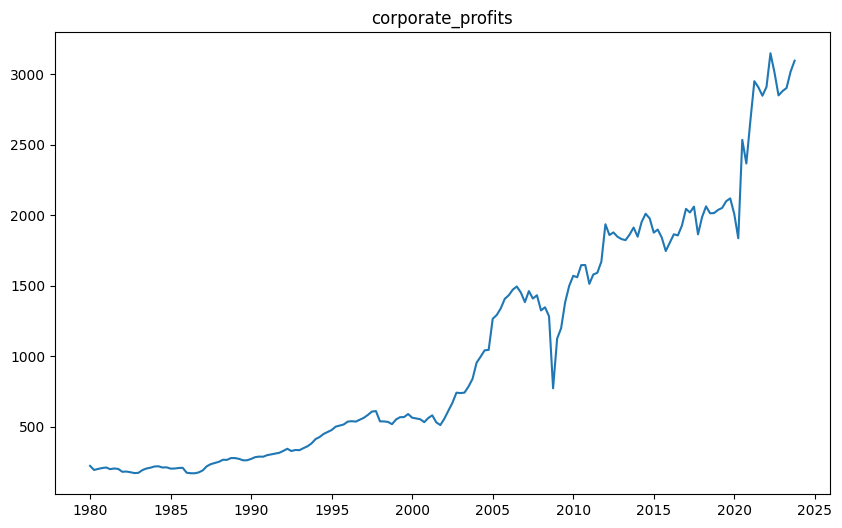

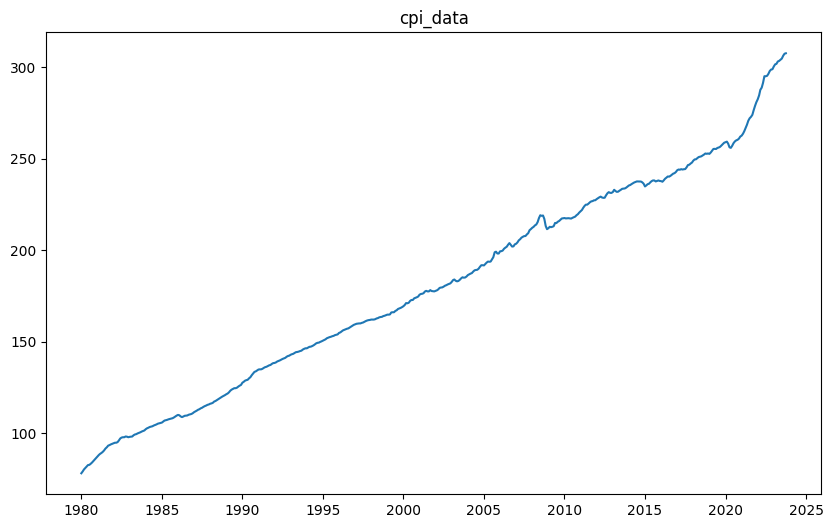

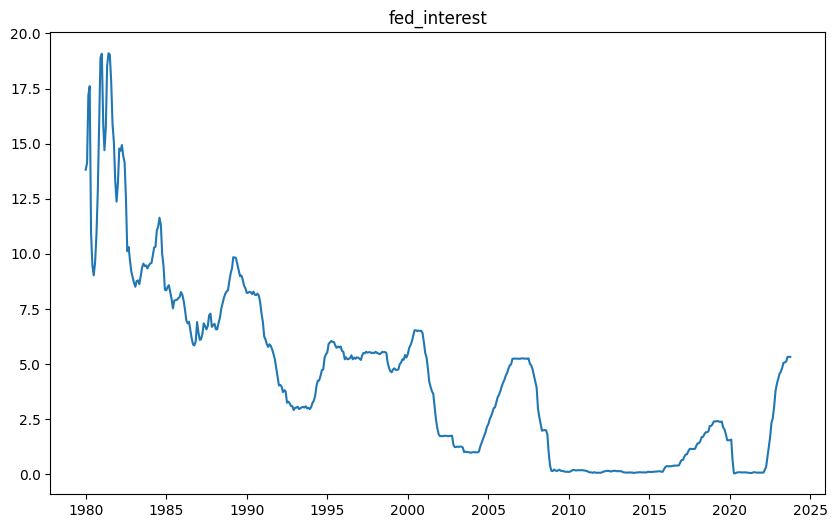

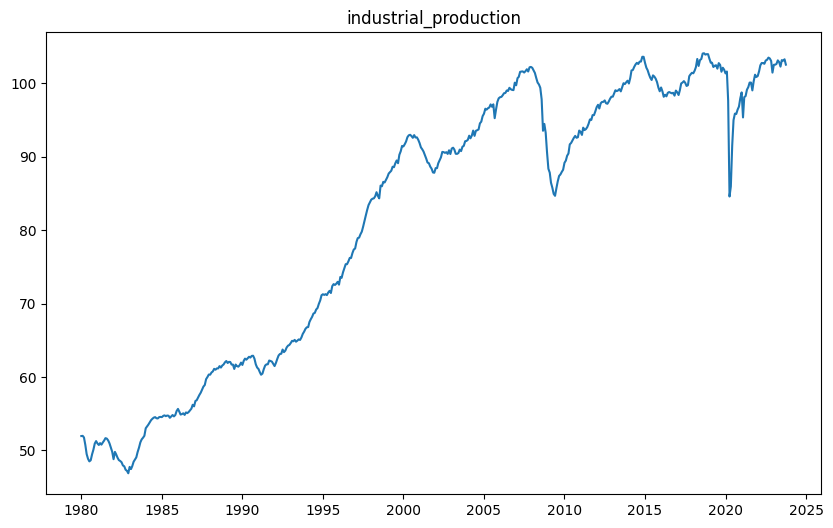

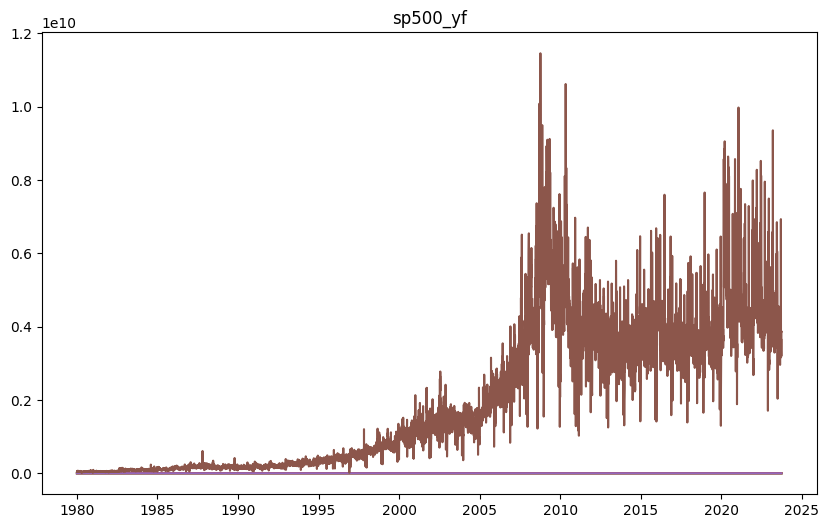

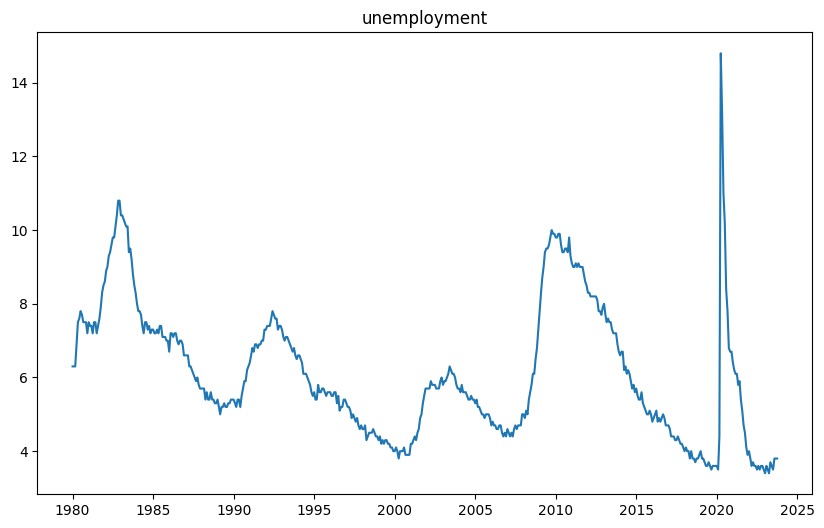

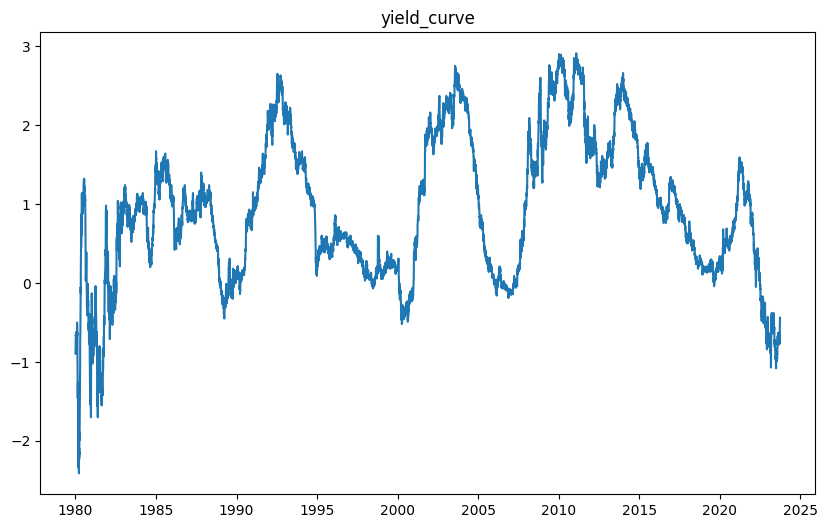

In [80]:
# In the end, imputation is basically forecasting.
# We can use the mean of the previous and next values to impute missing values, but this is not always the best method.
# It's best to just stick to the data that we have, and truncate the datasets to the intersection time range.
# Check data quality
def check_nan_values(dfs):
    for name, df in dfs.items():
        if df.isnull().values.any():
            print(f'{name} has NaN values')

def check_duplicates(dfs):
    for name, df in dfs.items():
        if df.index.duplicated().any():
            print(f'{name} has duplicated indices')

def check_within_time_range(dfs, start, end):
    for name, df in dfs.items():
        if df.index.min() < start or df.index.max() > end:
            print(f'{name} is not within the intersection time range')
            
def check_data_quality(dfs, start, end):
    check_nan_values(dfs)
    check_duplicates(dfs)
    check_within_time_range(dfs, start, end)

    # If nothing is printed, then the data quality is good
    if not any([df.isnull().values.any() for df in dfs.values()]) and not any([df.index.duplicated().any() for df in dfs.values()]) and all([df.index.min() >= start and df.index.max() <= end for df in dfs.values()]):
        print('Data quality is good')

# Truncate all datasets to the intersection time range
for name, df in dfs.items():
    dfs[name] = df.loc[start:end]

# Graph all time series data after truncation
for name, df in dfs.items():
    graph_time_series_df(df, name)

In [81]:
# Check data quality
check_data_quality(dfs, start, end)

Data quality is good


In [82]:
# Combine into single dataframe for analysis using date as time series index
df = pd.concat(dfs.values(), axis=1, keys=dfs.keys())
df.head()

building_permits consumer_confidence consumer_debt  \
           building_permits consumer_confidence consumer_debt   
date                                                            
1980-01-01           1280.0                67.0     10.608892   
1980-01-02              NaN                 NaN           NaN   
1980-01-03              NaN                 NaN           NaN   
1980-01-04              NaN                 NaN           NaN   
1980-01-07              NaN                 NaN           NaN   

           corporate_profits cpi_data  fed_interest industrial_production  \
           corporate_profits      cpi interest_rate industrial_production   
date                                                                        
1980-01-01           223.179     78.0         13.82               51.9545   
1980-01-02               NaN      NaN           NaN                   NaN   
1980-01-03               NaN      NaN           NaN                   NaN   
1980-01-04               NaN      NaN           NaN                   NaN   
1980-01-07               NaN      NaN           NaN                   NaN   

           sp500_yf                                                  \
               open        high         low       close   adj_close   
date                                                                  
1980-01-01      NaN         NaN         NaN         NaN         NaN   
1980-01-02      0.0  108.430000  105.290001  105.760002  105.760002   
1980-01-03      0.0  106.080002  103.260002  105.220001  105.220001   
1980-01-04      0.0  107.080002  105.089996  106.519997  106.519997   
1980-01-07      0.0  107.800003  105.800003  106.809998  106.809998   

                       unemployment yield_curve  
                volume       unrate yield_curve  
date                                             
1980-01-01         NaN          6.3      -0.895  
1980-01-02  40610000.0          NaN      -0.890  
1980-01-03  50480000.0          NaN      -0.850  
1980-01-04  39130000.0          NaN      -0.810  
1980-01-07  44500000.0          NaN      -0.720

In [83]:
# Rename columns for brevity
df.columns = ['building_permits', 'consumer_confidence', 'consumer_debt', 'corporate_profit', 'cpi', 'fed_interest_rate', 'industrial_prod', 'sp_open', 'sp_high', 'sp_low', 'sp_close', 'sp_adj_close', 'sp_volume', 'un_rate', '10Y2Y_curve']

In [84]:
# Currently we have data daily, but we want to analyze it weekly or monthly
# We can resample the data to a different frequency (this time, weekly)
df_weekly = df.resample('W').mean()
df_monthly = df.resample('MS').mean()
df_weekly.head()

building_permits  consumer_confidence  consumer_debt  \
date                                                               
1980-01-06            1280.0                 67.0      10.608892   
1980-01-13               NaN                  NaN            NaN   
1980-01-20               NaN                  NaN            NaN   
1980-01-27               NaN                  NaN            NaN   
1980-02-03            1199.0                 66.9            NaN   

            corporate_profit   cpi  fed_interest_rate  industrial_prod  \
date                                                                     
1980-01-06           223.179  78.0              13.82          51.9545   
1980-01-13               NaN   NaN                NaN              NaN   
1980-01-20               NaN   NaN                NaN              NaN   
1980-01-27               NaN   NaN                NaN              NaN   
1980-02-03               NaN  79.0              14.13          51.9779   

            sp_open     sp_high      sp_low    sp_close  sp_adj_close  \
date                                                                    
1980-01-06      0.0  107.196668  104.546666  105.833333    105.833333   
1980-01-13      0.0  110.040001  107.572002  108.923999    108.923999   
1980-01-20      0.0  112.004001  109.771997  110.867999    110.867999   
1980-01-27      0.0  113.929999  111.564000  112.872000    112.872000   
1980-02-03      0.0  115.995999  113.248000  114.680000    114.680000   

               sp_volume  un_rate  10Y2Y_curve  
date                                            
1980-01-06  4.340667e+07      6.3     -0.86125  
1980-01-13  5.440400e+07      NaN     -0.67800  
1980-01-20  5.485400e+07      NaN     -0.66600  
1980-01-27  5.111200e+07      NaN     -0.68600  
1980-02-03  5.455600e+07      6.3     -0.67200

In [85]:
df_weekly = impute_missing_values(df_weekly)
df_monthly = impute_missing_values(df_monthly)
df_weekly.head()

building_permits  consumer_confidence  consumer_debt  \
date                                                               
1980-01-06           1280.00               67.000      10.608892   
1980-01-13           1259.75               66.975      10.610501   
1980-01-20           1239.50               66.950      10.612110   
1980-01-27           1219.25               66.925      10.613719   
1980-02-03           1199.00               66.900      10.615328   

            corporate_profit    cpi  fed_interest_rate  industrial_prod  \
date                                                                      
1980-01-06        223.179000  78.00            13.8200         51.95450   
1980-01-13        220.968077  78.25            13.8975         51.96035   
1980-01-20        218.757154  78.50            13.9750         51.96620   
1980-01-27        216.546231  78.75            14.0525         51.97205   
1980-02-03        214.335308  79.00            14.1300         51.97790   

            sp_open     sp_high      sp_low    sp_close  sp_adj_close  \
date                                                                    
1980-01-06      0.0  107.196668  104.546666  105.833333    105.833333   
1980-01-13      0.0  110.040001  107.572002  108.923999    108.923999   
1980-01-20      0.0  112.004001  109.771997  110.867999    110.867999   
1980-01-27      0.0  113.929999  111.564000  112.872000    112.872000   
1980-02-03      0.0  115.995999  113.248000  114.680000    114.680000   

               sp_volume  un_rate  10Y2Y_curve  
date                                            
1980-01-06  4.340667e+07      6.3     -0.86125  
1980-01-13  5.440400e+07      6.3     -0.67800  
1980-01-20  5.485400e+07      6.3     -0.66600  
1980-01-27  5.111200e+07      6.3     -0.68600  
1980-02-03  5.455600e+07      6.3     -0.67200

In [86]:
df_monthly.head()

building_permits  consumer_confidence  consumer_debt  \
date                                                               
1980-01-01            1280.0                 67.0      10.608892   
1980-02-01            1199.0                 66.9      10.616018   
1980-03-01             988.0                 56.5      10.622683   
1980-04-01             808.0                 52.7      10.629809   
1980-05-01             861.0                 51.7      10.554916   

            corporate_profit   cpi  fed_interest_rate  industrial_prod  \
date                                                                     
1980-01-01        223.179000  78.0              13.82          51.9545   
1980-02-01        213.387769  79.0              14.13          51.9779   
1980-03-01        204.228231  80.1              17.19          51.7565   
1980-04-01        194.437000  80.9              17.61          50.7369   
1980-05-01        196.838648  81.7              10.98          49.4900   

            sp_open     sp_high      sp_low    sp_close  sp_adj_close  \
date                                                                    
1980-01-01      0.0  112.086364  109.604091  110.868181    110.868181   
1980-02-01      0.0  116.671001  113.935001  115.339001    115.339001   
1980-03-01      0.0  106.332382  103.338571  104.686191    104.686191   
1980-04-01      0.0  104.121428  101.774285  102.966668    102.966668   
1980-05-01      0.0  108.645715  106.511905  107.694285    107.694285   

               sp_volume  un_rate  10Y2Y_curve  
date                                            
1980-01-01  5.264727e+07      6.3    -0.704565  
1980-02-01  4.782650e+07      6.3    -0.988571  
1980-03-01  4.173571e+07      6.3    -2.135714  
1980-04-01  3.210190e+07      6.9    -1.069205  
1980-05-01  3.642476e+07      7.5     0.749773

In [87]:
def augment_and_impute(df):
    # Calculate percentage change for each column, then put in separate dataframe
    df_pct = df.pct_change()
    df_pct.columns = [col + '_pct' for col in df_pct.columns]

    # Calculate rolling averages for each column, then put in separate dataframe
    df_roll = df.rolling(window=3).mean()
    df_roll.columns = [col + '_roll' for col in df_roll.columns]

    # Concatenate the dataframes
    df = pd.concat([df, df_pct, df_roll], axis=1)

    # Impute missing values
    df = df.ffill().bfill()

    # Convert inf to max and -inf to min
    df = df.replace([np.inf, -np.inf], [np.nan, np.nan])

    # Replace nan with mean
    df = df.fillna(df.mean())

    return df

# Augment and impute the data
df_monthly, df_weekly = augment_and_impute(df_monthly), augment_and_impute(df_weekly)
# Fill anything missing
df_monthly, df_weekly = df_monthly.ffill().bfill(), df_weekly.ffill().bfill()

In [88]:
df_monthly.head()

building_permits  consumer_confidence  consumer_debt  \
date                                                               
1980-01-01            1280.0                 67.0      10.608892   
1980-02-01            1199.0                 66.9      10.616018   
1980-03-01             988.0                 56.5      10.622683   
1980-04-01             808.0                 52.7      10.629809   
1980-05-01             861.0                 51.7      10.554916   

            corporate_profit   cpi  fed_interest_rate  industrial_prod  \
date                                                                     
1980-01-01        223.179000  78.0              13.82          51.9545   
1980-02-01        213.387769  79.0              14.13          51.9779   
1980-03-01        204.228231  80.1              17.19          51.7565   
1980-04-01        194.437000  80.9              17.61          50.7369   
1980-05-01        196.838648  81.7              10.98          49.4900   

            sp_open     sp_high      sp_low  ...  fed_interest_rate_roll  \
date                                         ...                           
1980-01-01      0.0  112.086364  109.604091  ...               15.046667   
1980-02-01      0.0  116.671001  113.935001  ...               15.046667   
1980-03-01      0.0  106.332382  103.338571  ...               15.046667   
1980-04-01      0.0  104.121428  101.774285  ...               16.310000   
1980-05-01      0.0  108.645715  106.511905  ...               15.260000   

            industrial_prod_roll  sp_open_roll  sp_high_roll  sp_low_roll  \
date                                                                        
1980-01-01             51.896300           0.0    111.696582   108.959221   
1980-02-01             51.896300           0.0    111.696582   108.959221   
1980-03-01             51.896300           0.0    111.696582   108.959221   
1980-04-01             51.490433           0.0    109.041604   106.349286   
1980-05-01             50.661133           0.0    106.366508   103.874920   

            sp_close_roll  sp_adj_close_roll  sp_volume_roll  un_rate_roll  \
date                                                                         
1980-01-01     110.297791         110.297791    4.740316e+07           6.3   
1980-02-01     110.297791         110.297791    4.740316e+07           6.3   
1980-03-01     110.297791         110.297791    4.740316e+07           6.3   
1980-04-01     107.663953         107.663953    4.055471e+07           6.5   
1980-05-01     105.115715         105.115715    3.675413e+07           6.9   

            10Y2Y_curve_roll  
date                          
1980-01-01         -1.276284  
1980-02-01         -1.276284  
1980-03-01         -1.276284  
1980-04-01         -1.397830  
1980-05-01         -0.818382  

[5 rows x 45 columns]

In [89]:
def check_correlation(df, cols, threshold=0.9):
    corr_matrix = df[cols].corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return [col for col in cols if col not in to_drop]

cols_for_percentage_w = check_correlation(df_weekly, df_weekly.columns)
cols_for_percentage_m = check_correlation(df_monthly, df_monthly.columns)

df_weekly = df_weekly[cols_for_percentage_w]
df_monthly = df_monthly[cols_for_percentage_m]

nan_weekly = df_weekly.isnull().sum().sum()
nan_monthly = df_monthly.isnull().sum().sum()
print('Number of missing values in weekly data: ', nan_weekly)
print('Number of missing values in monthly data: ', nan_monthly)

print("Columns in weekly data: ", df_weekly.columns)
print("Columns in monthly data: ", df_monthly.columns)

Number of missing values in weekly data:  0
Number of missing values in monthly data:  0
Columns in weekly data:  Index(['building_permits', 'consumer_confidence', 'consumer_debt',
       'corporate_profit', 'fed_interest_rate', 'sp_volume', 'un_rate',
       '10Y2Y_curve', 'building_permits_pct', 'consumer_confidence_pct',
       'consumer_debt_pct', 'corporate_profit_pct', 'cpi_pct',
       'fed_interest_rate_pct', 'industrial_prod_pct', 'sp_open_pct',
       'sp_volume_pct', 'un_rate_pct', '10Y2Y_curve_pct'],
      dtype='object')
Columns in monthly data:  Index(['building_permits', 'consumer_confidence', 'consumer_debt',
       'corporate_profit', 'fed_interest_rate', 'sp_volume', 'un_rate',
       '10Y2Y_curve', 'building_permits_pct', 'consumer_confidence_pct',
       'consumer_debt_pct', 'corporate_profit_pct', 'cpi_pct',
       'fed_interest_rate_pct', 'industrial_prod_pct', 'sp_open_pct',
       'sp_high_pct', 'sp_volume_pct', 'un_rate_pct', '10Y2Y_curve_pct'],
      dtype='ob

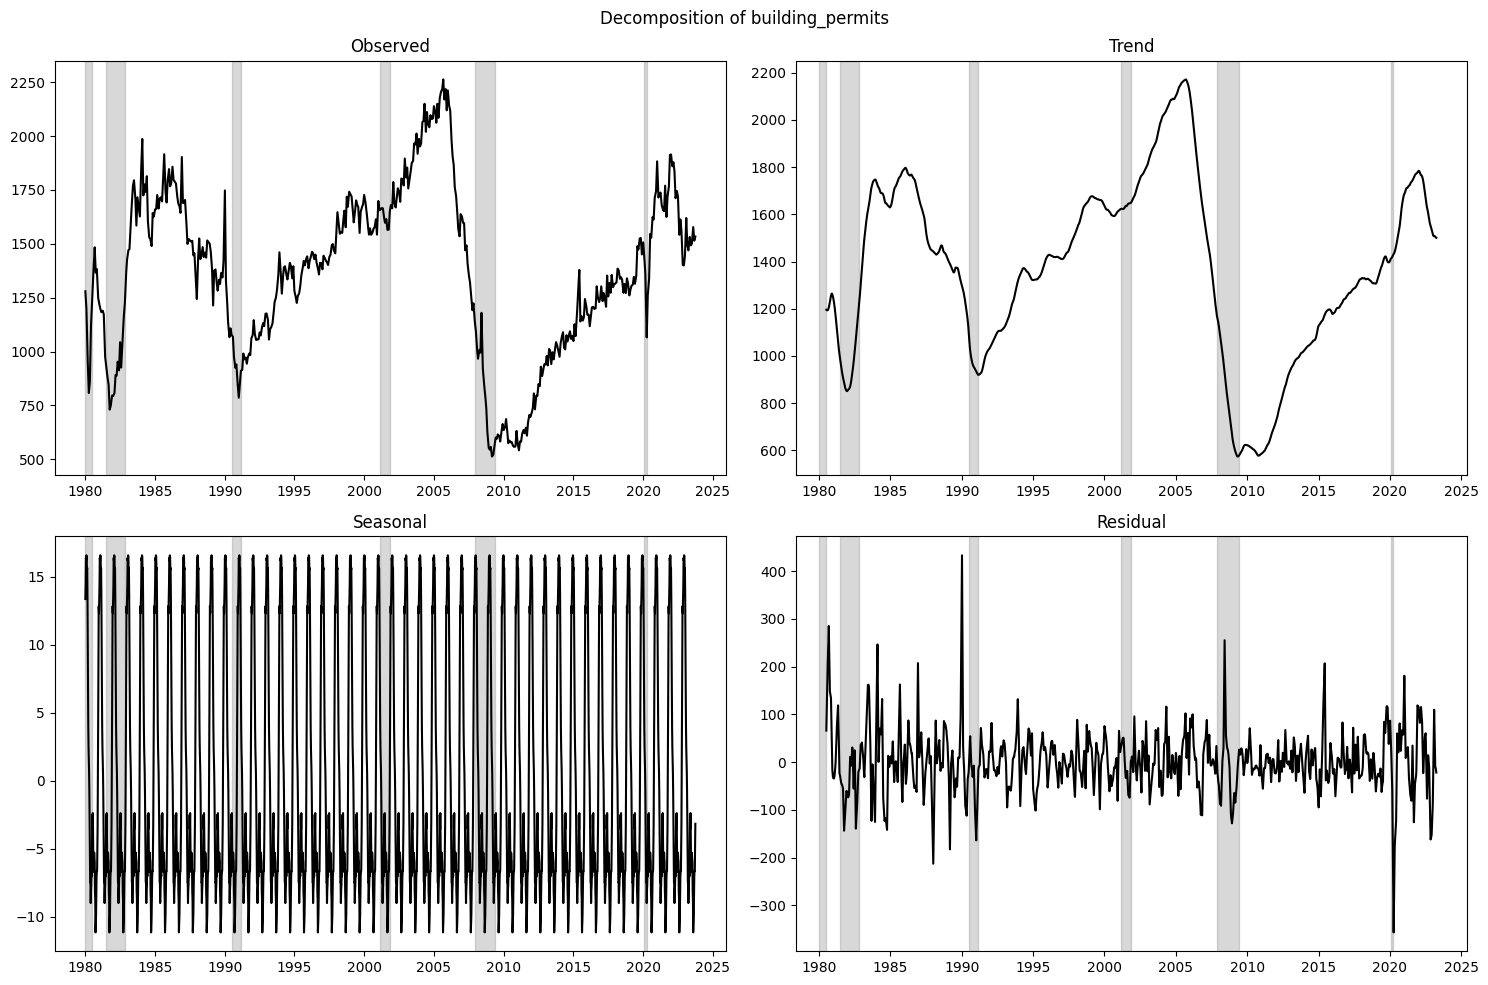

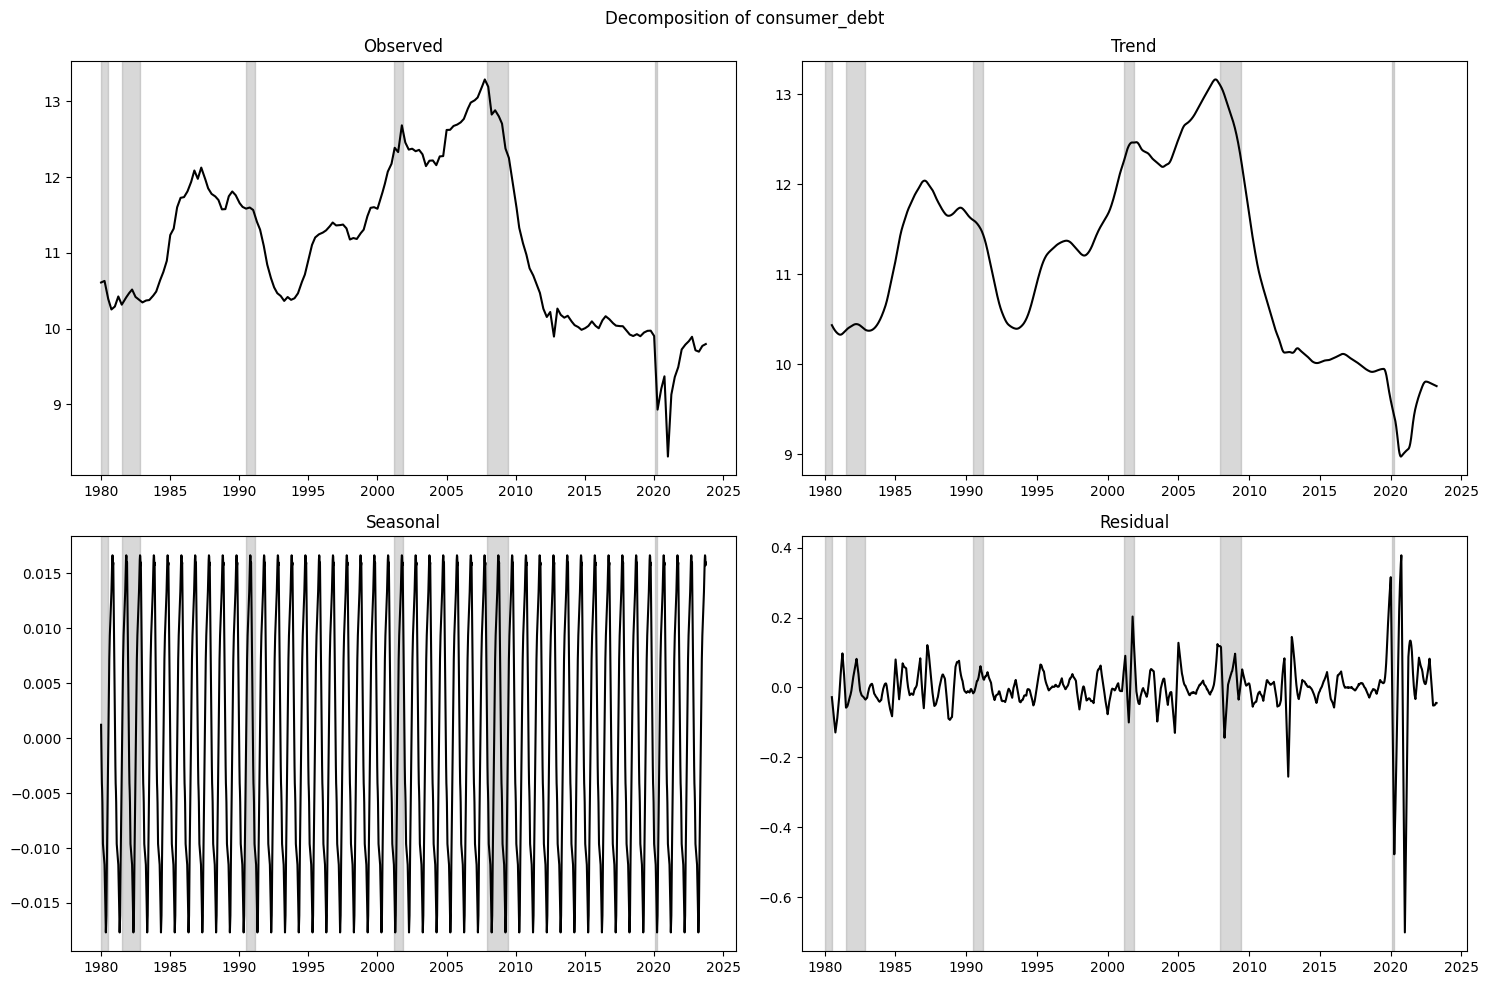

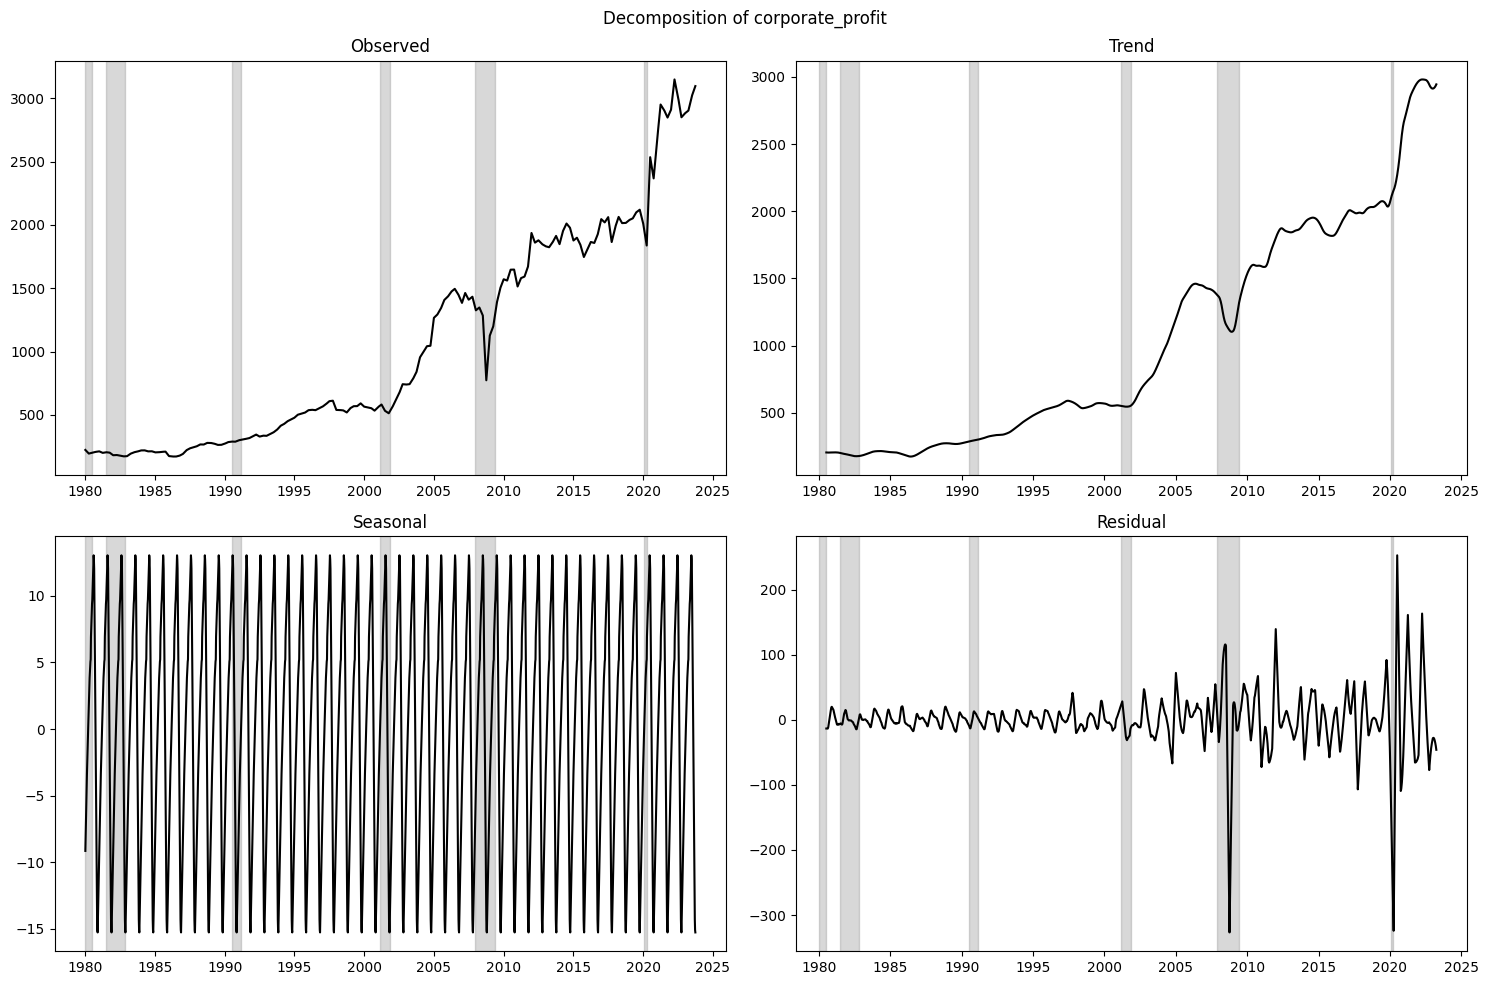

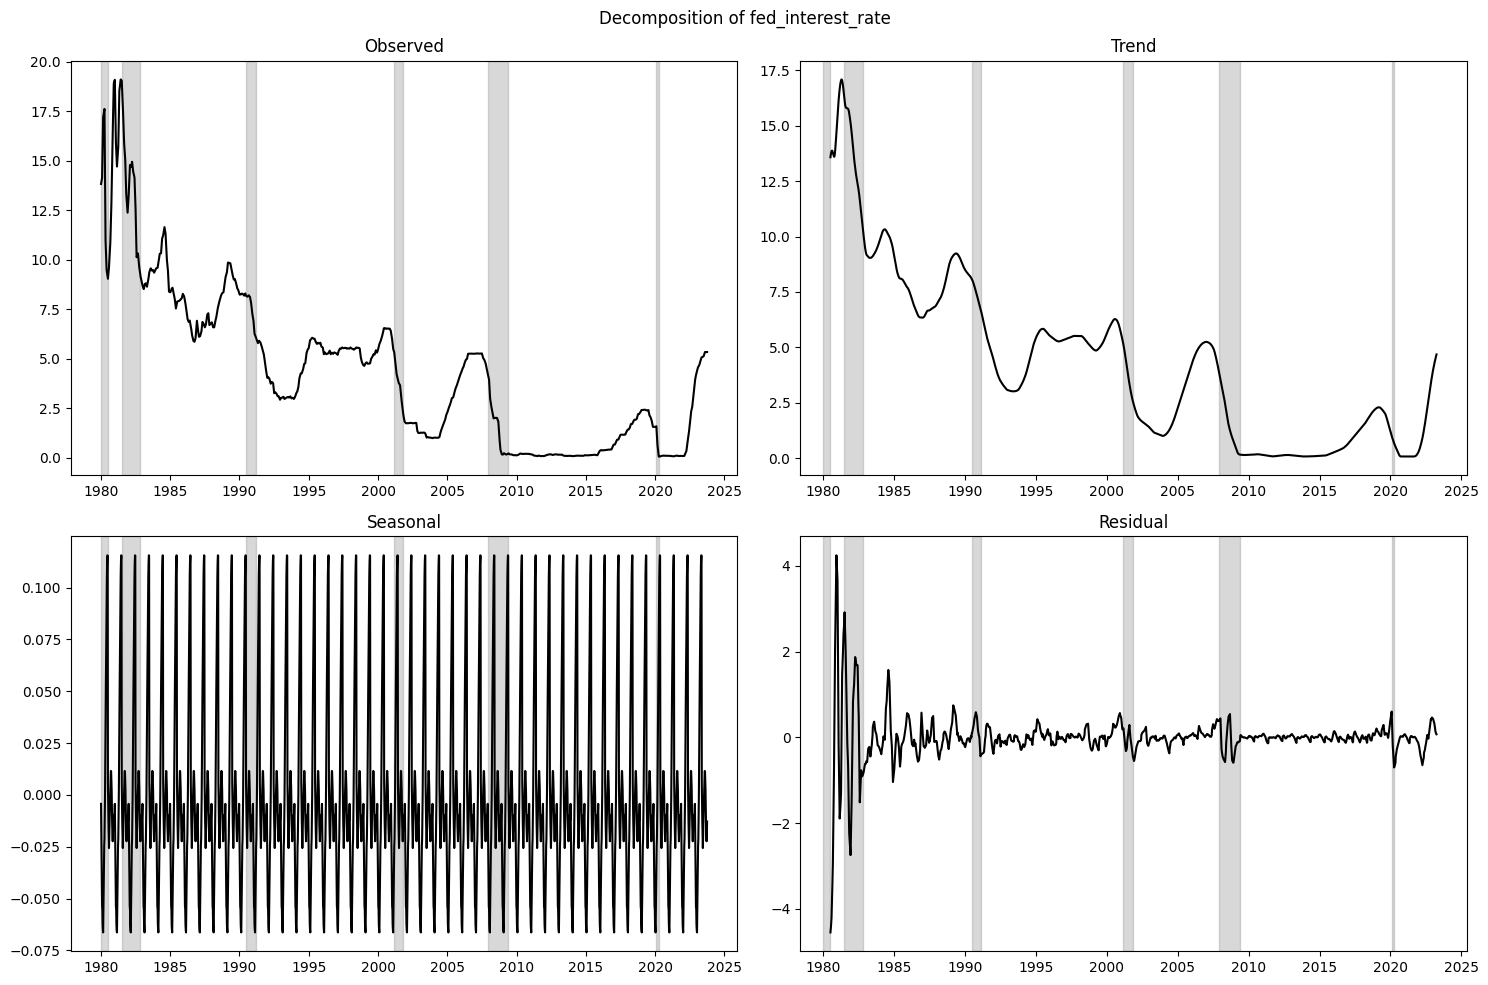

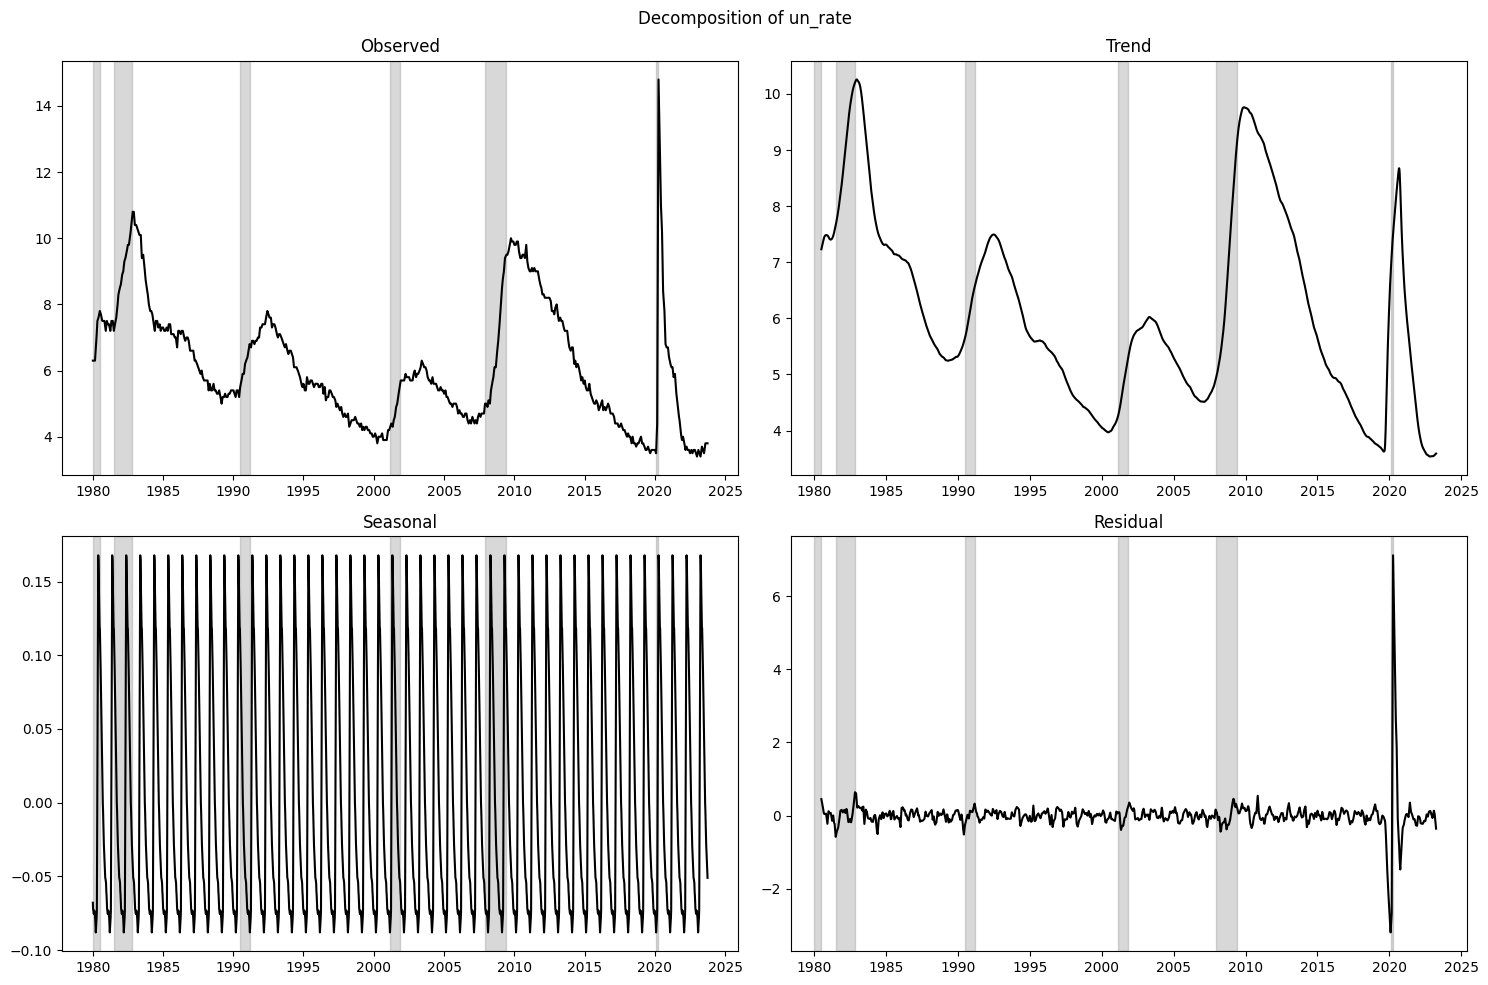

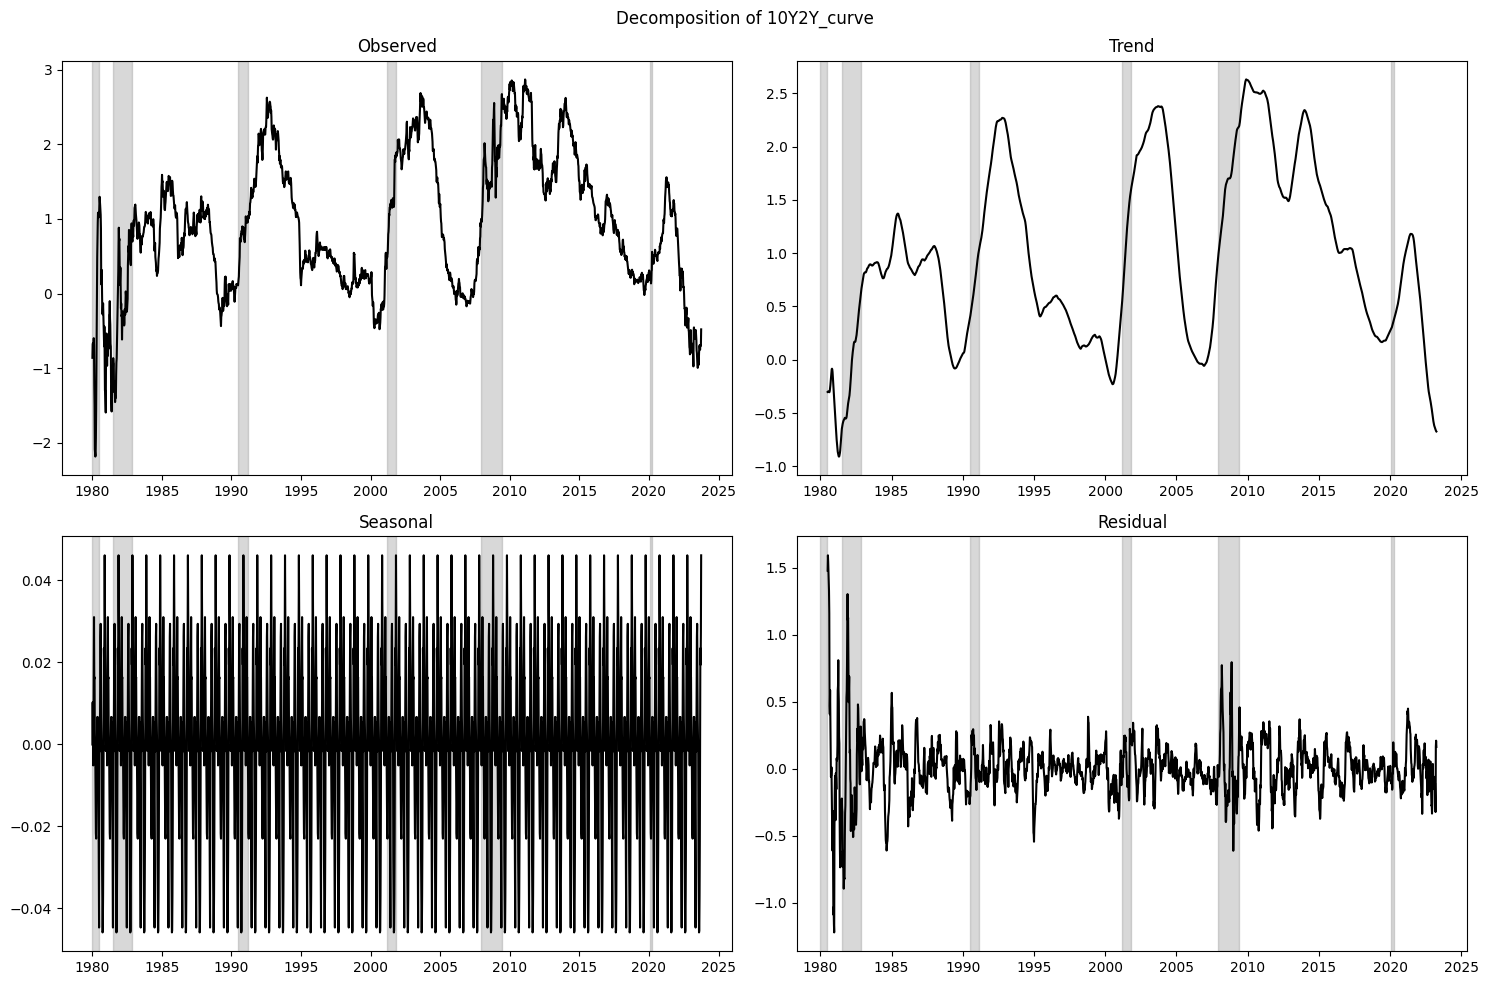

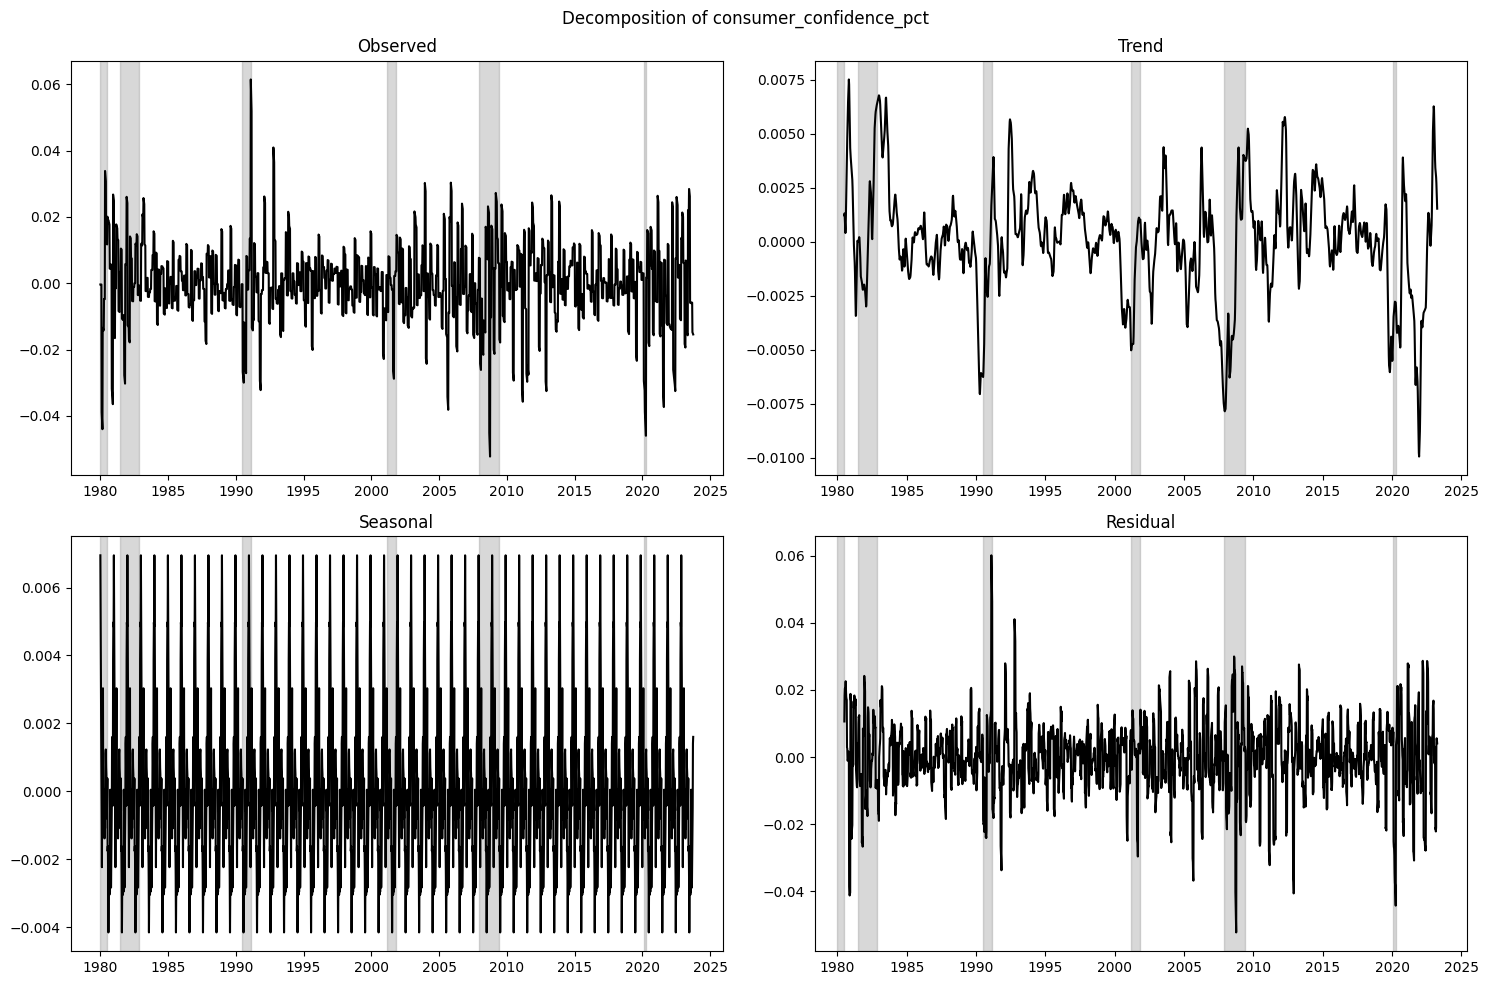

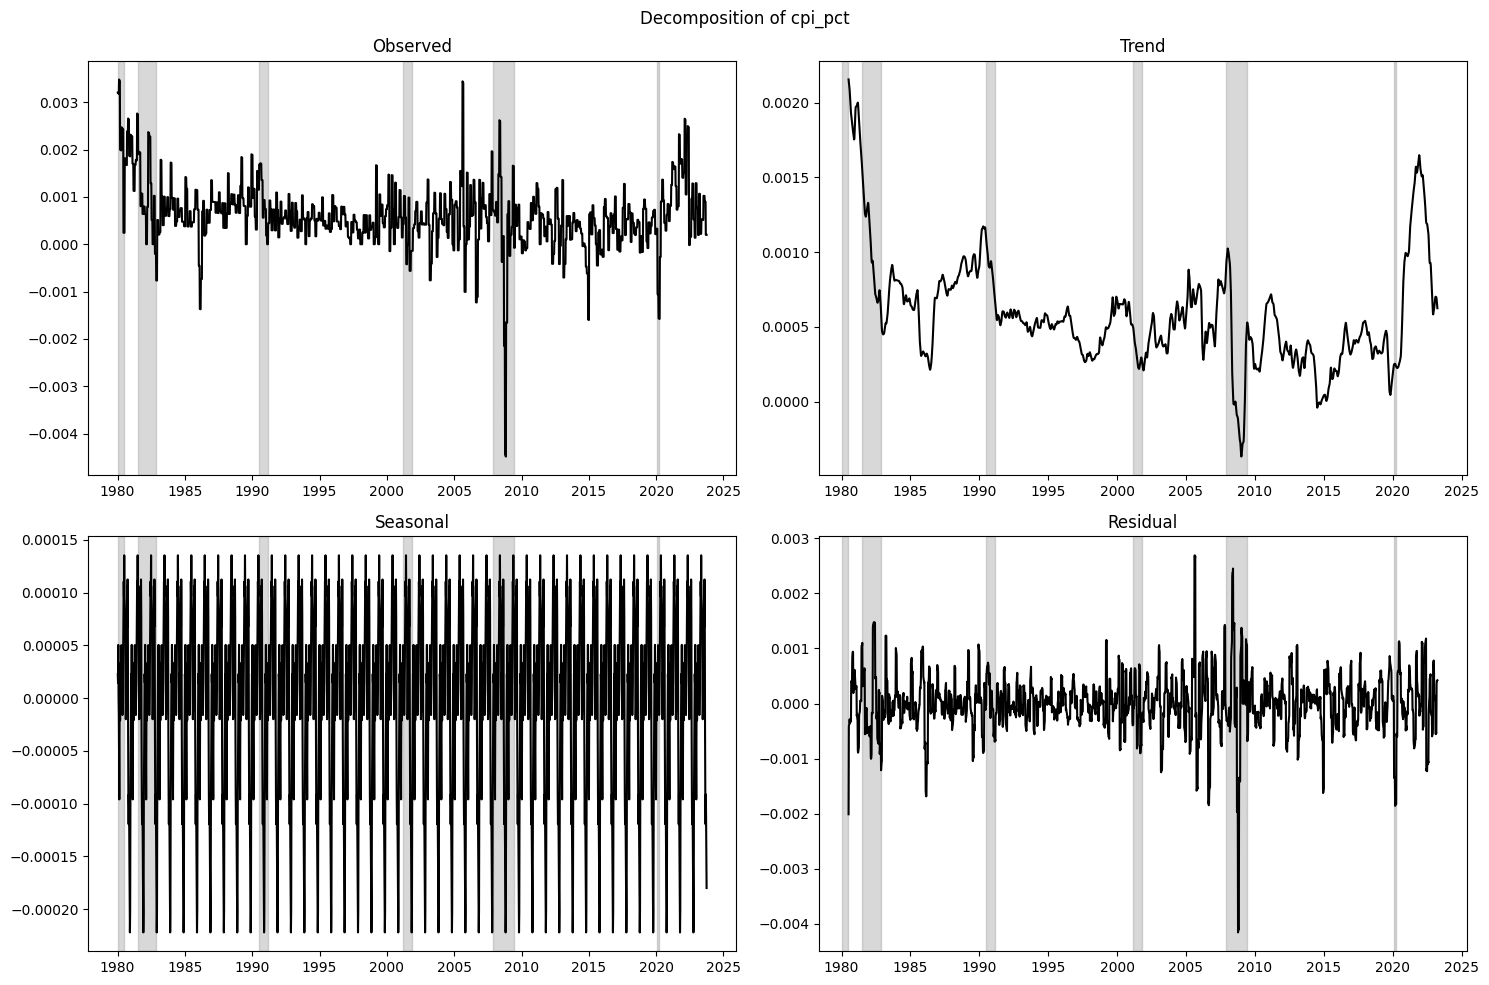

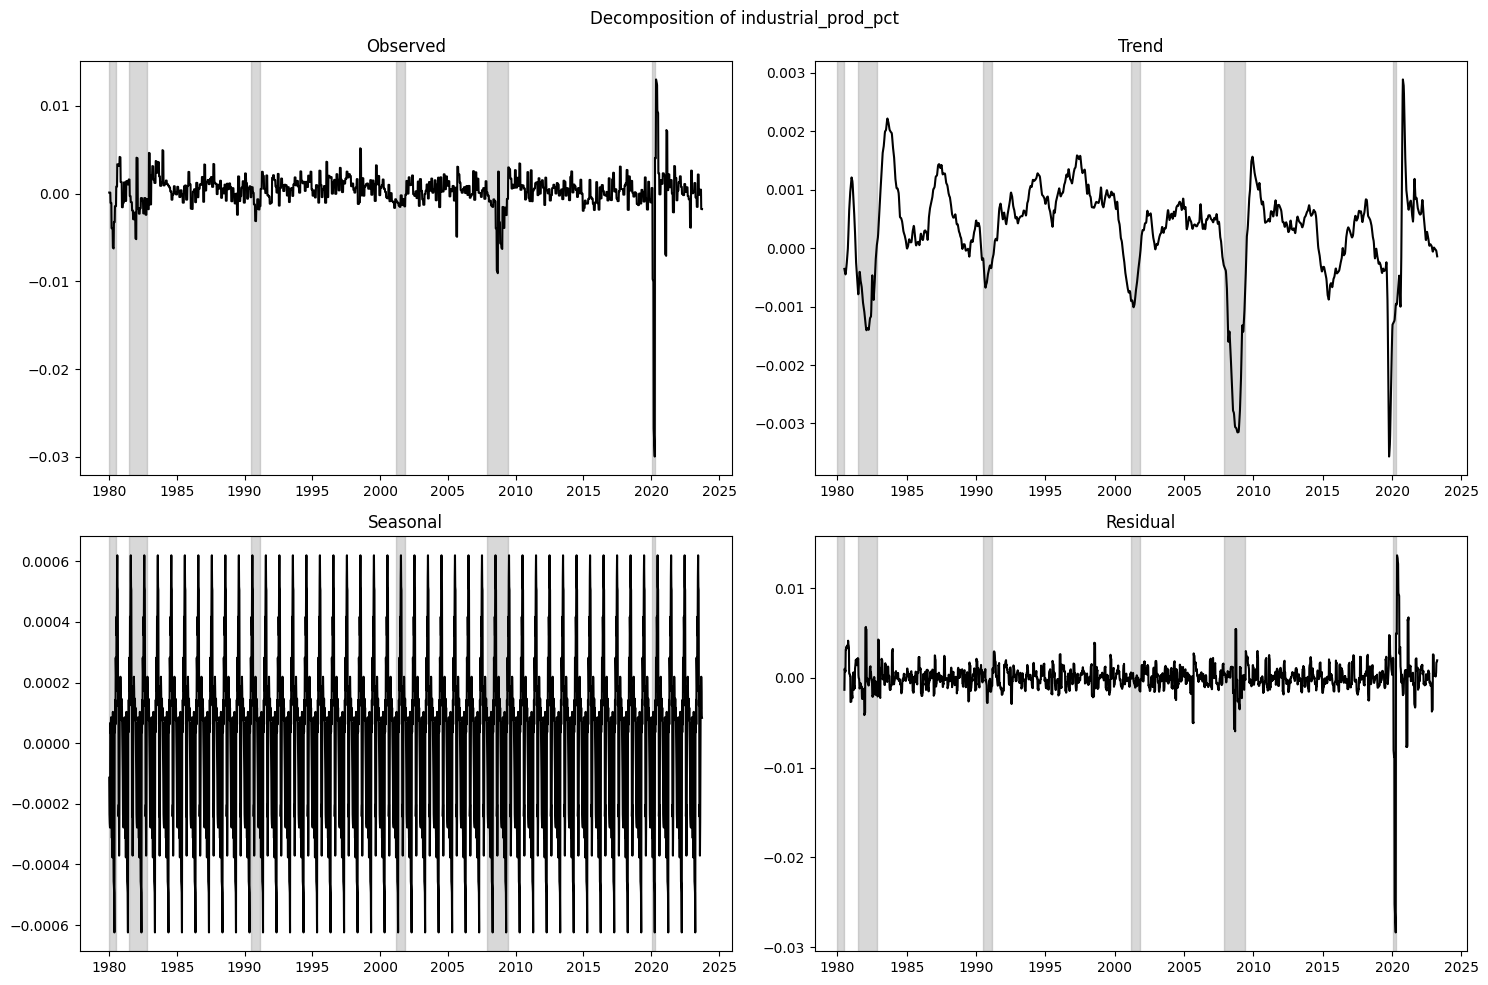

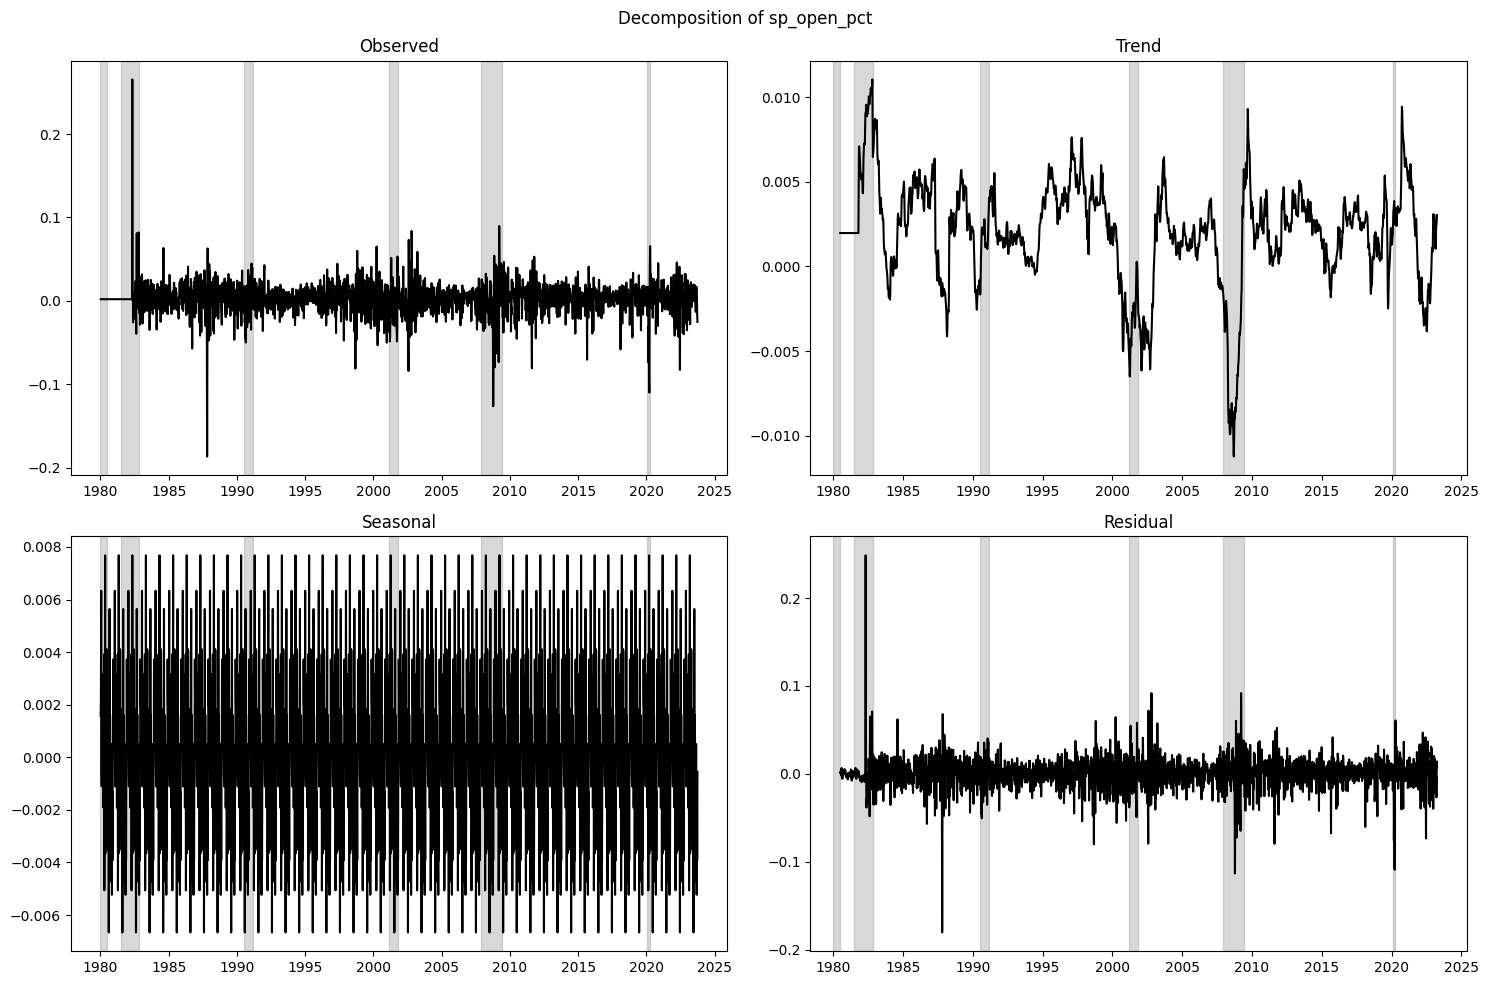

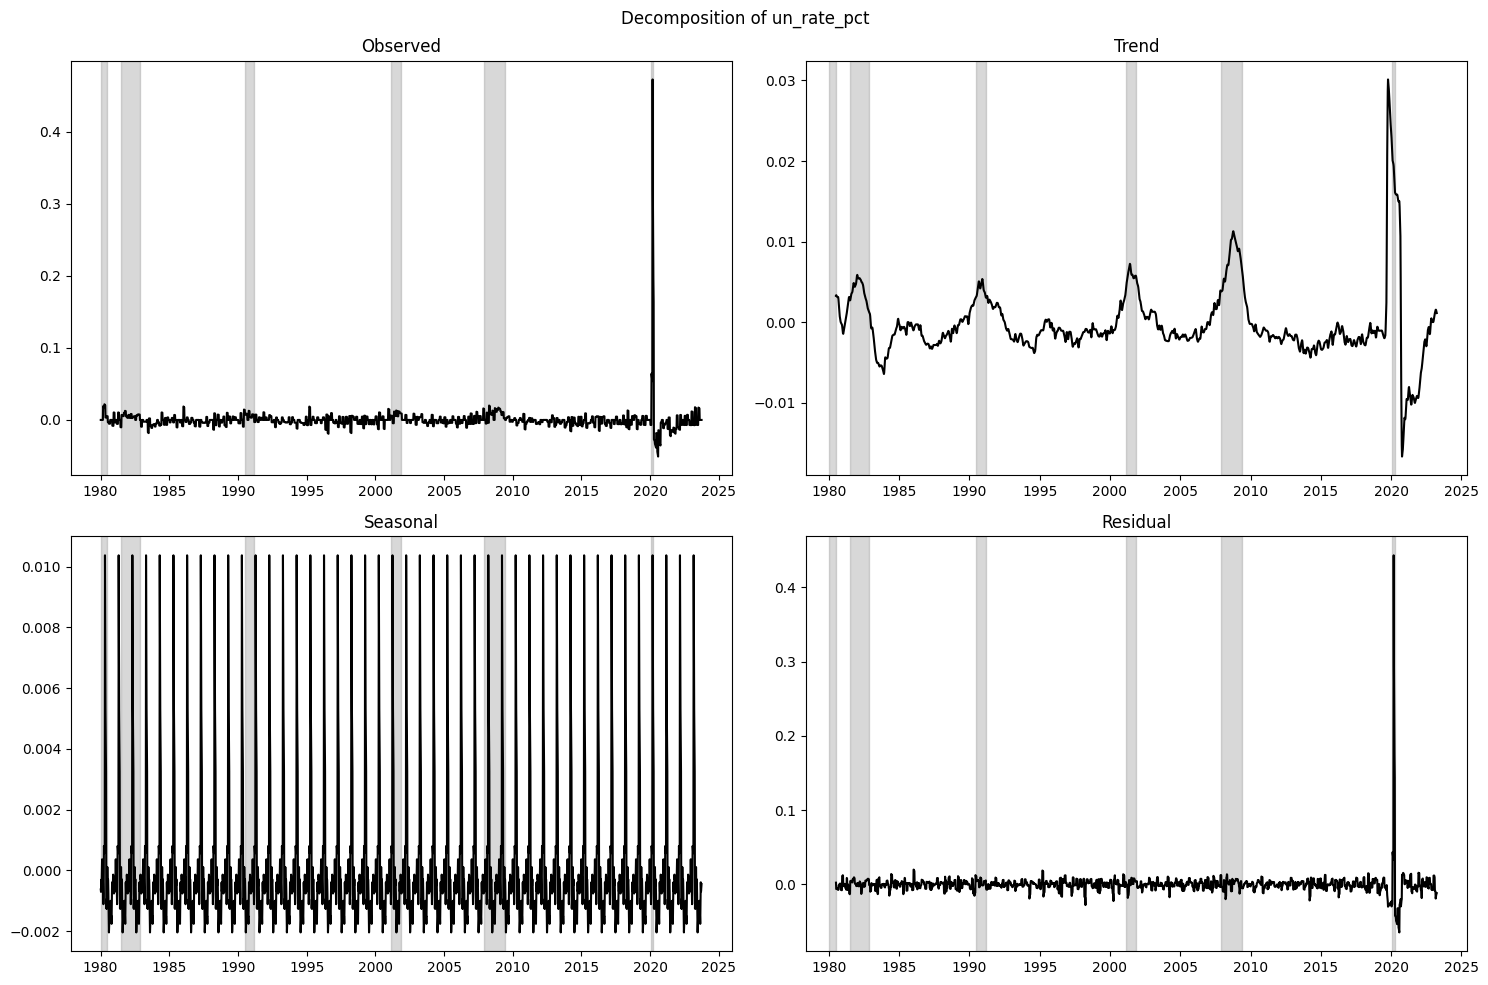

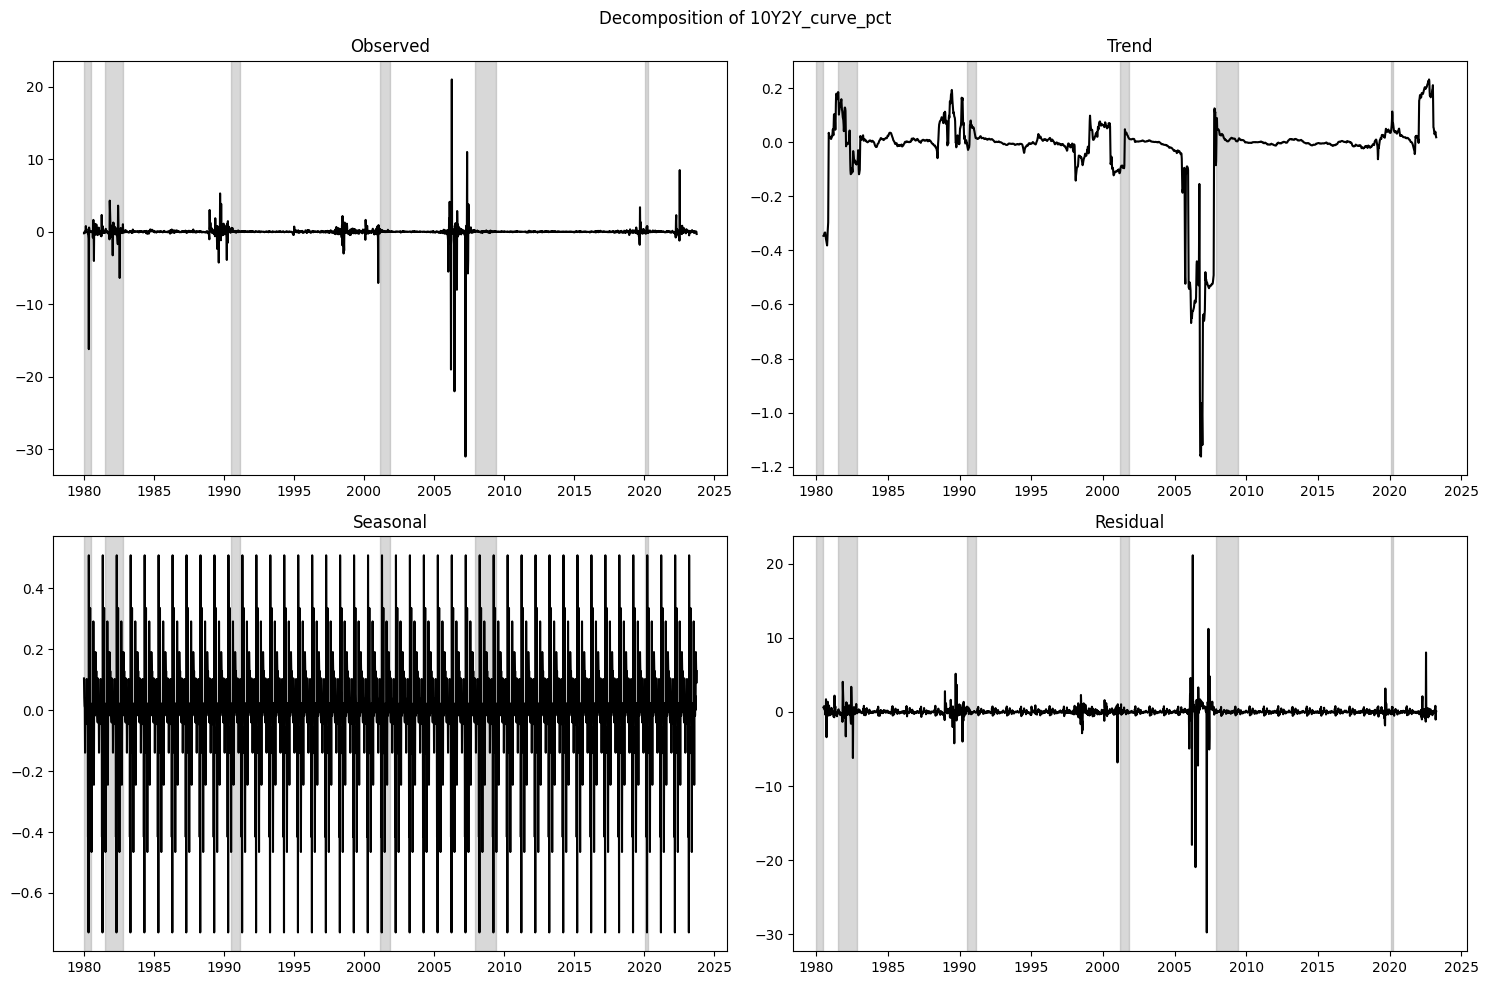

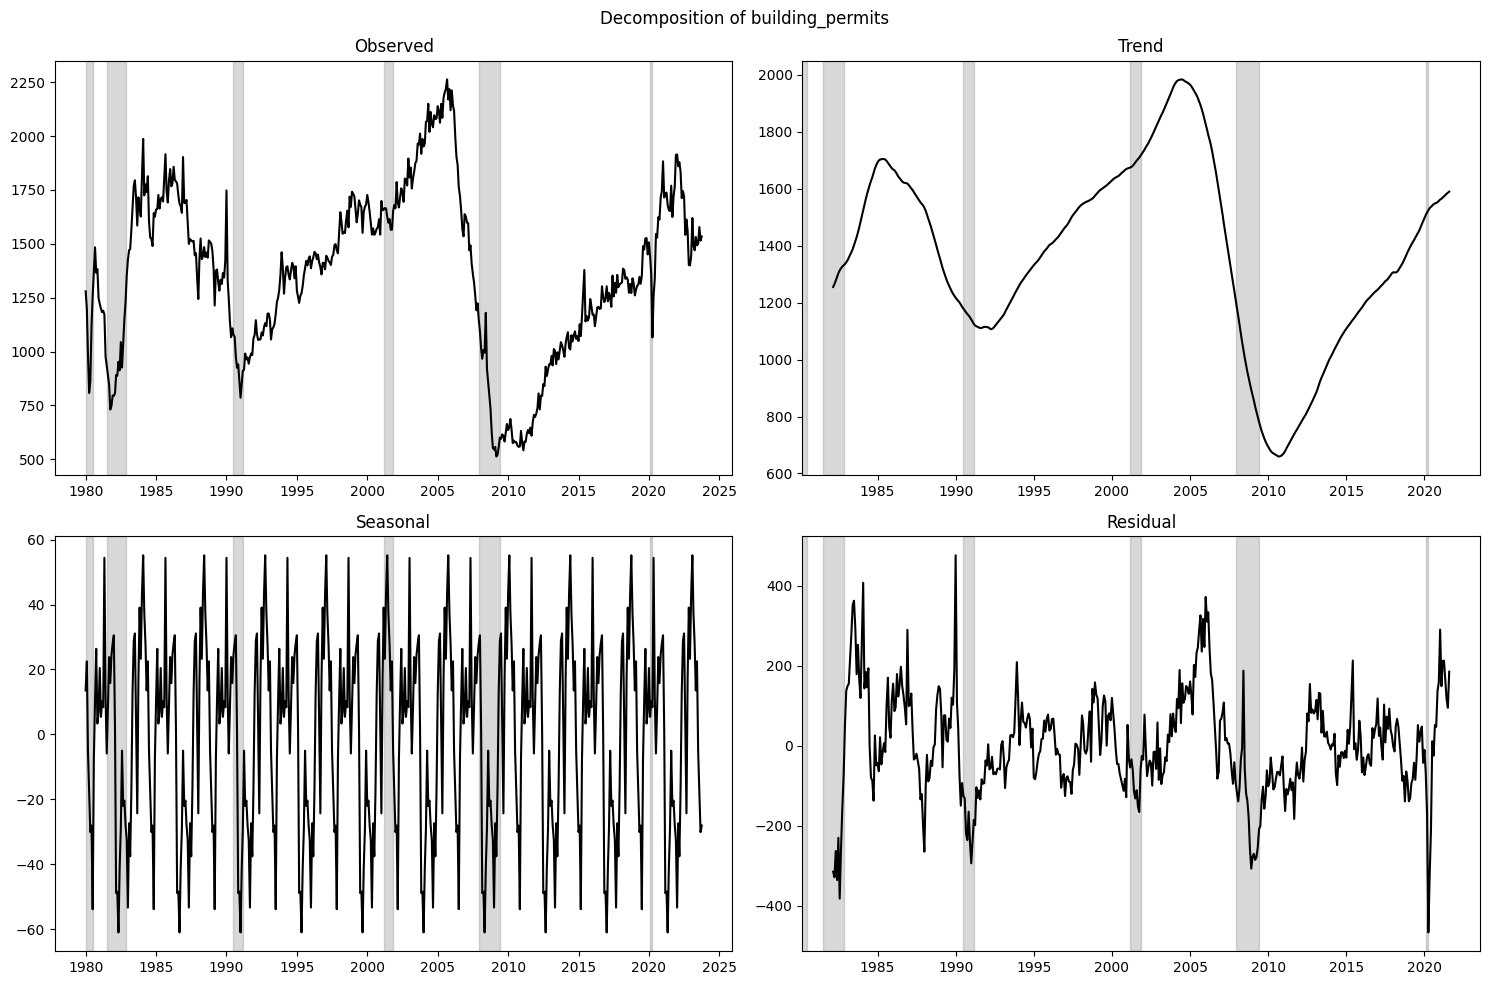

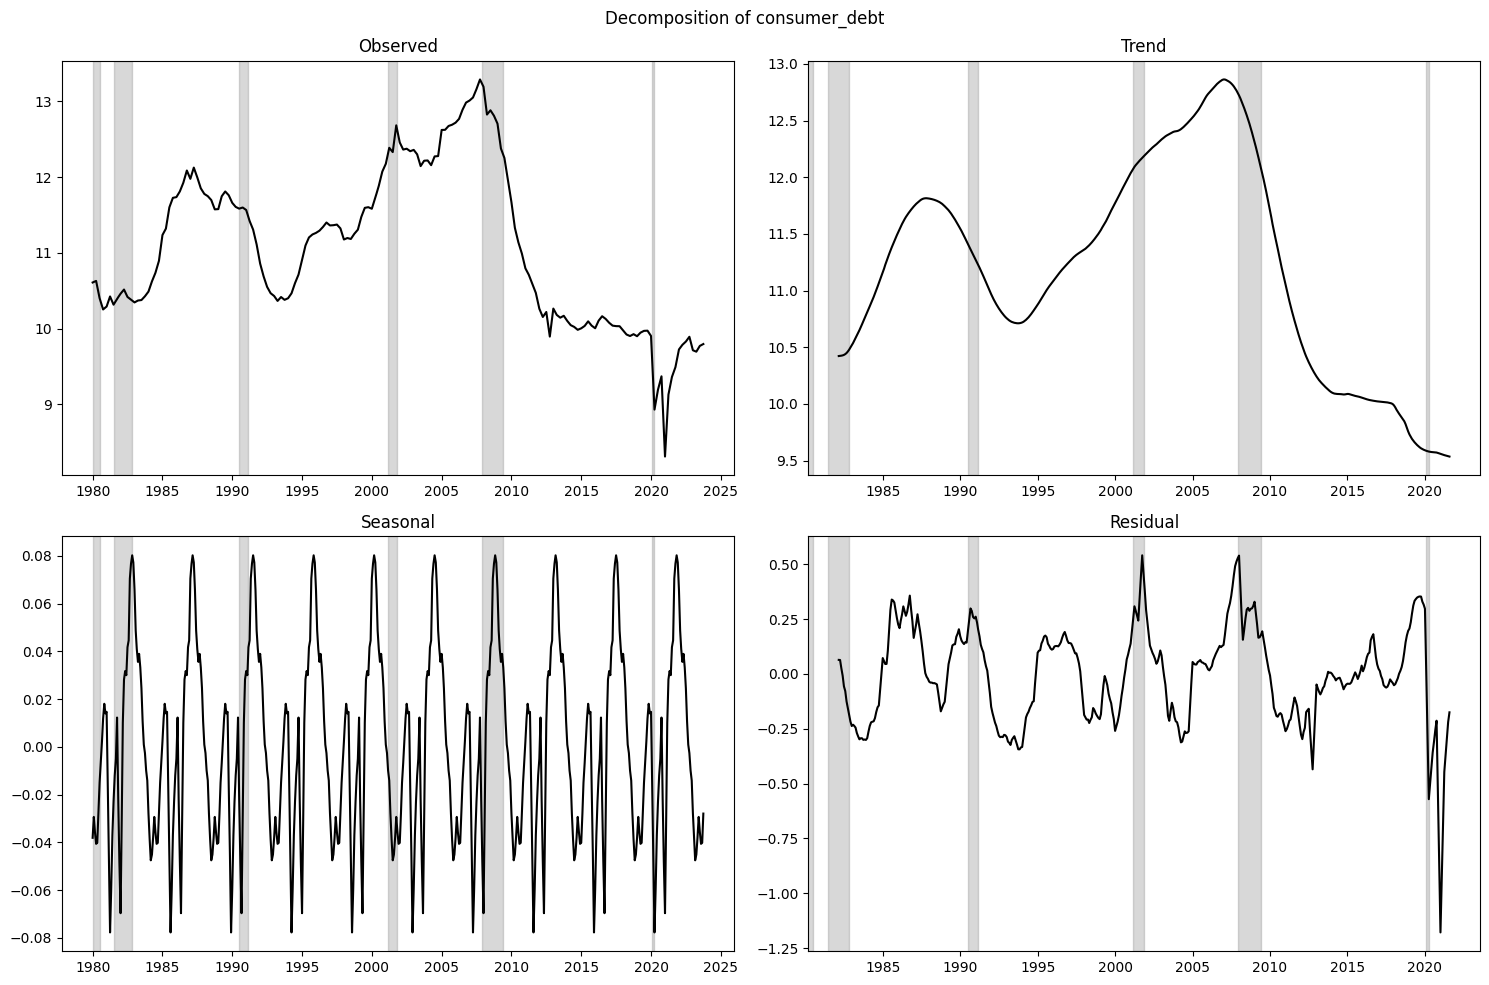

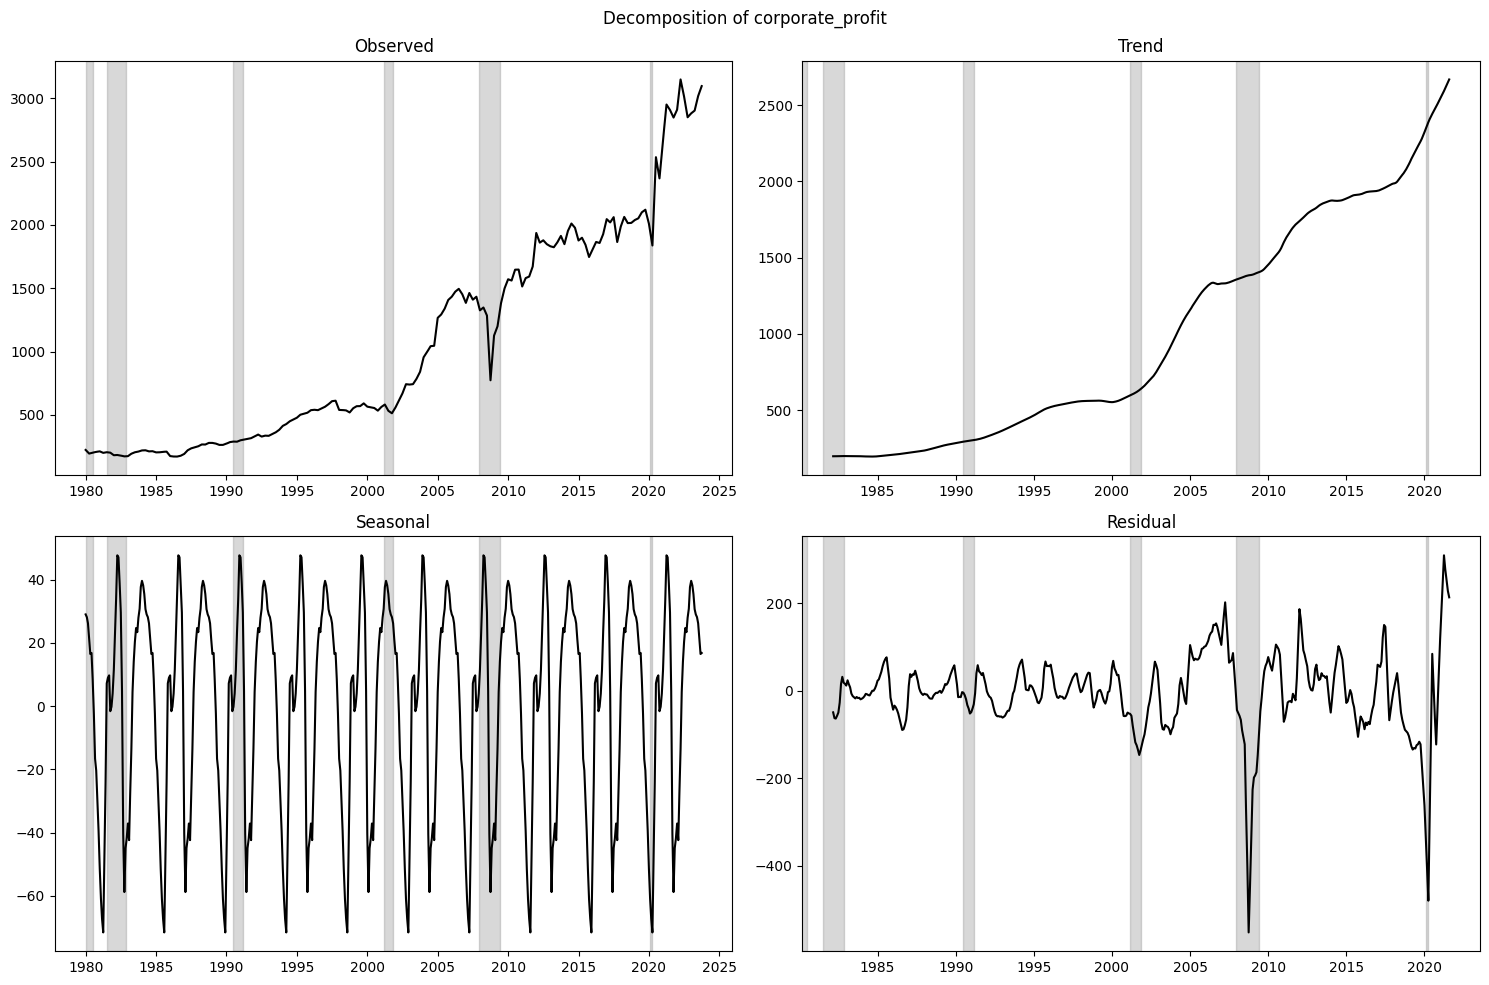

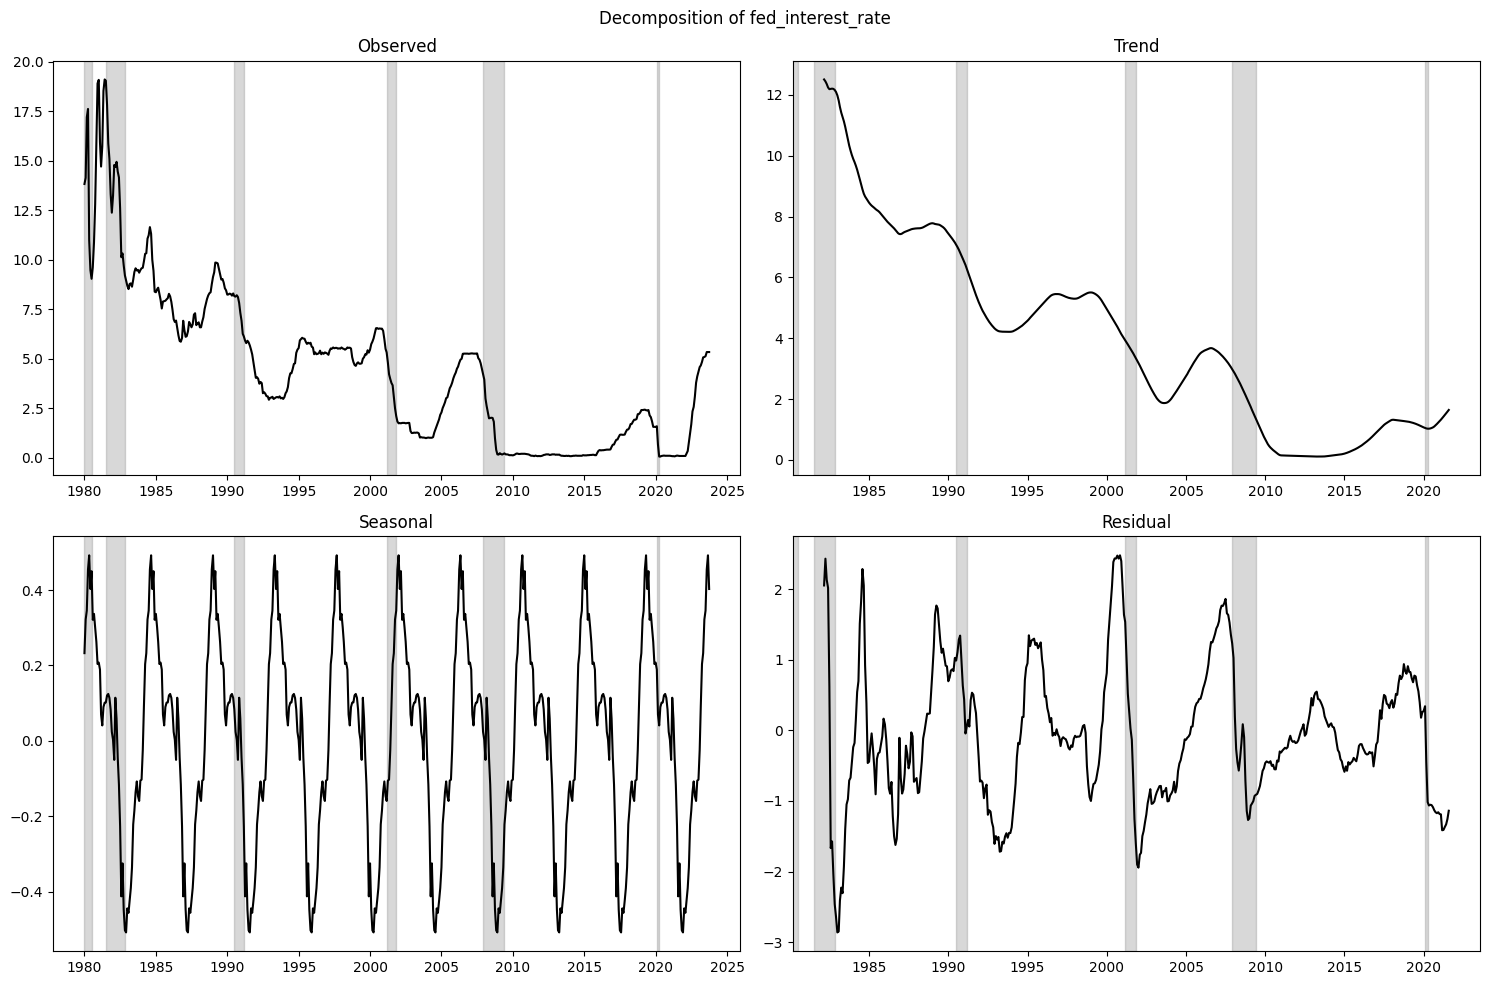

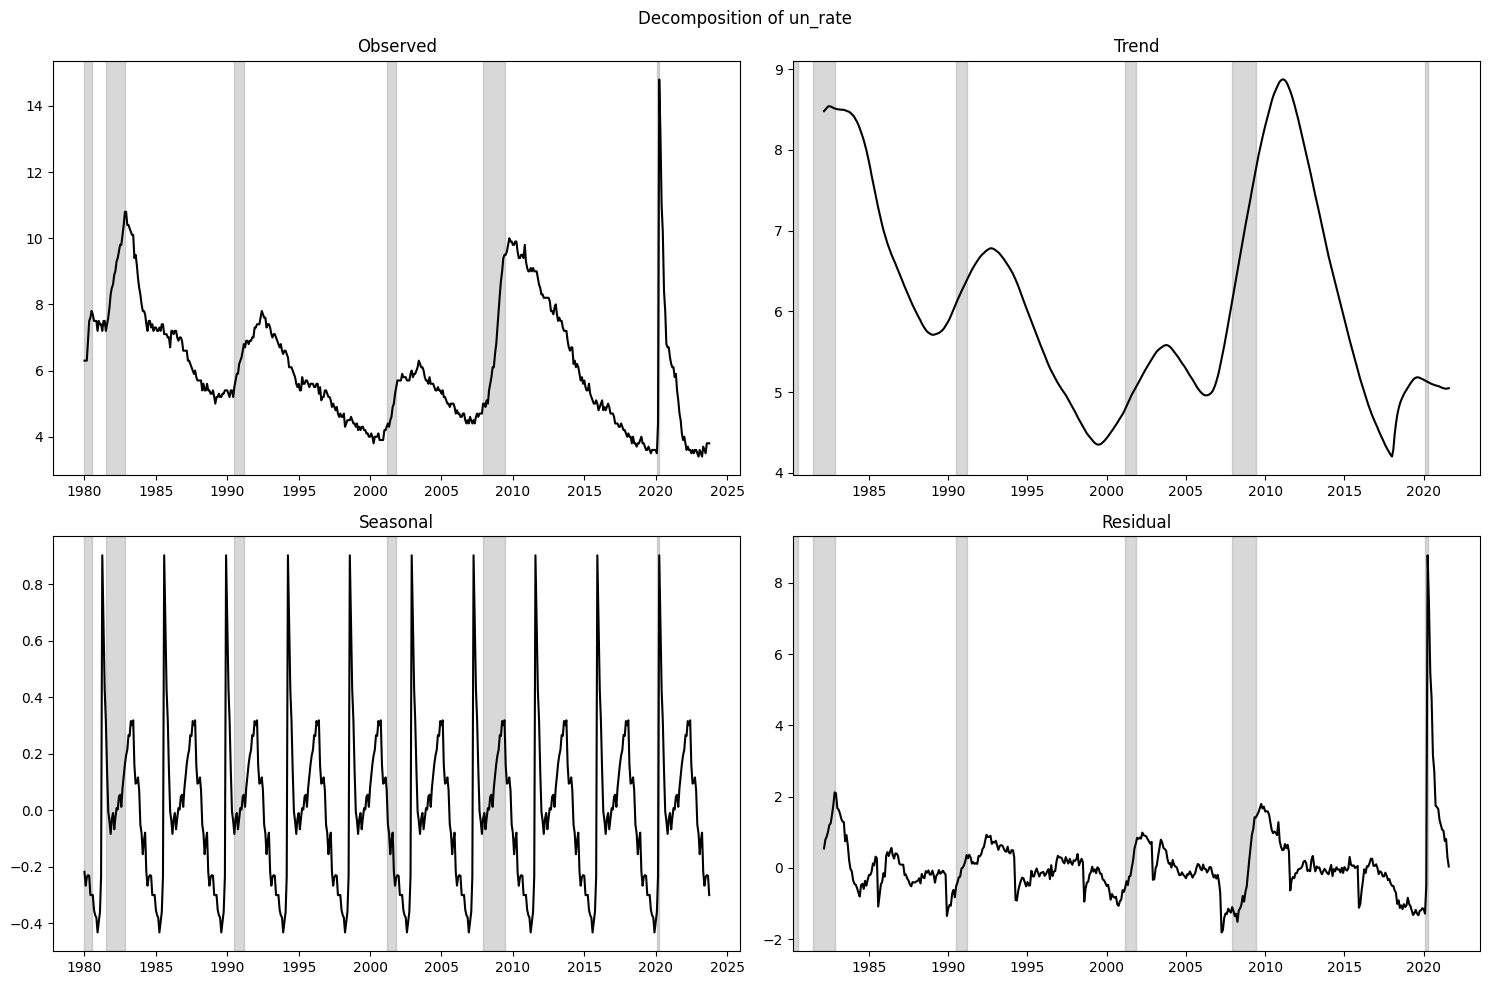

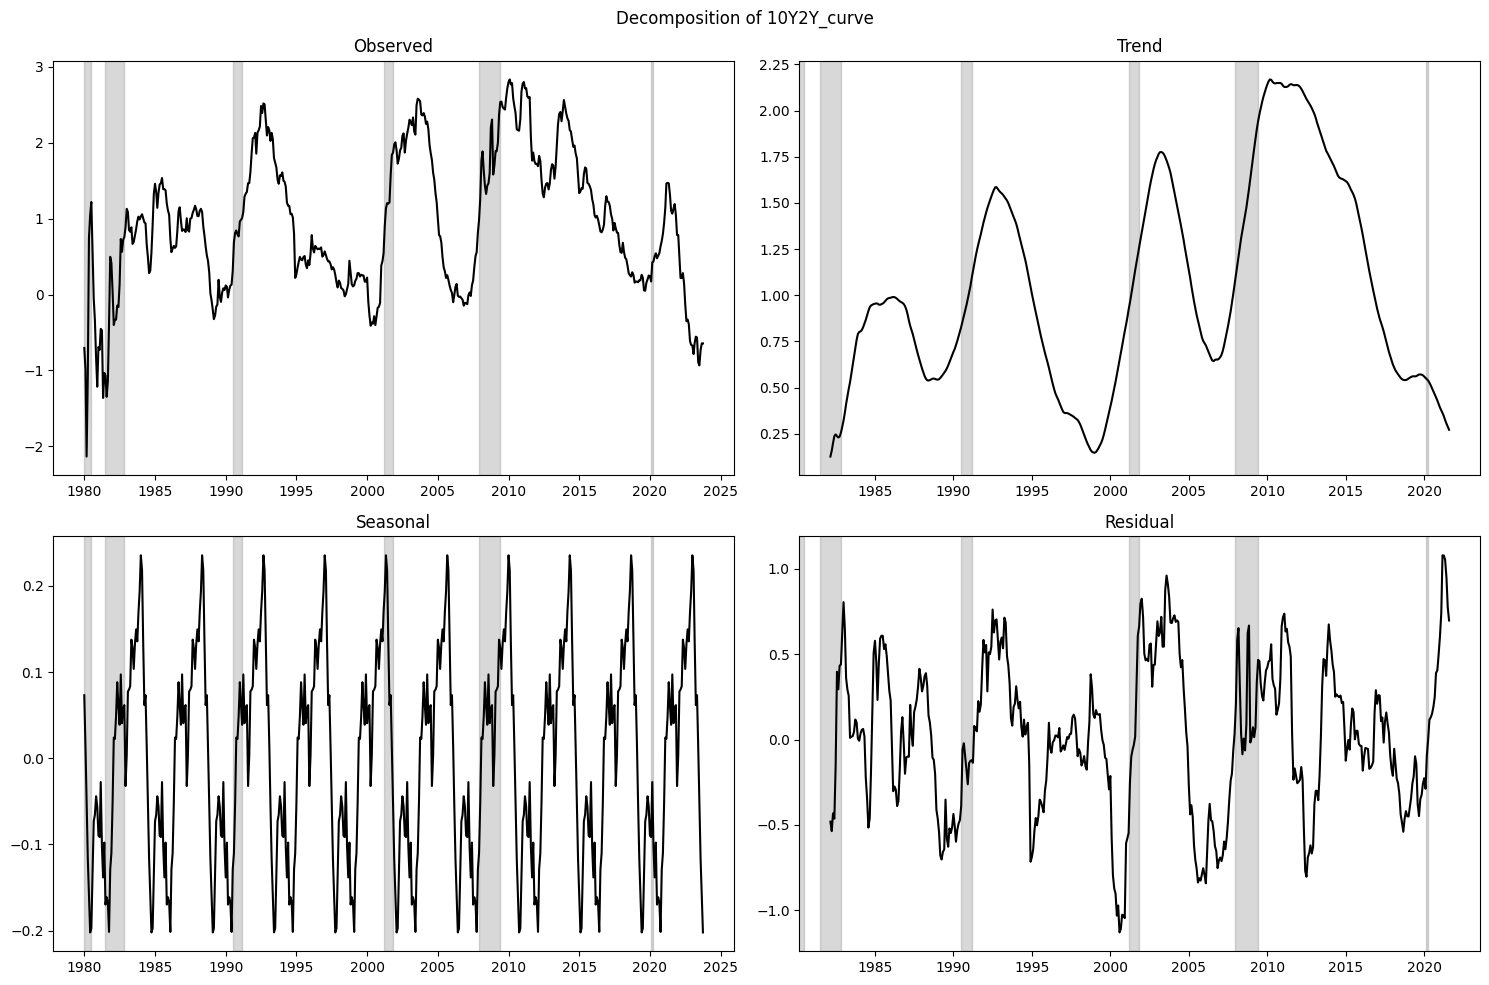

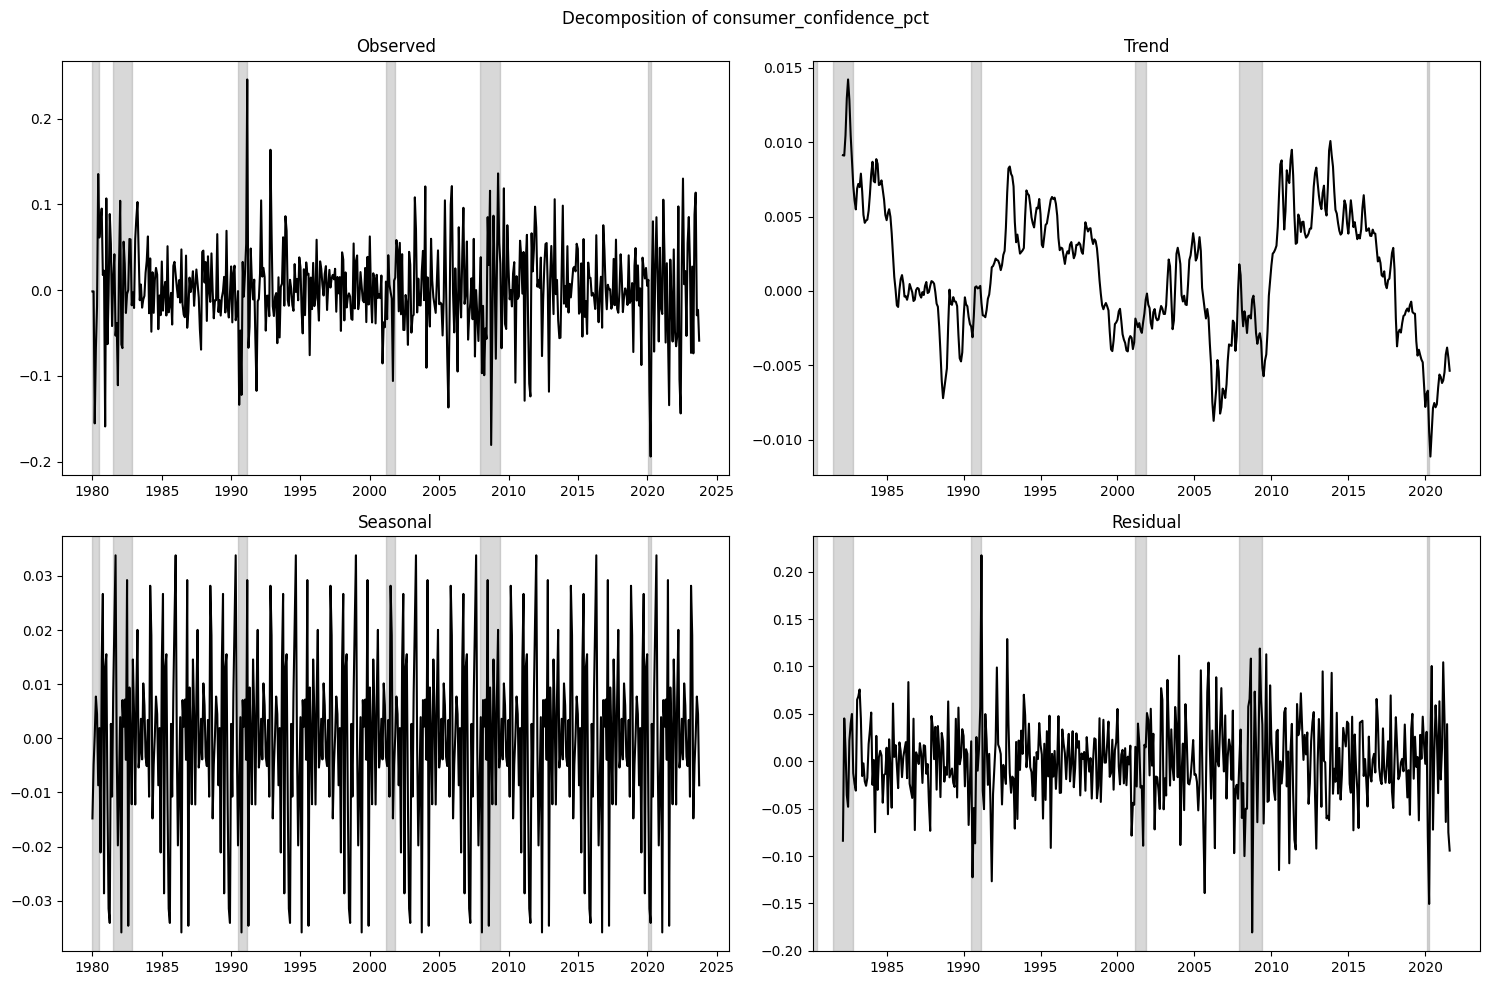

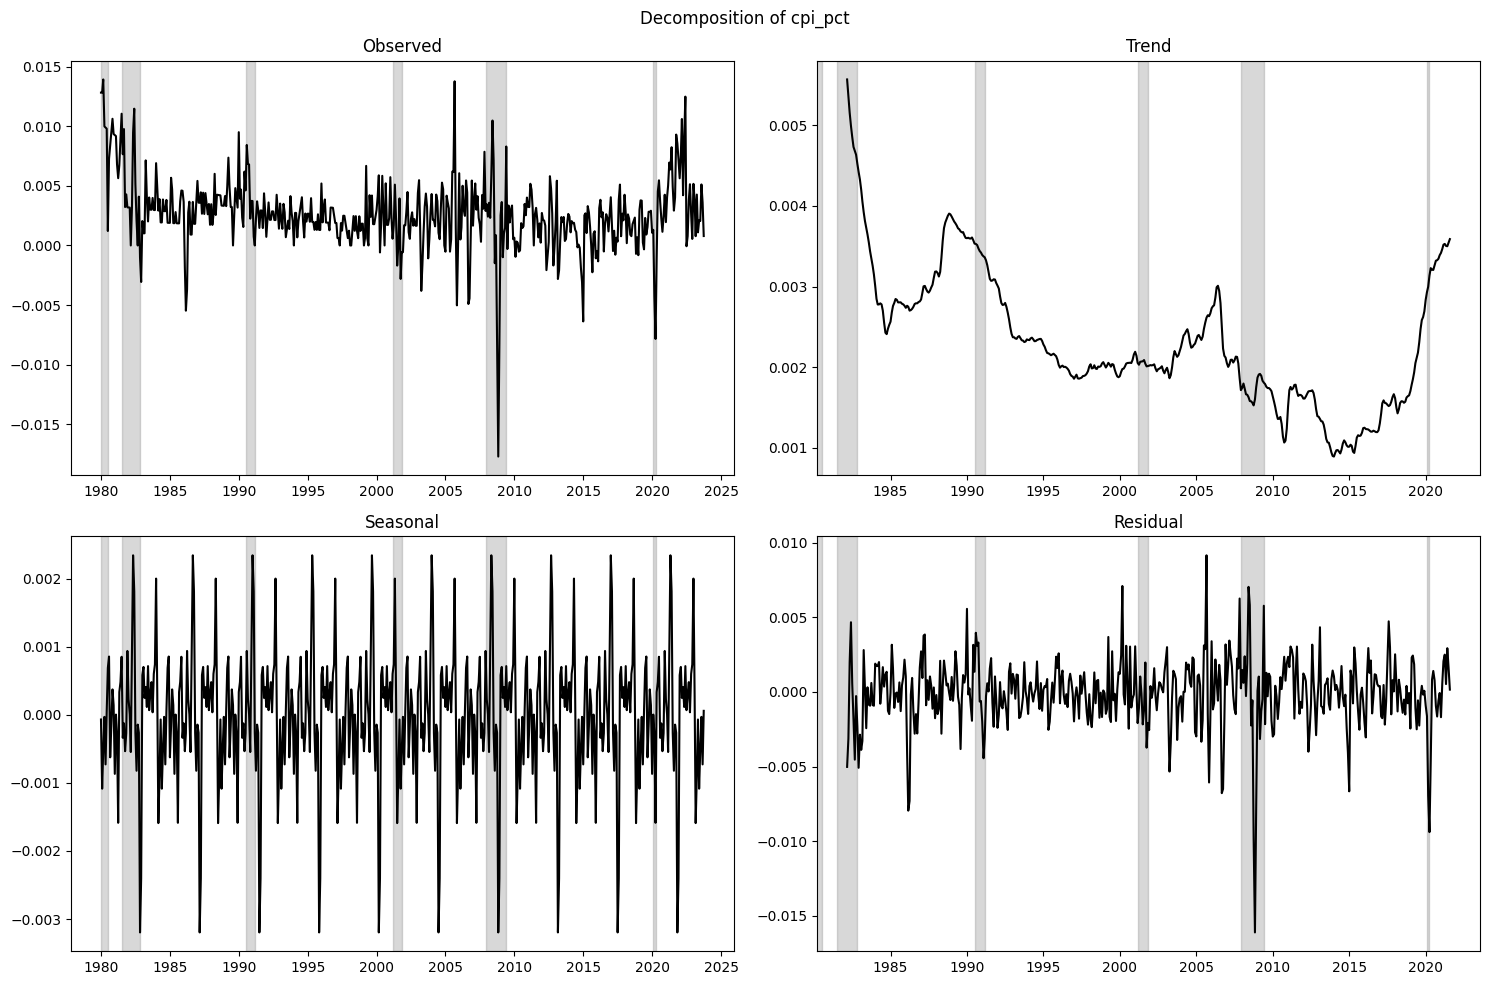

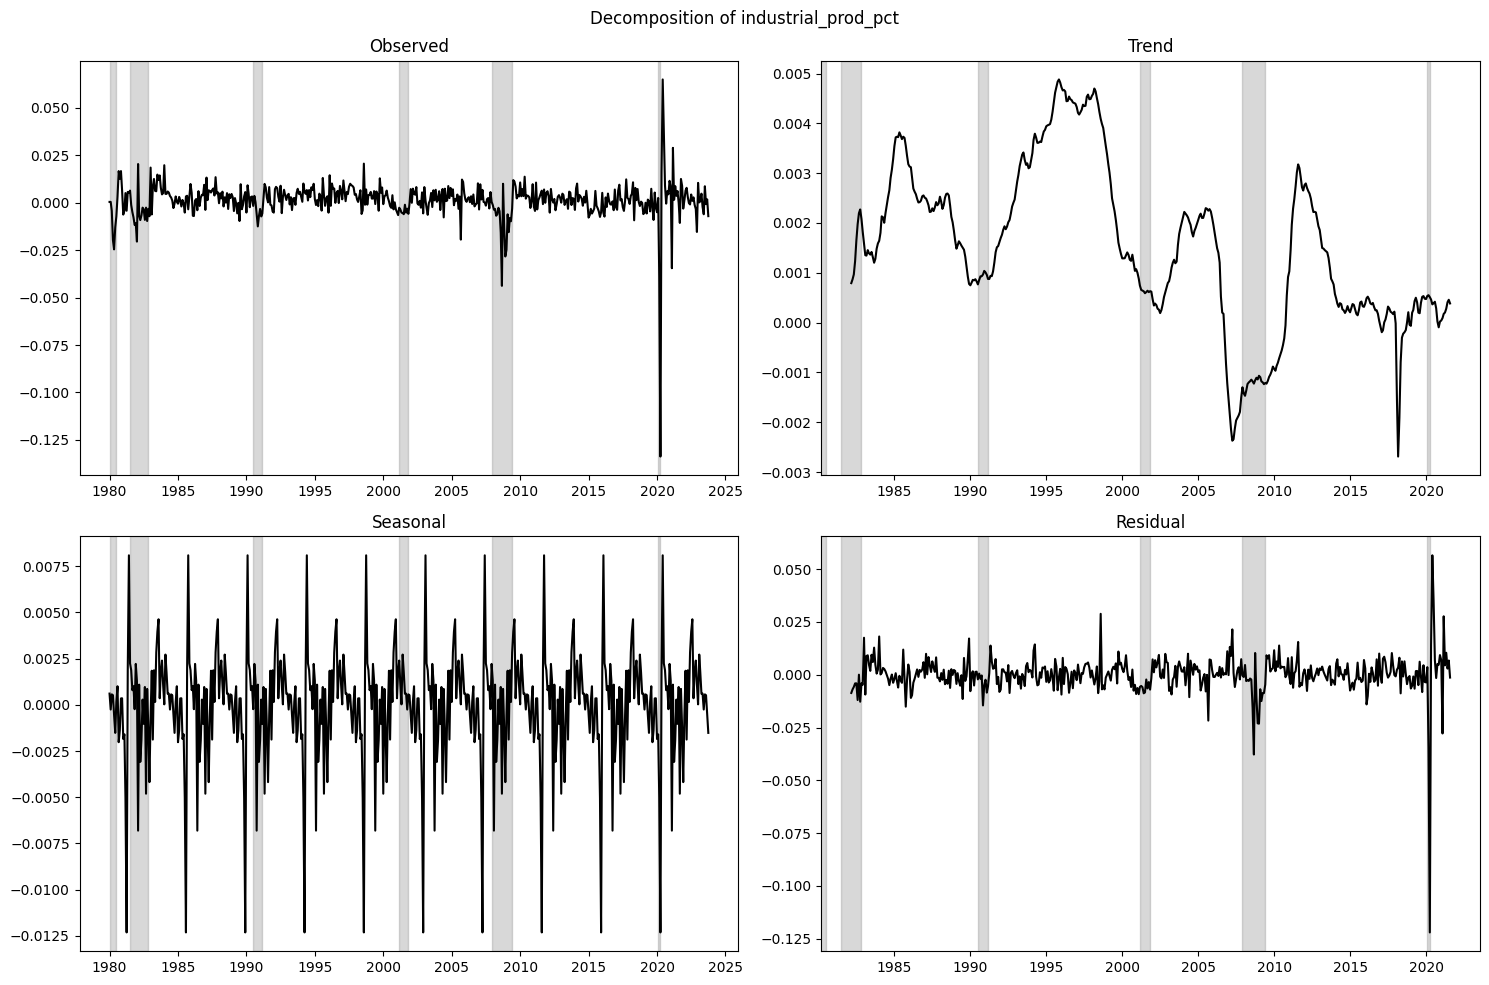

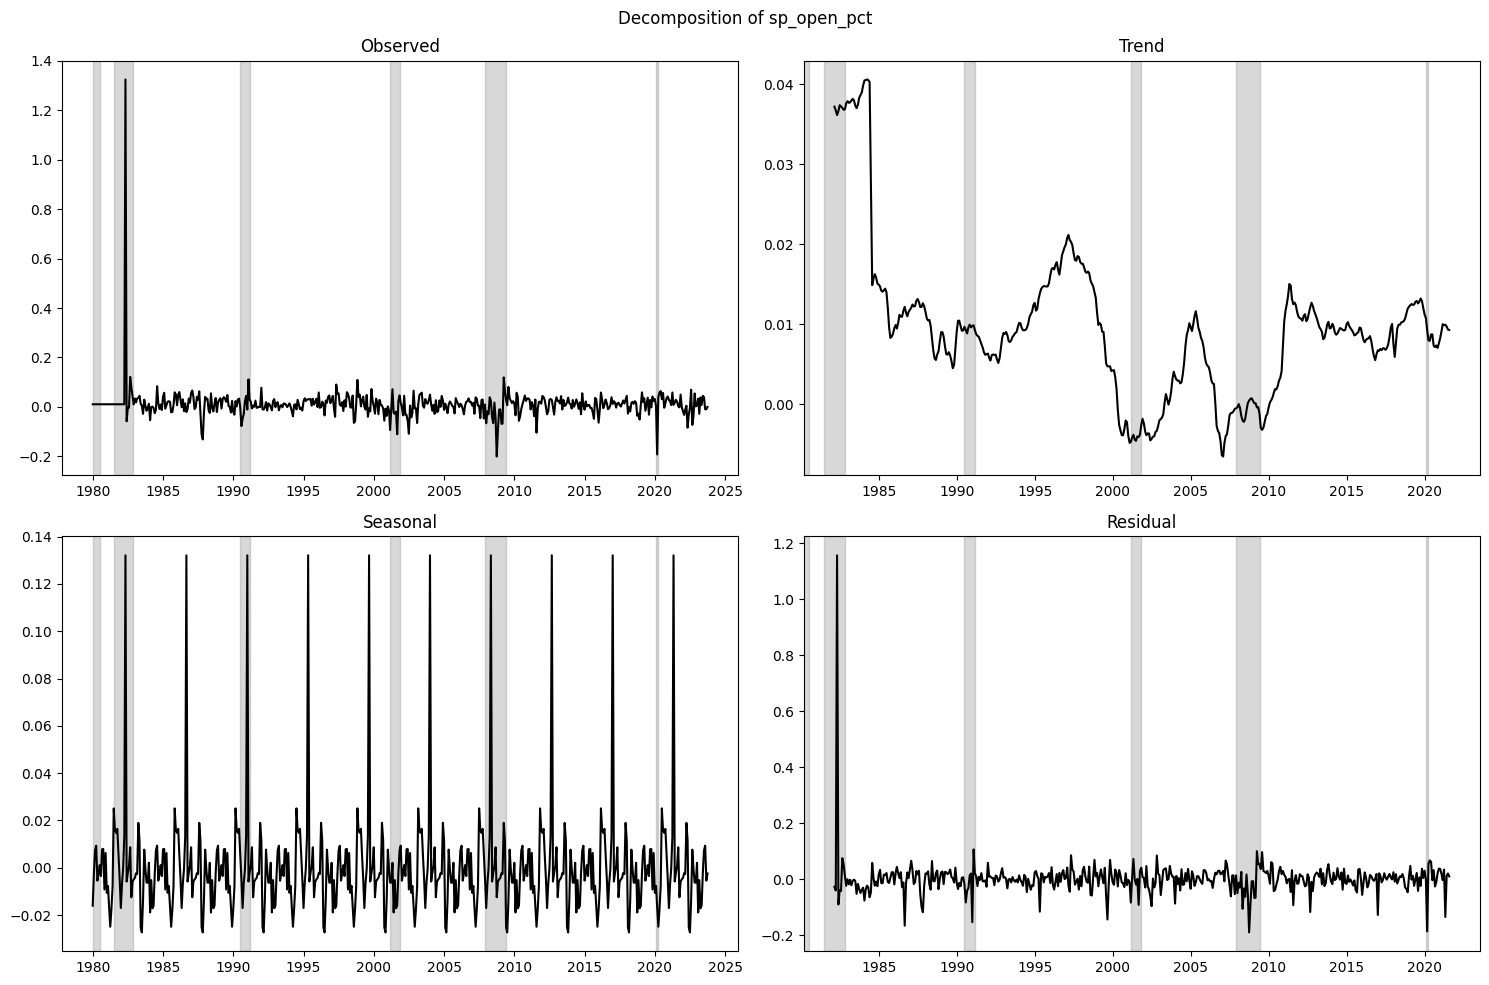

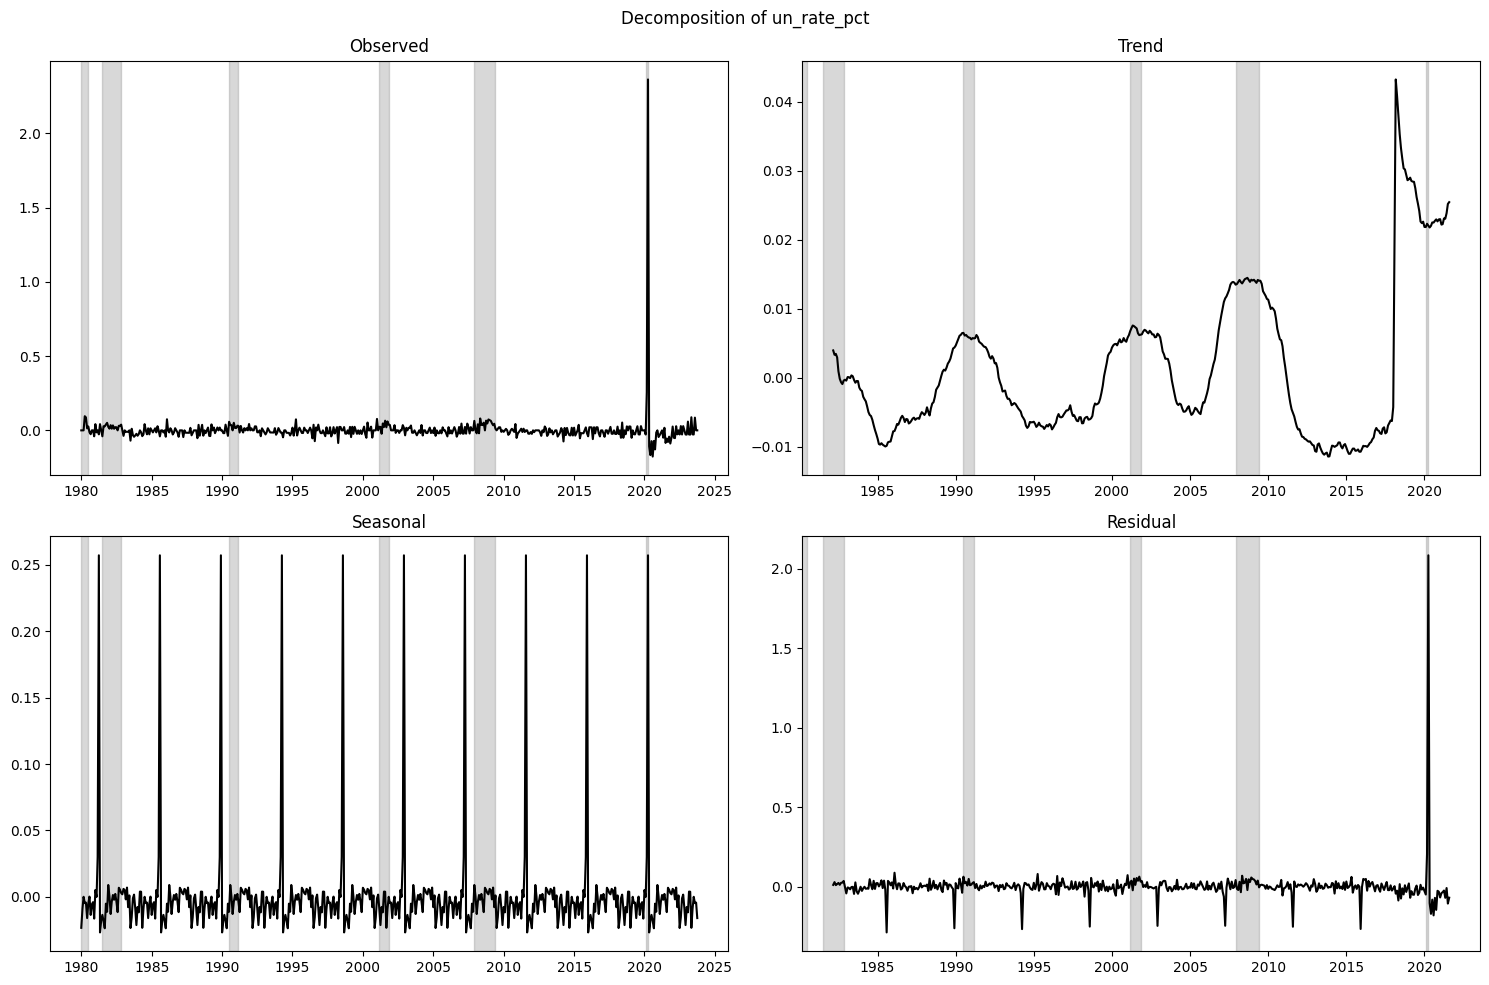

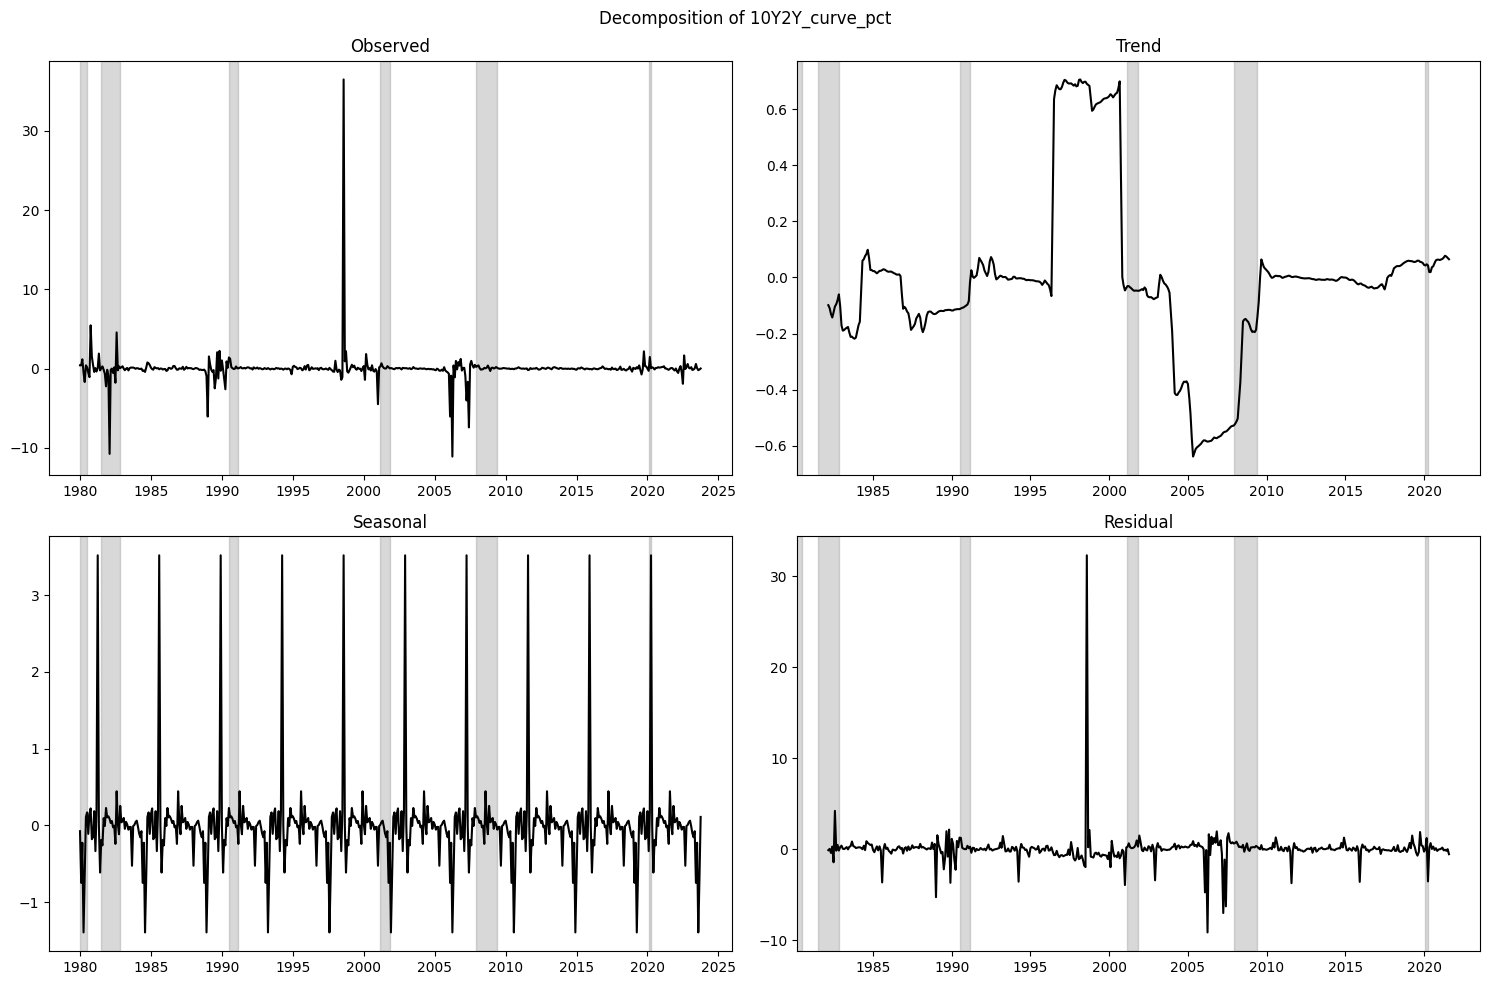

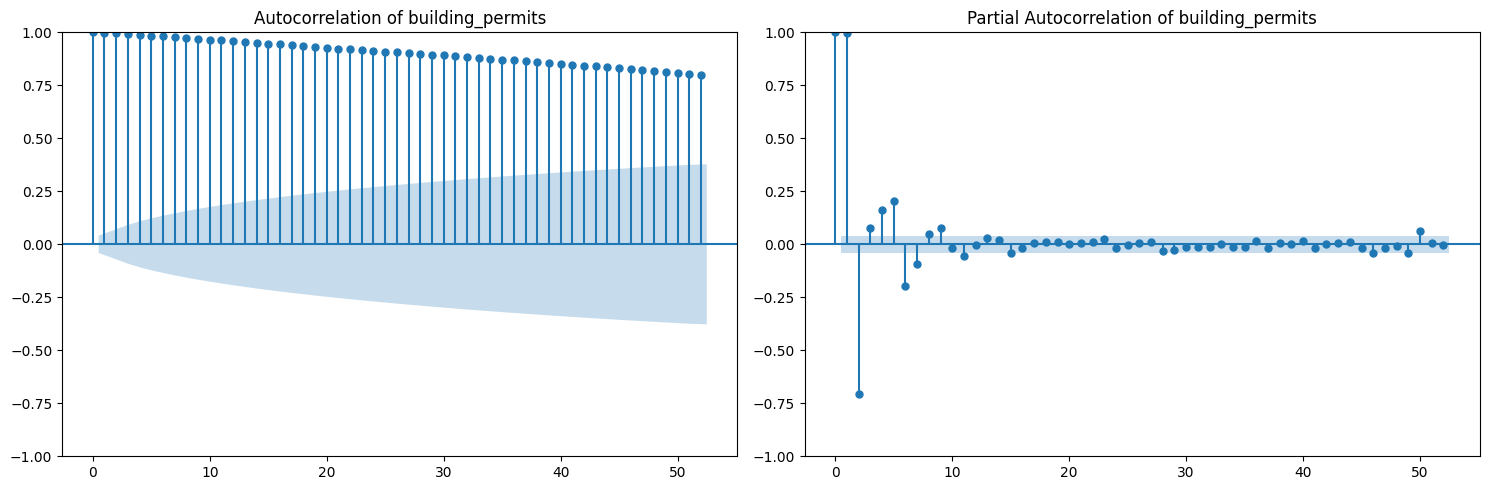

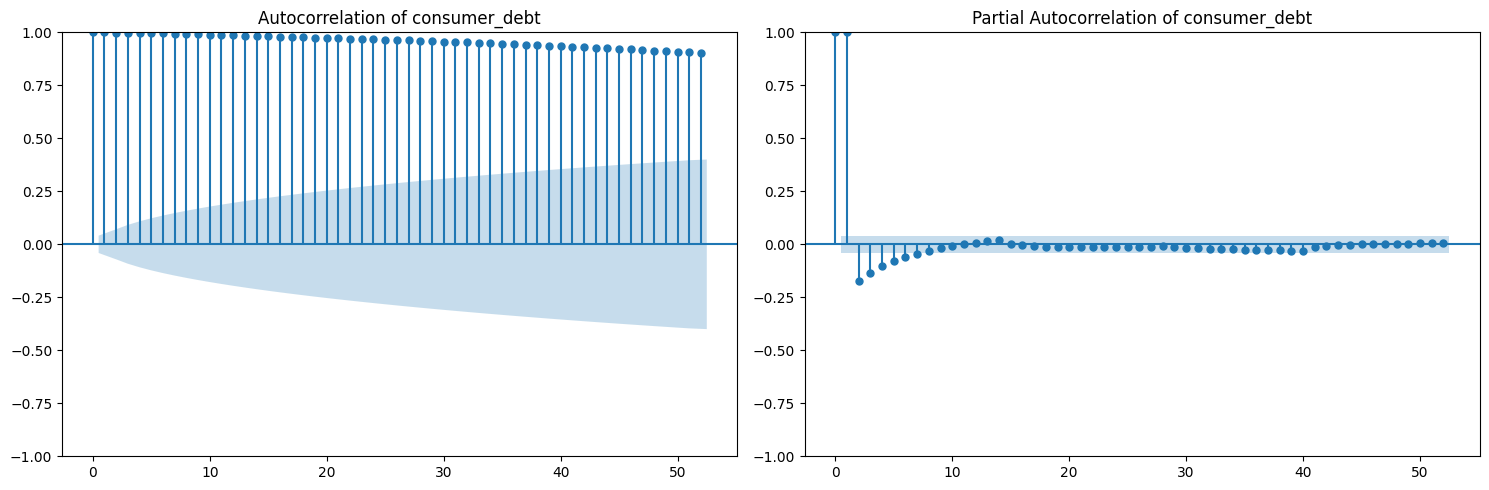

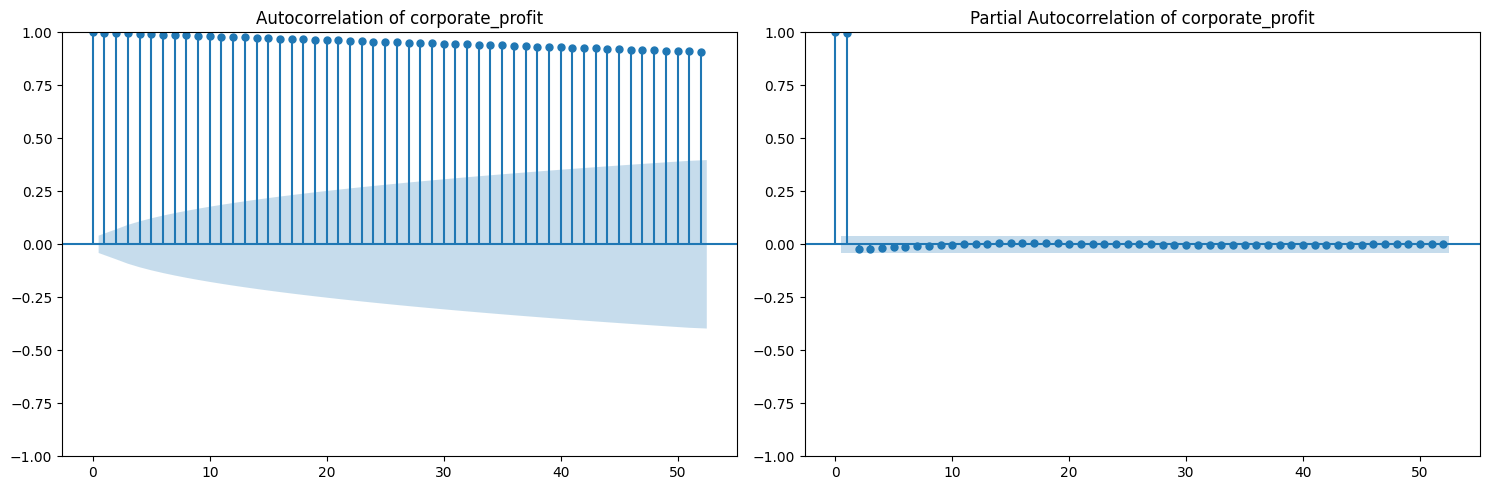

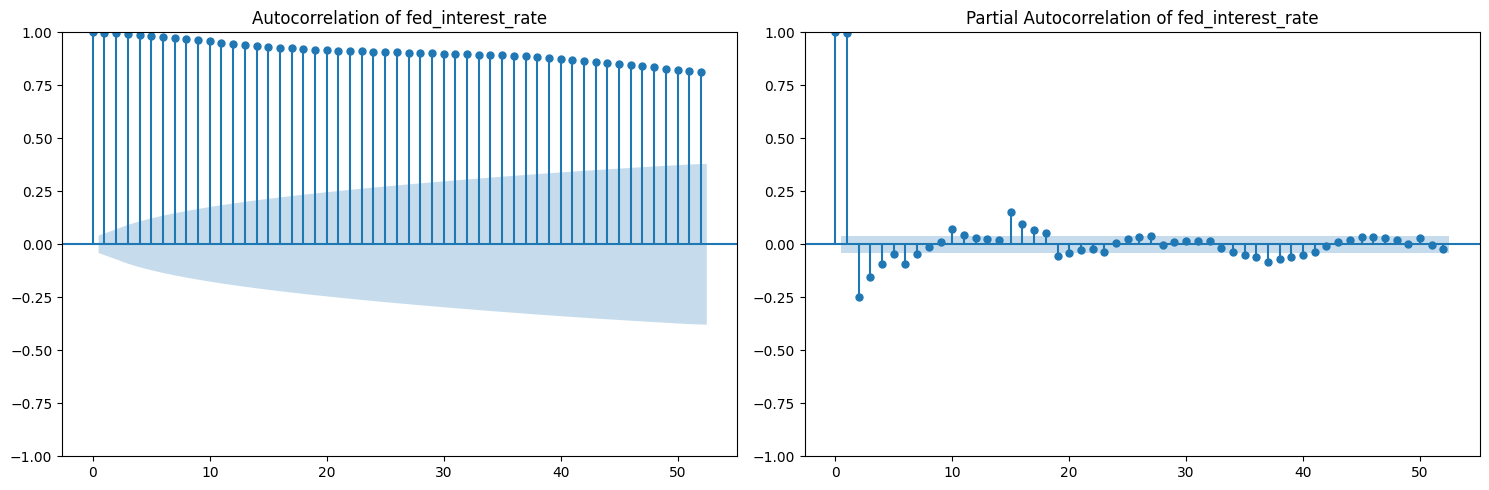

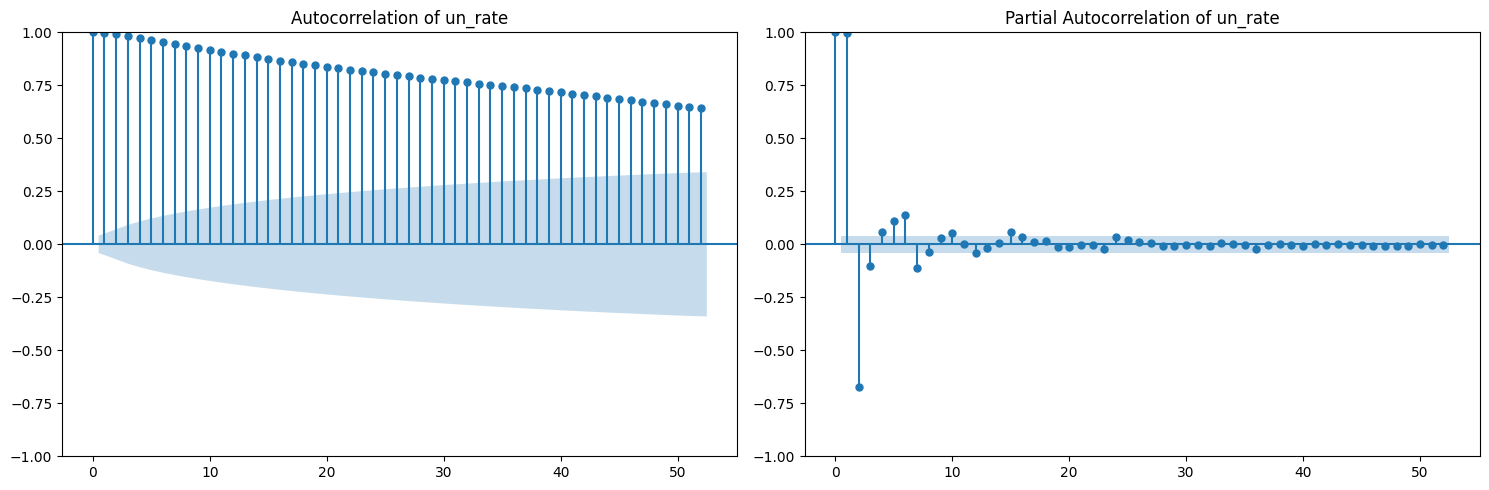

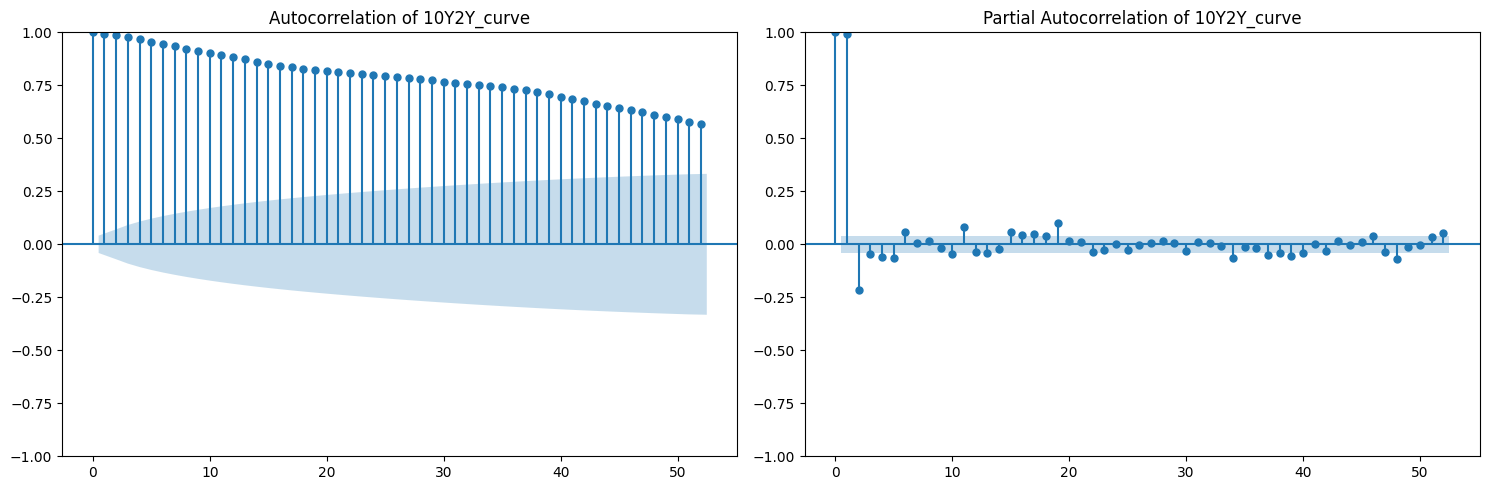

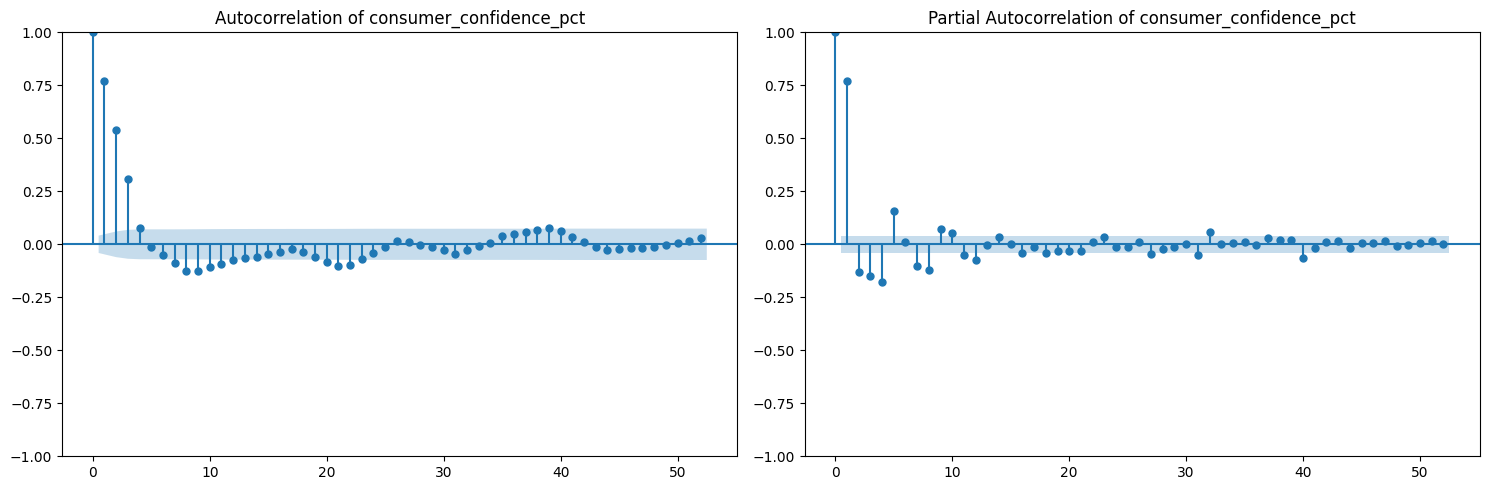

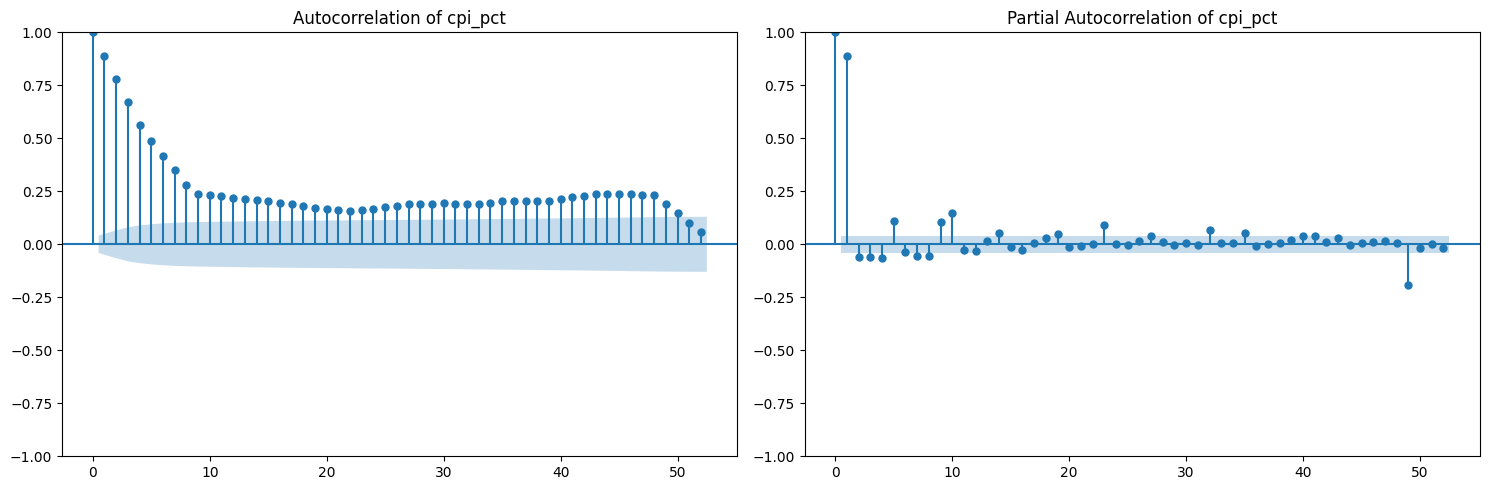

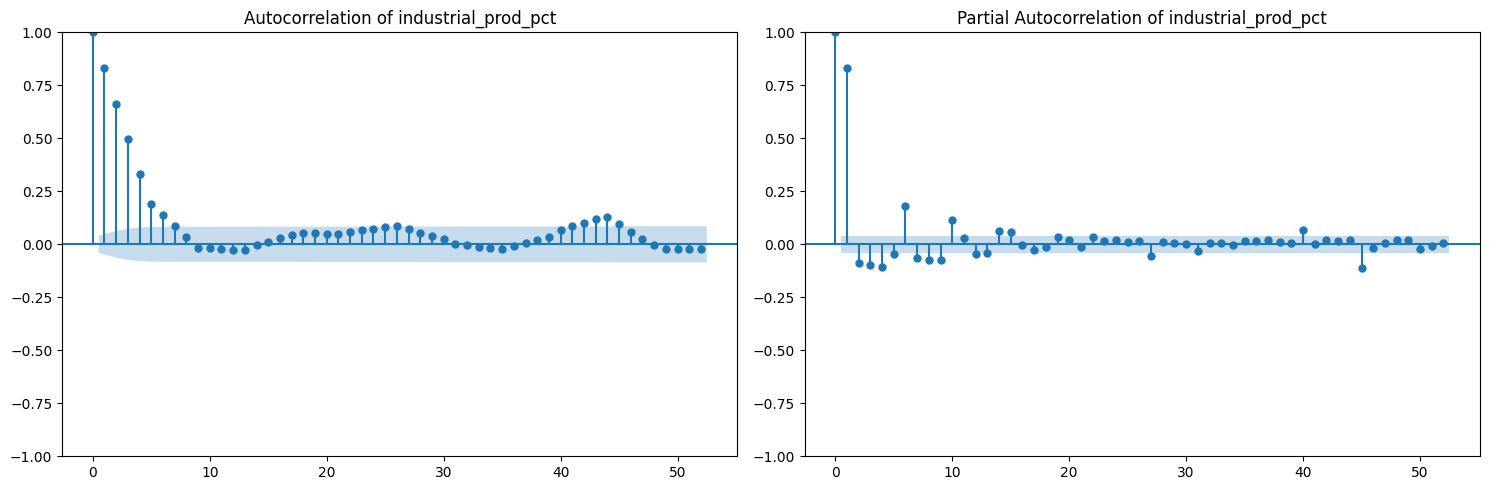

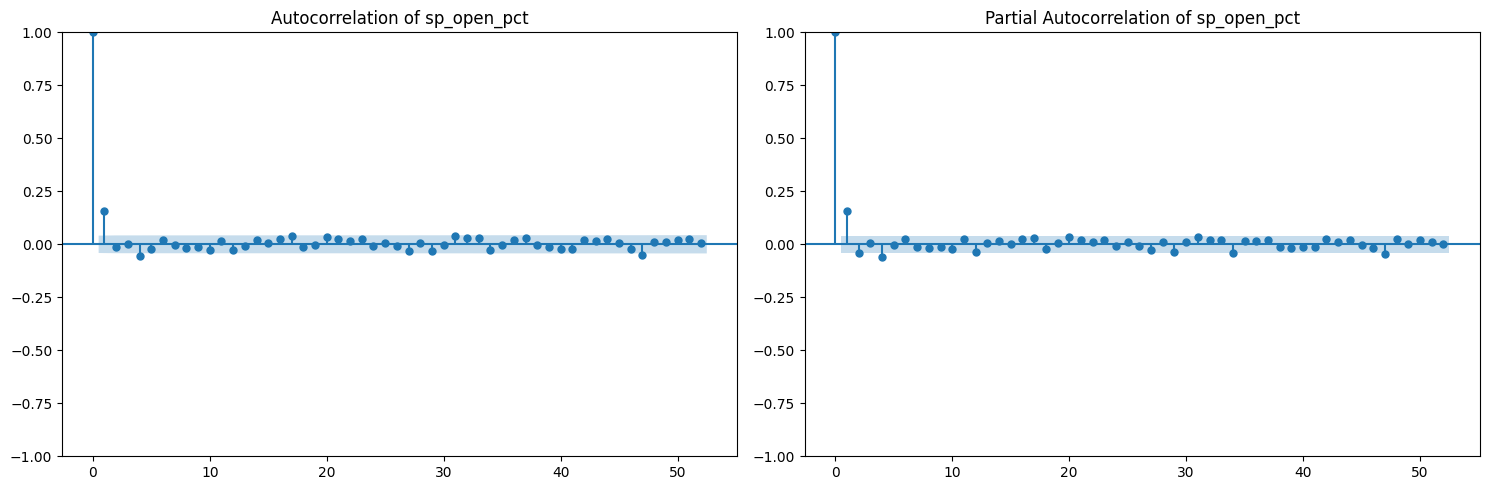

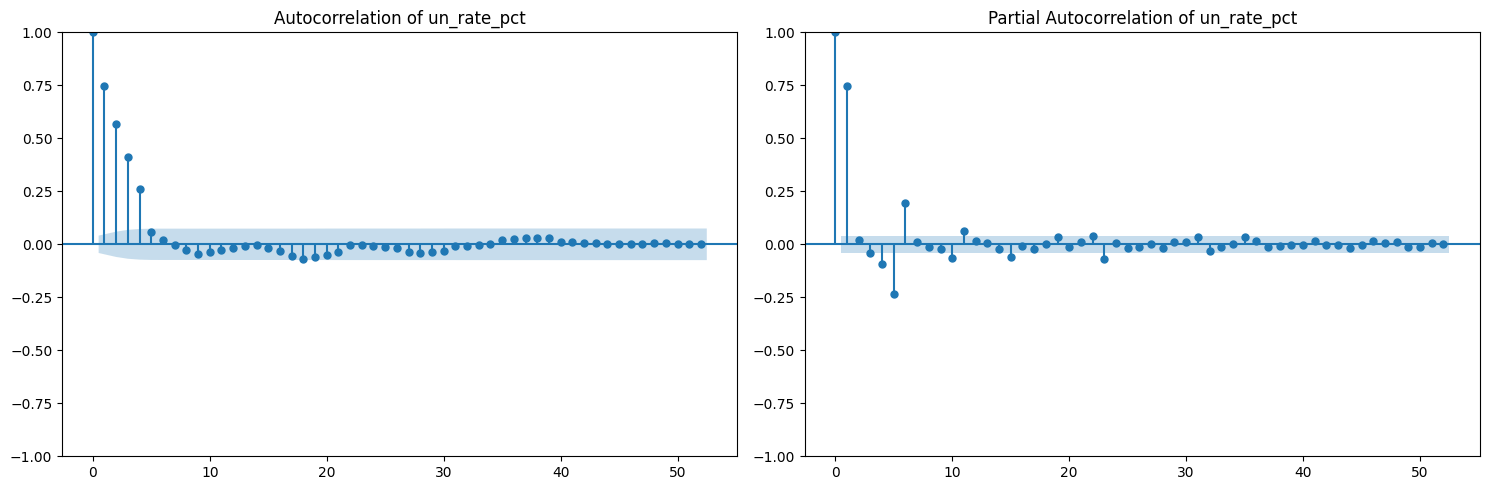

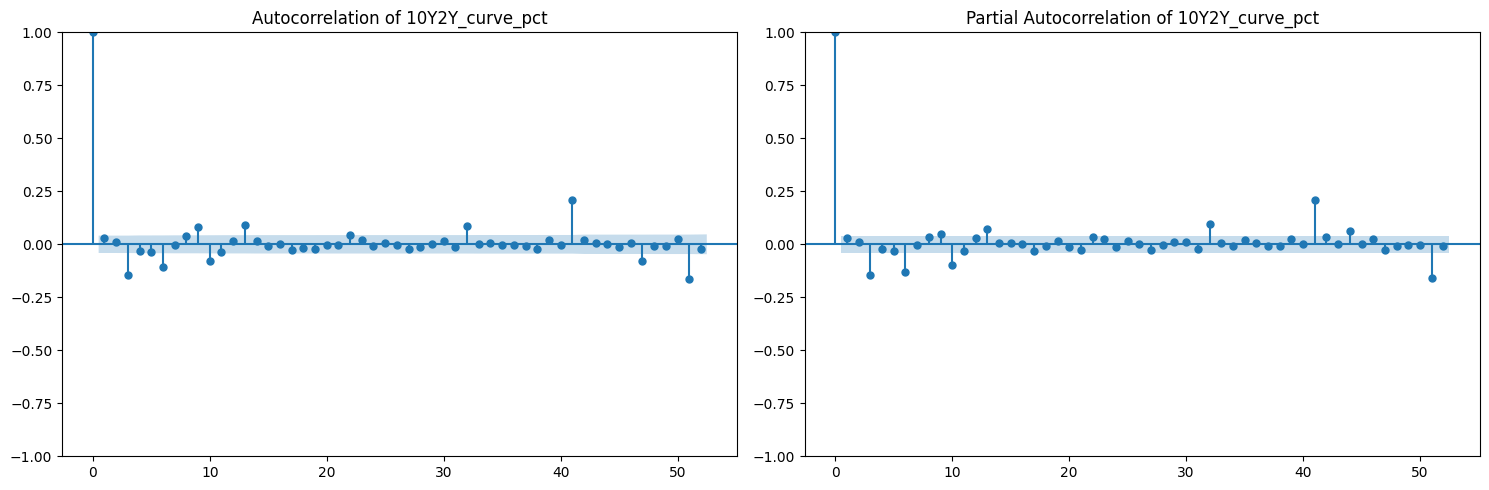

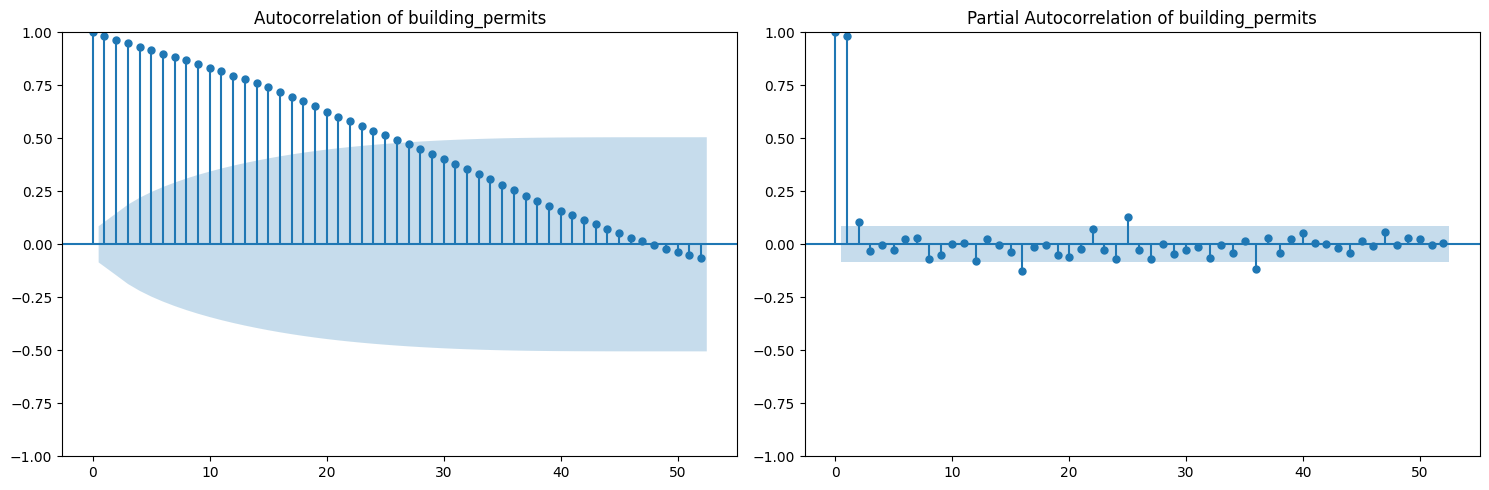

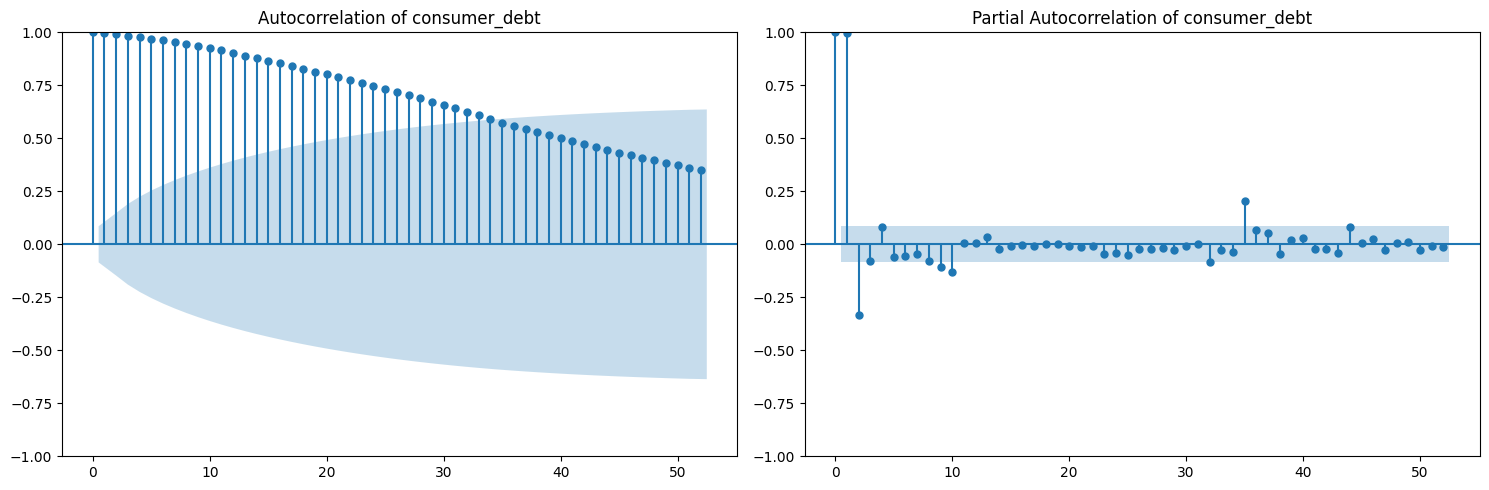

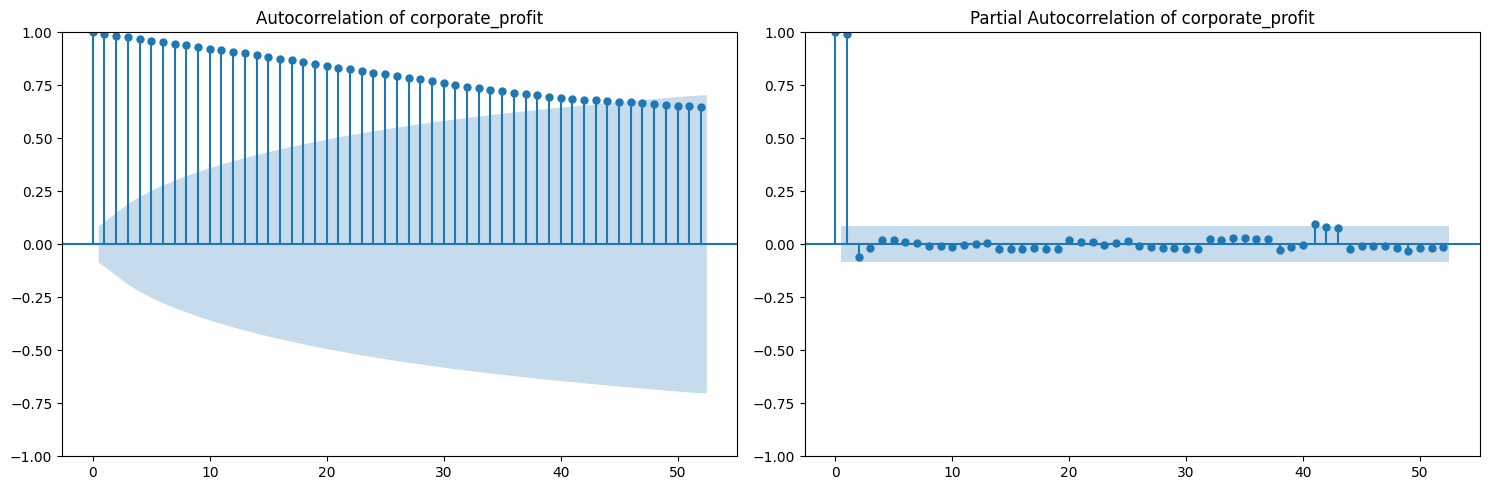

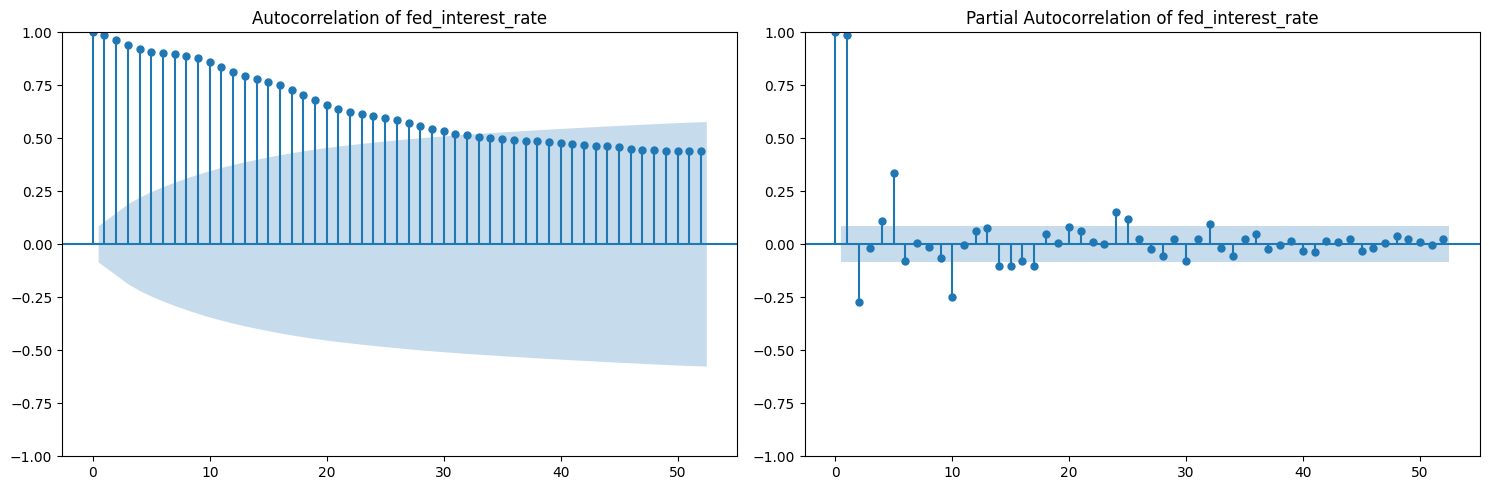

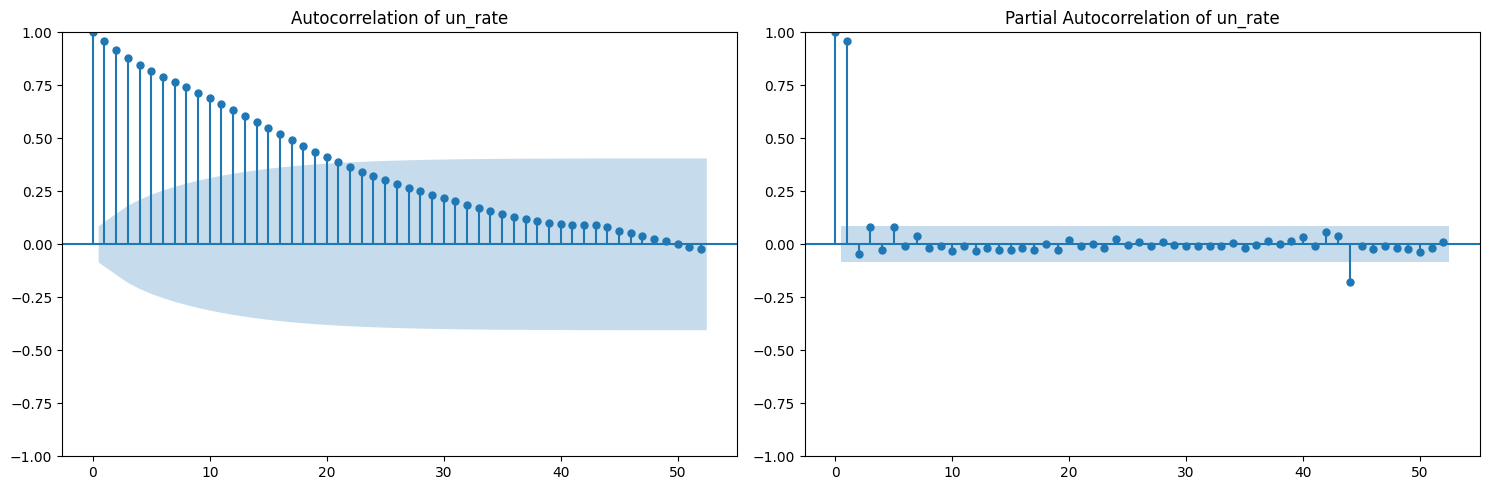

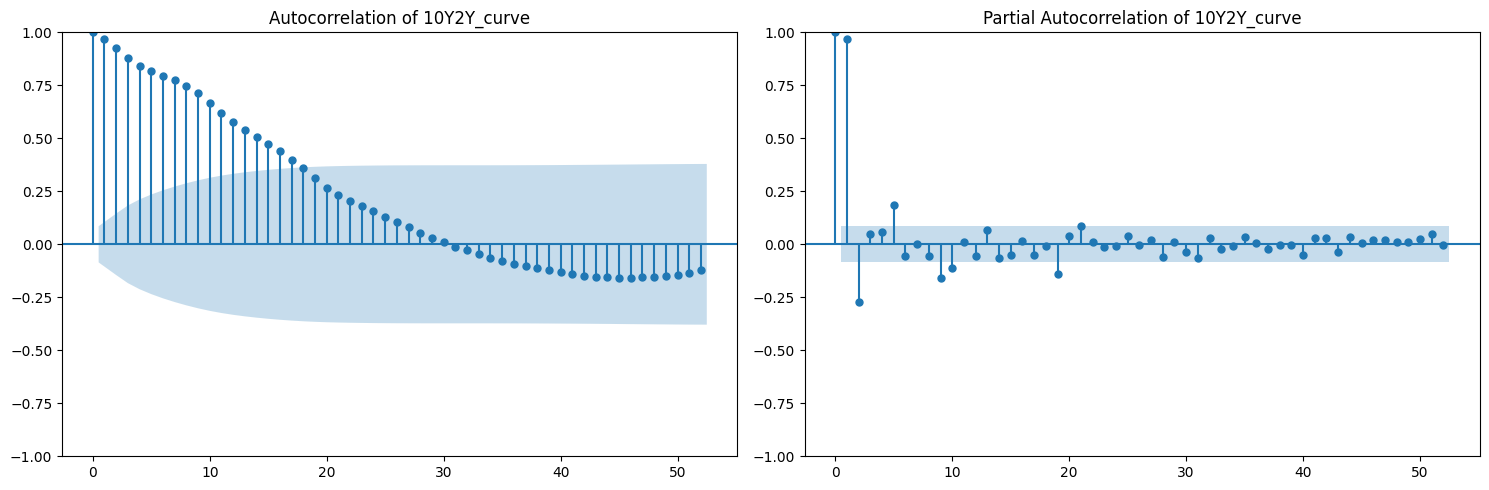

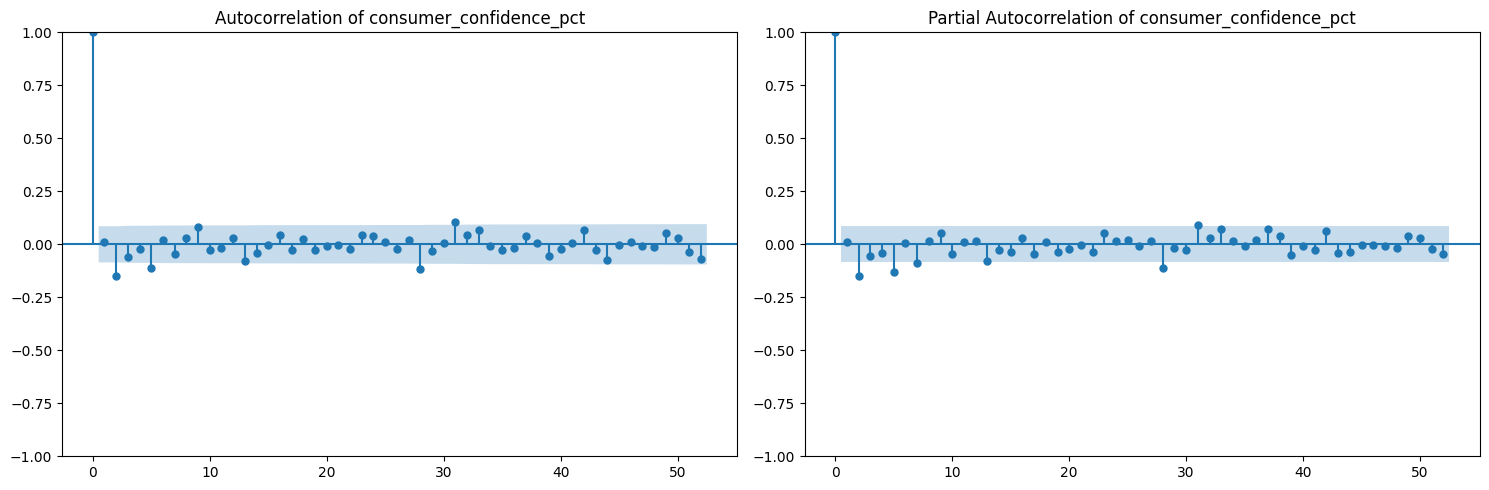

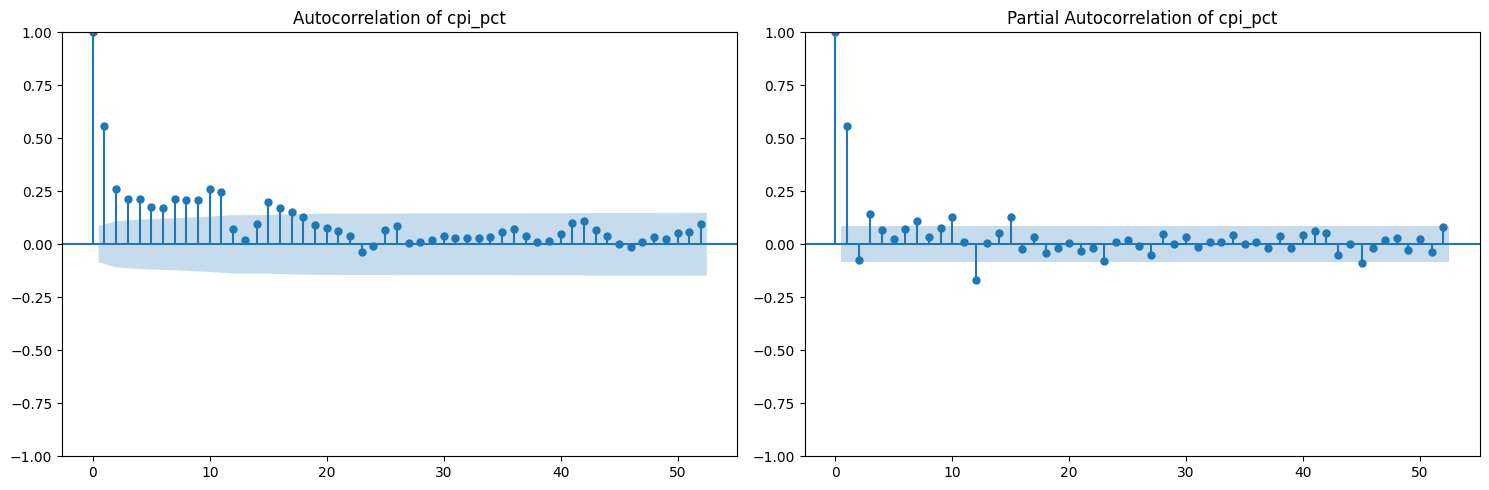

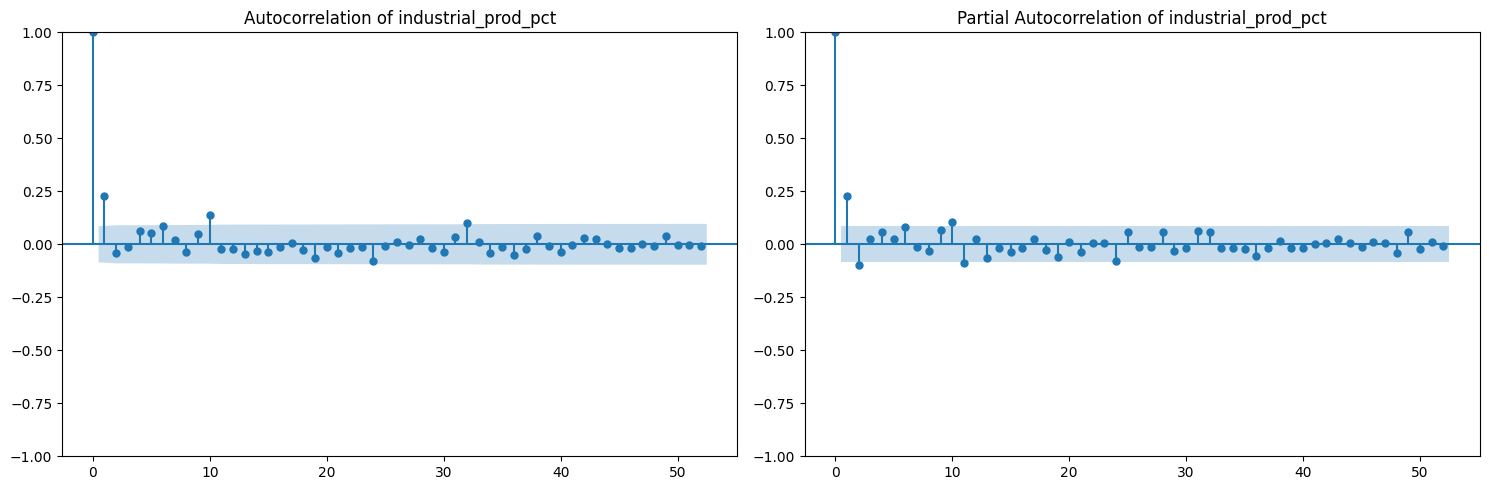

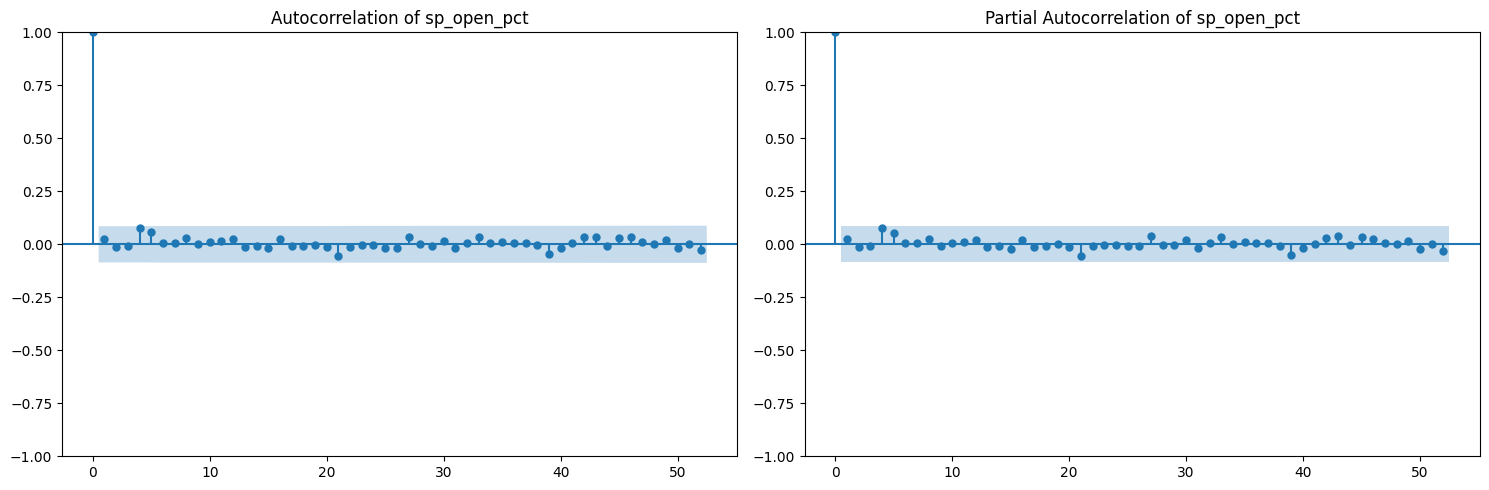

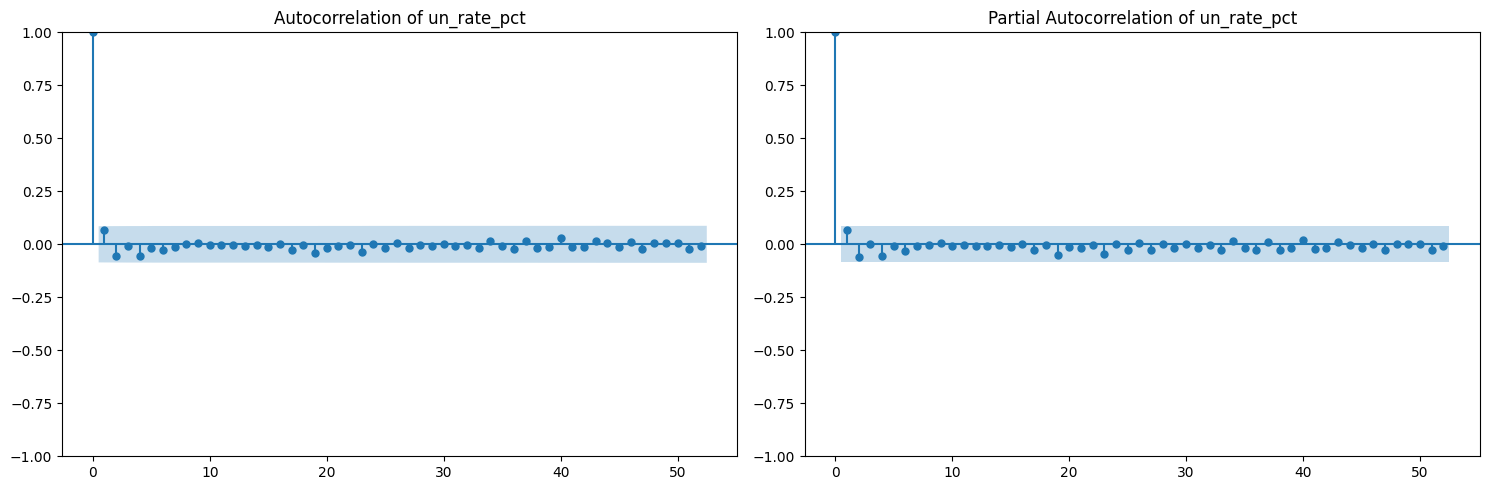

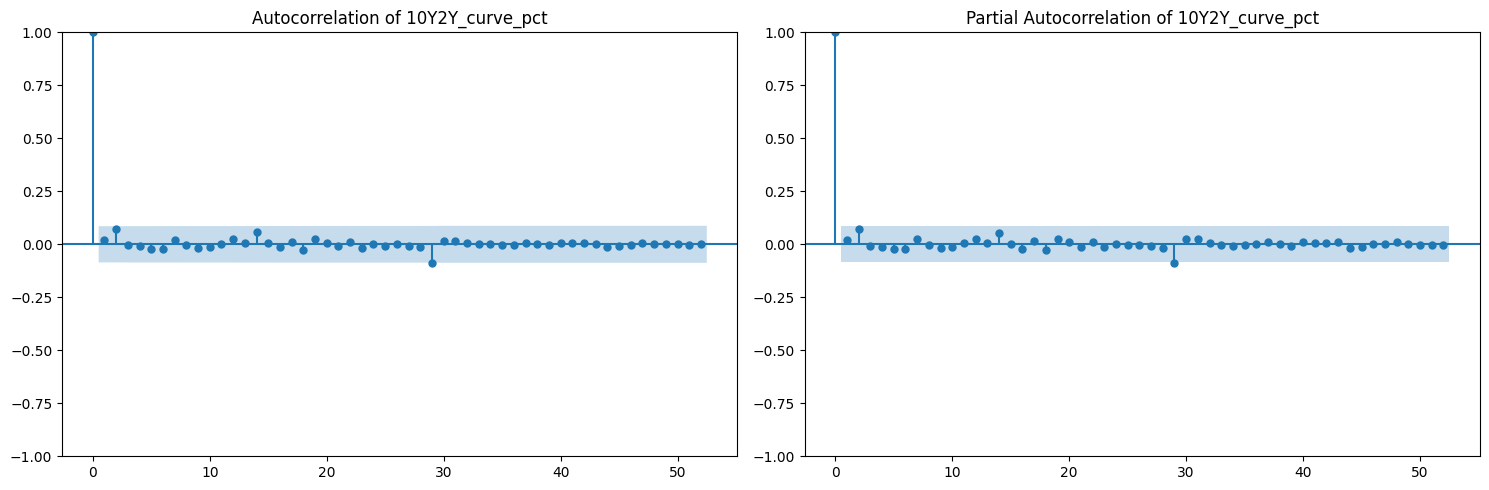

In [94]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

weekly_cols = ['building_permits', 'consumer_debt',
'corporate_profit', 'fed_interest_rate', 'un_rate',
'10Y2Y_curve', 'consumer_confidence_pct', 'cpi_pct', 'industrial_prod_pct', 'sp_open_pct', 'un_rate_pct', '10Y2Y_curve_pct']

monthly_cols = ['building_permits', 'consumer_debt',
'corporate_profit', 'fed_interest_rate', 'un_rate',
'10Y2Y_curve', 'consumer_confidence_pct', 'cpi_pct', 'industrial_prod_pct', 'sp_open_pct', 'un_rate_pct', '10Y2Y_curve_pct']

recession_periods = [
    ('1960-04-01', '1961-02-01'),
    ('1969-12-01', '1970-11-01'),
    ('1973-11-01', '1975-03-01'),
    ('1980-01-01', '1980-07-01'),
    ('1981-07-01', '1982-11-01'),
    ('1990-07-01', '1991-03-01'),
    ('2001-03-01', '2001-11-01'),
    ('2007-12-01', '2009-06-01'),
    ('2020-02-01', '2020-04-01')
]

df_weekly = df_weekly[weekly_cols]
df_monthly = df_monthly[monthly_cols]

# Seasonality analysis functions
def plot_seasonality(df, cols, freq=52):
    for col in cols:
        decomposition = seasonal_decompose(df[col], model='additive', period=freq)
        fig = plt.figure(figsize=(15, 10))
        fig.suptitle('Decomposition of ' + col)

        ax1 = fig.add_subplot(221)
        ax1.plot(decomposition.observed, label='Observed', color='black')
        ax1.set_title('Observed')

        ax2 = fig.add_subplot(222)
        ax2.plot(decomposition.trend, label='Trend', color='black')
        ax2.set_title('Trend')

        ax3 = fig.add_subplot(223)
        ax3.plot(decomposition.seasonal, label='Seasonal', color='black')
        ax3.set_title('Seasonal')

        ax4 = fig.add_subplot(224)
        ax4.plot(decomposition.resid, label='Residual', color='black')
        ax4.set_title('Residual')

        # Shade recession periods
        for start, end in recession_periods:
            ax1.axvspan(start, end, color='gray', alpha=0.3)
            ax2.axvspan(start, end, color='gray', alpha=0.3)
            ax3.axvspan(start, end, color='gray', alpha=0.3)
            ax4.axvspan(start, end, color='gray', alpha=0.3)

        plt.tight_layout()
        plt.show()

# Plot seasonality for weekly and monthly data
plot_seasonality(df_weekly, weekly_cols)
plot_seasonality(df_monthly, monthly_cols)

# Autocorrelation analysis functions
def plot_autocorrelation(df, cols, lags=52):
    for col in cols:
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))

        plot_acf(df[col], lags=lags, ax=ax[0])
        ax[0].set_title('Autocorrelation of ' + col)

        plot_pacf(df[col], lags=lags, ax=ax[1])
        ax[1].set_title('Partial Autocorrelation of ' + col)

        plt.tight_layout()
        plt.show()

# Plot autocorrelation and stationarity for weekly and monthly data
plot_autocorrelation(df_weekly, weekly_cols)
plot_autocorrelation(df_monthly, monthly_cols)
df_weekly = df_weekly[weekly_cols]
df_monthly = df_monthly[monthly_cols]

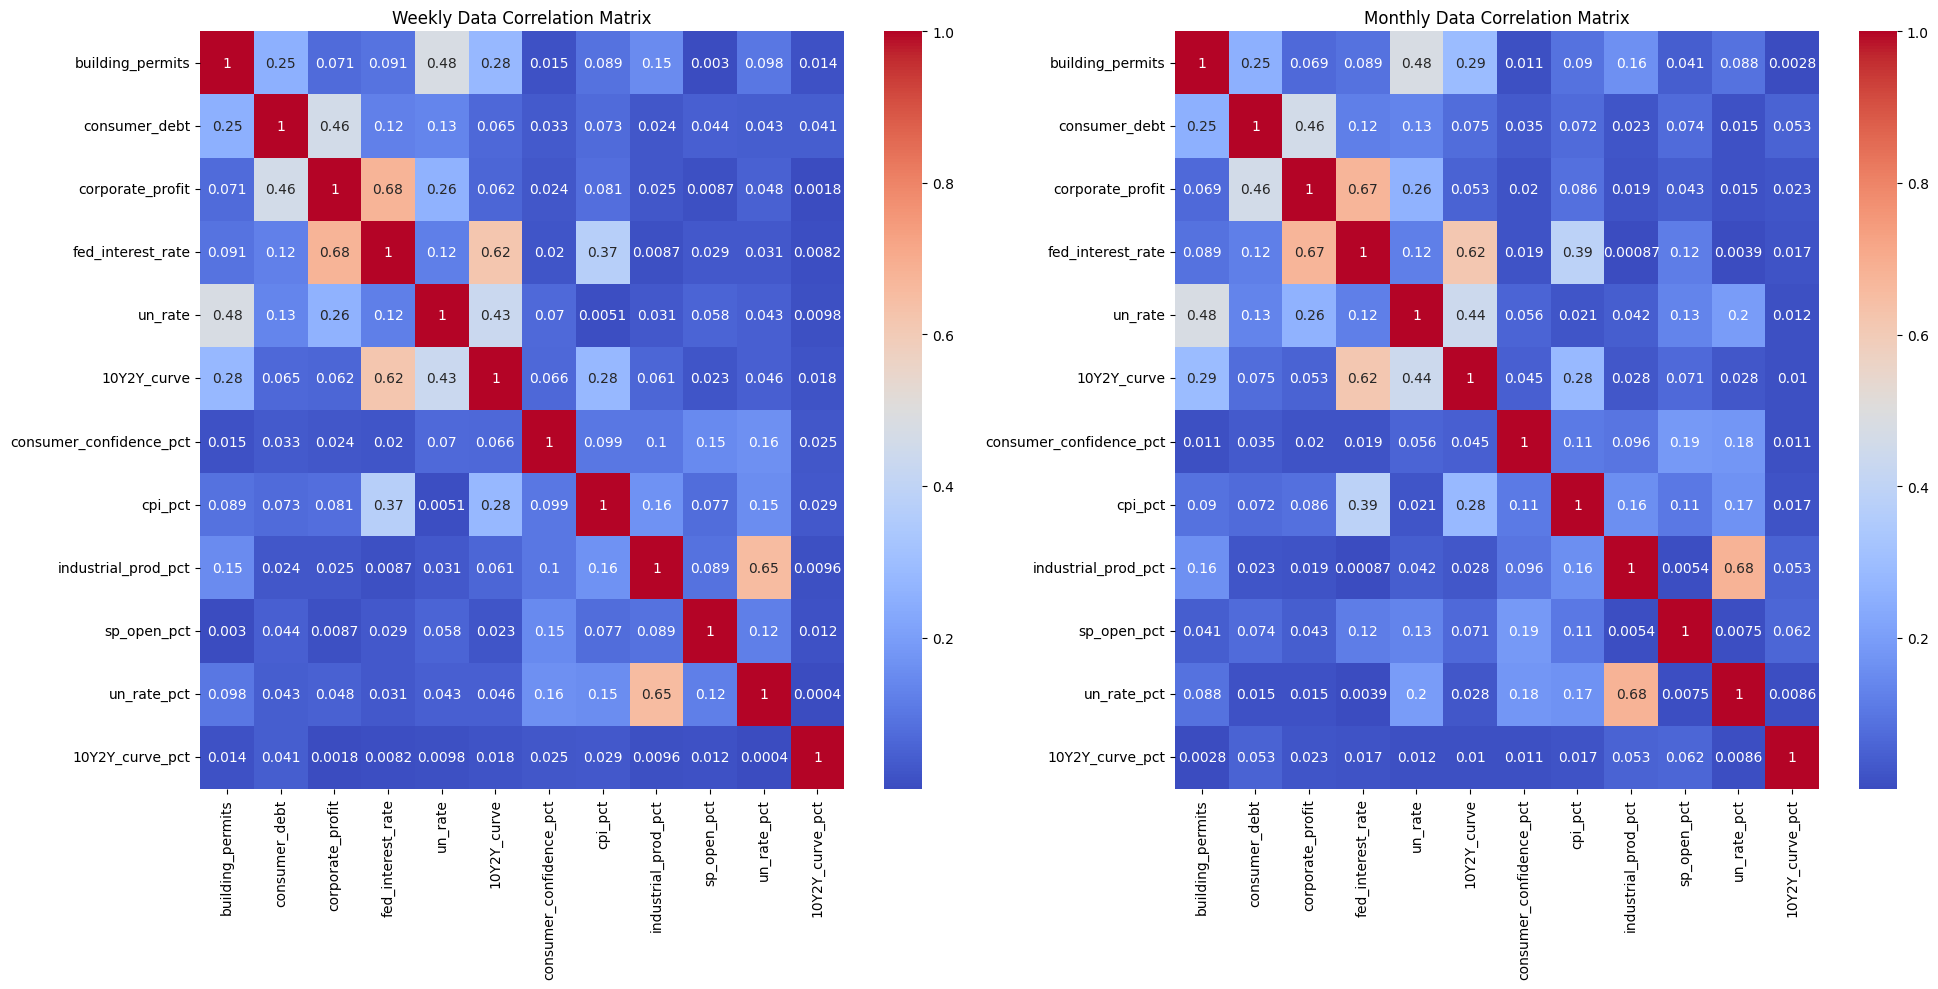

In [96]:
# Get correlation matrix
corr_matrix_weekly = df_weekly.corr().abs()
corr_matrix_monthly = df_monthly.corr().abs()

# Plot correlation matrix
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(corr_matrix_weekly, annot=True, cmap='coolwarm', ax=ax[0])
ax[0].set_title('Weekly Data Correlation Matrix')

sns.heatmap(corr_matrix_monthly, annot=True, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Monthly Data Correlation Matrix')

plt.tight_layout()
plt.show()

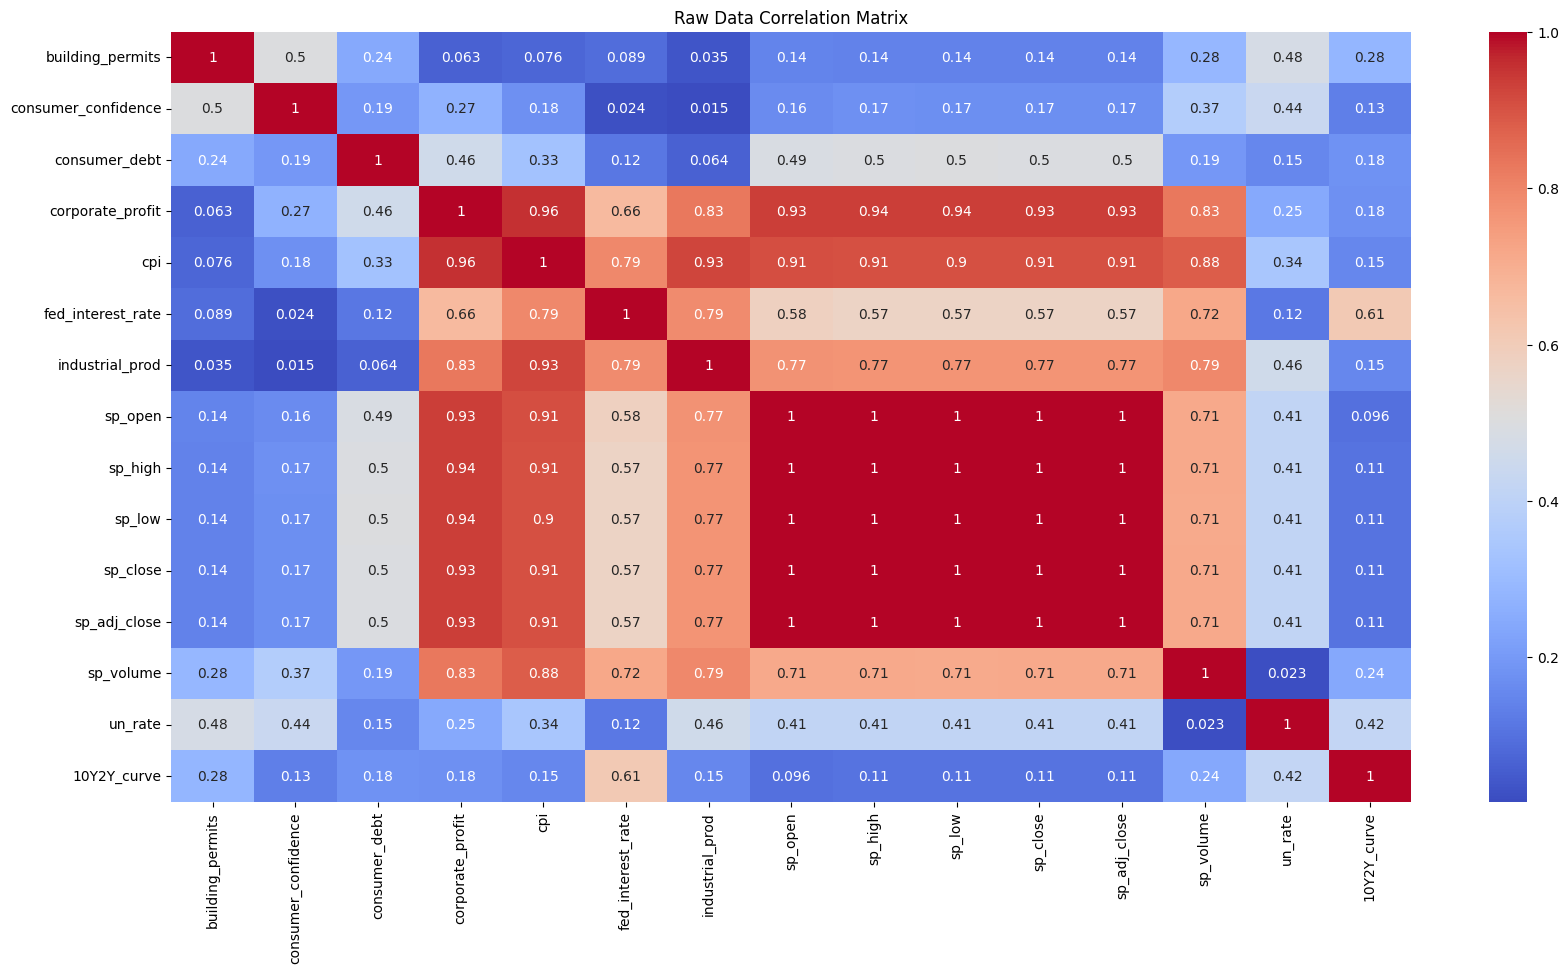

In [97]:
# Correlation matrix for raw data
corr_matrix_raw = df.corr().abs()

# Plot correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix_raw, annot=True, cmap='coolwarm')

plt.title('Raw Data Correlation Matrix')
plt.show()